In [ ]:
 #hypothèses de travail : nous cherchons à créer un modèle de prédiction de RainTomorrow pour toute l'Australie, qui s'adapte à tout changement climatique.
#L'objectif du travail : créer un modèle de prédiction de la pluie du lendemain (oui ou non)


In [ ]:
# I- Préparation des données pour les modélisations et les tests de modèles :


###cellule d'imports (spécifique au code) (tous regroupés ici pour une lecture allégée du code ensuite )
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import model_selection, preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, f_regression, mutual_info_regression, RFE, RFECV
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn import metrics
!pip install statsmodels 
import statsmodels.api 
import statsmodels.api as sm
from scipy.stats import pearsonr
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import chi2_contingency


from sklearn import model_selection, preprocessing

from sklearn.neighbors import KNeighborsClassifier

!pip install imblearn
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler,  ClusterCentroids

from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score


from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


!pip install imblearn
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler,  ClusterCentroids


from sklearn.decomposition import PCA

from sklearn.metrics import mean_absolute_error as mae


#Nous réalisons d'abord les tris des données selon les filtres classiques de façon
#minimale afin d'avoir des premiers résultats et de confirmer l'hypothèse que le tri minimal est suffisant.




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 76.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.7/233.7 KB 40.4 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 KB 28.7 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
#I-1) Suppression des données manquantes et des doublons et tri des variables à plus de 50% de manquantes, 
#constantes ou trop assymétriques :


#Les variables à plus de 50% de manquantes sont à supprimer puisqu'elles 
#amènent soit à supprimer plus de 5° % du jeu de données ce qui est 
#trop ou bien à remplir par de nombreuses données non réélles et donc
#à créer une variable fausse à plus de 50% donc peu explicative. De
#plus ce seuil est courant dans la bibliographie.
#Les variables constantes n'apportent pas d'information et il faut un jeu avec 
#des variables rééllement explicatives, c'est également un tri classique.
#Enfin les variables trop assymériques sont en général enlevées car elles
#perturbent les modèles.
df = pd.read_csv("svgd_données_brutes_projet.zip")
!pip install statsmodels==0.13.2
pd.set_option("display.max_rows", 200)#pour afficher toutes les colonnes (nombreuses au début)
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_colwidth", 200)

##Première visualisation des contenus des variables et des types des variables:
display(df.head())
##conclusion : Nous remarquons des données de différents types et des manquantes à enlever

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64


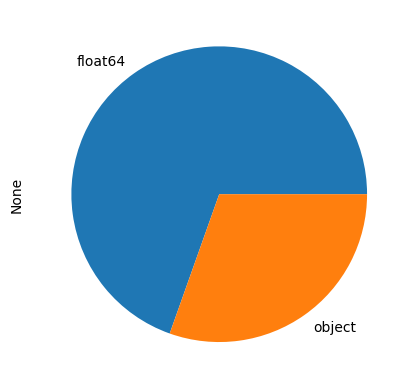

In [ ]:
###Analyse des types des variables :

##pourcentage de valeurs en fonction de chaque type d'objets et de valeurs manquantes
df.dtypes.value_counts().plot.pie();
percent_missing_df = df.isnull().sum() * 100 / len(df)
print(percent_missing_df)
##conclusion : on remarque que nous avons un nombre conséquent de données, et donc de variables, de type
# catégorielles, qui ont un traitement différent et plus long que les variables quantitatives 
#(encodage)

In [ ]:
print(len(df))

145460


In [ ]:
#Elimination des variables qui ont plus de 50% de manquantes :
print((100*df.isna().sum()/df.shape[0]).sort_values(ascending = False))

##Résultats : aucune valeur n'est au-dessus du seuil de rejet, donc aucune suppression sur 
#ce filtre.
#Mais nous remarquons les variables à fort taux de manquantes (supérieur 10%):
#Sunshine Evaporation
#Cloud 3am Cloud9am Pressure9am Pressure3pm

Sunshine         48.009762
Evaporation      43.166506
Cloud3pm         40.807095
Cloud9am         38.421559
Pressure9am      10.356799
Pressure3pm      10.331363
WindDir9am        7.263853
WindGustDir       7.098859
WindGustSpeed     7.055548
Humidity3pm       3.098446
WindDir3pm        2.906641
Temp3pm           2.481094
RainTomorrow      2.245978
Rainfall          2.241853
RainToday         2.241853
WindSpeed3pm      2.105046
Humidity9am       1.824557
Temp9am           1.214767
WindSpeed9am      1.214767
MinTemp           1.020899
MaxTemp           0.866905
Location          0.000000
Date              0.000000
dtype: float64


In [ ]:
#Nettoyage des valeurs manquantes car on ne peut avoir de manquantes pour faire tourner
#la plupart des algorithmes nécessaires pour la suite: 

##Nettoyage des lignes qui ont une valeure manquante dans target : 
df = df.drop(df[df['RainTomorrow'].isna()].index, axis = 0)

##On vérifie la supression des lignes : 3267 lignes supprimées, ce qui est négligeable sur la quantité.
df.info()

##Résultats intermédiaire : le nettoyage des valeurs manquantes sera et un choix sera à faire : 
#conserver des variables à fort taux de manquantes et supprimer des lignes ou conserver ces variables et remplacer les 
#manquantes ou enlever toutes les manquantes directement. 
#Ce choix sera fait en dernier 
#Le meilleur cas sera confirmé par l'évaluation des modèles.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [ ]:
#Repérage et nettoyage des doublons
df = df.drop_duplicates()

##on vérifie les suppressions : 
print(df.info())

#conclusion : il n'y a pas de doublons.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

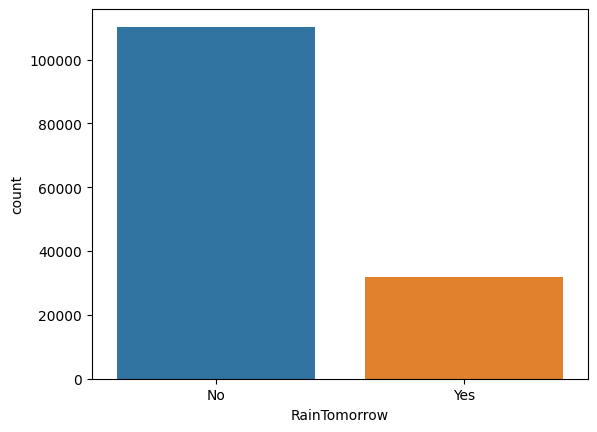

In [ ]:
##Analyse de la répartition des valeurs dans les modalités de target ('RainTomorrow'):
sns.countplot(data = df, x = 'RainTomorrow');

 ##conclusion : environ 20% des valeurs sont dans la catégorie "" Yes" soit "il pleut aujourd'hui".
 #nous testerons l'effet d'un undersampling et comparerons l'évaluation des modèles
 # avec et sans pour décider enfin de la meilleure stratégie.

In [ ]:
###Caractérisation globale de la symétrie des variables quantitatives, de leurs 'outliers'
#et repérage et nettoyage des variables constantes ou à variance très faible 

##Repérer les variances et filtre 1 : variables à trop faibles variances.
print(df.describe())
df.var()

#Résultats :
#-aucune variable n'est à trop faible variance ou constante  donc on n'élimine pas de 
#variable par ces filtresà ce stade.
#-Nous repérons des outliers sur certaines variables, à traiter ensuite si possible.

             MinTemp        MaxTemp       Rainfall   Evaporation  \
count  141556.000000  141871.000000  140787.000000  81350.000000   
mean       12.186400      23.226784       2.349974      5.469824   
std         6.403283       7.117618       8.465173      4.188537   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.800000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  74377.000000  132923.000000  140845.000000  139563.000000   
mean       7.624853      39.984292      14.001988      18.637576   
std        3.781525      13.588801       8.893337       8.803345   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.900000      31.000000       7.0000

MinTemp           41.002029
MaxTemp           50.660488
Rainfall          71.659153
Evaporation       17.543838
Sunshine          14.299931
WindGustSpeed    184.655506
WindSpeed9am      79.091445
WindSpeed3pm      77.498884
Humidity9am      362.951747
Humidity3pm      432.547314
Pressure9am       50.487785
Pressure3pm       49.514820
Cloud9am           8.334859
Cloud3pm           7.401841
Temp9am           42.156950
Temp3pm           48.130209
dtype: float64

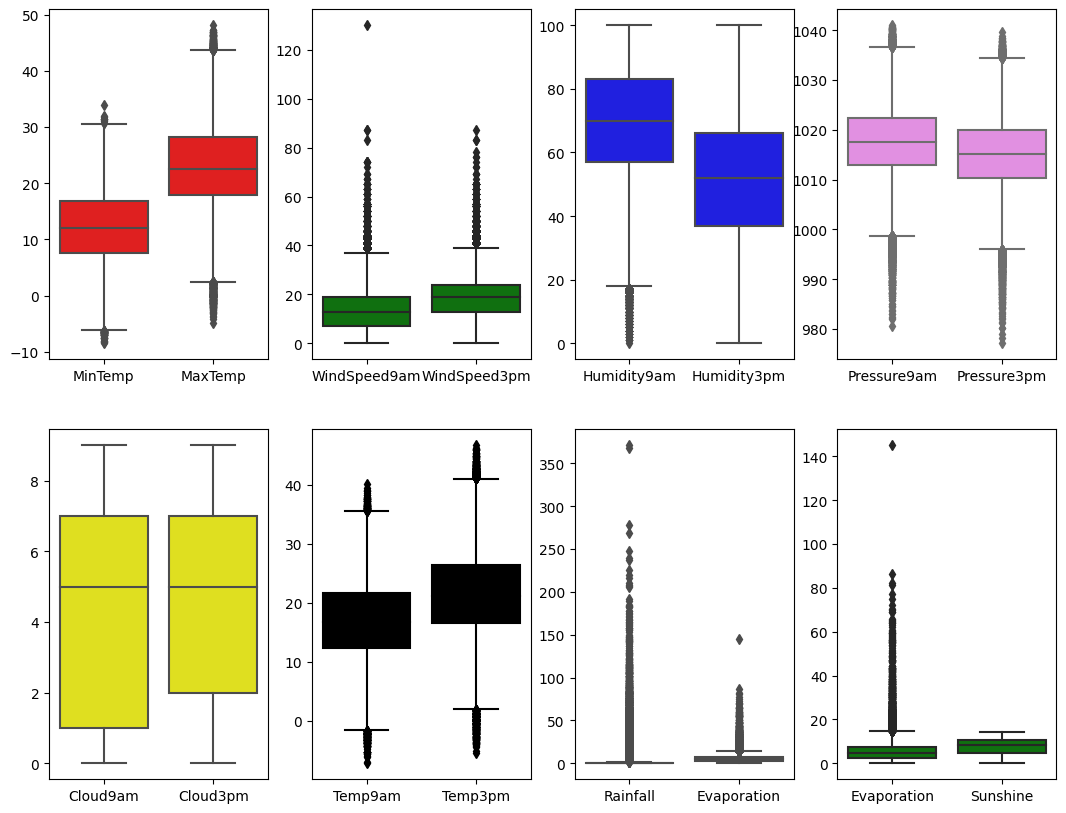

<Figure size 20000x20000 with 0 Axes>

In [ ]:
###Caractérisation globale de la distribution des variables qualitatives

#création de sous dataframes
df_minmaxtemp = df.iloc[:, 2:4]
df_rainfall_evaporation = df.iloc[:, 4:6]
df_evaporation_sunshine = df.iloc[:, 5:7]
df_wind = df.iloc[:, 11:13]
df_humidity = df.iloc[:, 13:15]
df_pressure = df.iloc[:, 15:17]
df_cloud = df.iloc[:, 17:-4]
df_temp = df.iloc[:, 19:-2]

plt.figure(figsize = (13,10))
#Xf, axes = plt.subplots(4, 2)#6 graphiques (pour analyser les 6 catégorielles à part target "RainTomorrow" analysée séparément)
plt.subplot(2, 4, 1);
sns.boxplot(data=df_minmaxtemp, color="red")

plt.subplot(2, 4, 2)
sns.boxplot(data=df_wind, color="green")

plt.subplot(2, 4, 3)
sns.boxplot(data=df_humidity, color="blue")

plt.subplot(2, 4, 4)
sns.boxplot(data=df_pressure,  color="violet")

plt.subplot(2, 4, 5)
sns.boxplot(data=df_cloud,  color="yellow")

plt.subplot(2, 4, 6)
sns.boxplot(data=df_temp,  color="black")

plt.subplot(2, 4, 7)
sns.boxplot(data=df_rainfall_evaporation,  color="red")

plt.subplot(2, 4, 8);
sns.boxplot(data=df_evaporation_sunshine,  color="green");

plt.figure(figsize=(200,200));
plt.tight_layout();
 

<AxesSubplot:xlabel='WindDir9am', ylabel='count'>

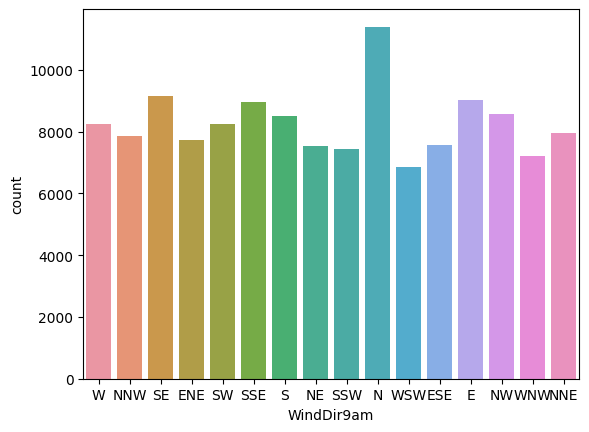

In [ ]:
#Visualisation de la distribution de WindDir9am
sns.countplot(data = df, x = 'WindDir9am')

<AxesSubplot:xlabel='WindDir3pm', ylabel='count'>

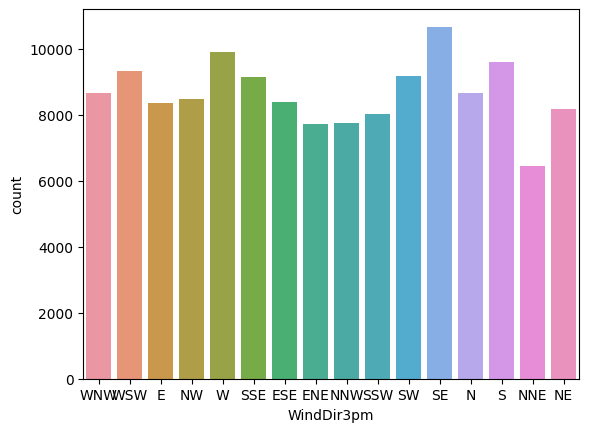

In [ ]:
#Visualisation de la distribution de WindDir3pm
sns.countplot(data = df, x = 'WindDir3pm')

<AxesSubplot:xlabel='Location', ylabel='count'>

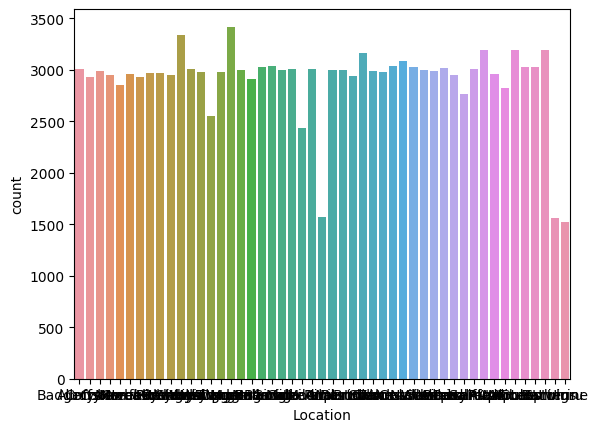

In [ ]:
#Visualisation de la distribution de Location
sns.countplot(data = df, x = 'Location')

In [ ]:
##Conclusion de l'analyse de la distribution des catégorielles

#-Les vitesses des vents ont une distribution équilibrée du nombre de valeurs par modalités

#-Nous remarquons des outliers que nous gèrerons si possible par la suite.

#-Nous remarquons que les variables n'ont pas les mêmes échelles et certaines sont asymétriques, 
#il faudra donc normaliser les données après encodage (numérisation des catégorielles pour
#rentrer dans les algorithmes)

#-Toutes les variables ont suffisamment de données par modalité et un nombre de modalité qui peut être 
#encodé (filtre 3)

#-Nous traitons la date séparément en tant que variable importante (effet saison par hypothèse)
#en encondant jours, mois, année pour voir l'effet des mois car cette variable contient
#3 informations qui sont en fait 3 variables explicatives différentes à cause de leur 
#échelle différente (jour, mois, année).

In [ ]:
#I-2)  Encodage des variables et tri des variables trop peu corréllées à RainTomorrow : 

##Traitement de la variable 'date' :
#Toutes les variables doivent être encodées et comme la pluie est un péhnomène qui semble dépendant des saisons,
# il serait interessant de décomposer Date. Pour cela, nous utilisons la méthode 
#dt.datetime pour extraire année, mois, et jour

df['year'] = pd.to_datetime(df['Date']).dt.year
df['month'] = pd.to_datetime(df['Date']).dt.month
df['day'] = pd.to_datetime(df['Date']).dt.day

#réenregistrement des variables year, month, et day, en tant que int.

df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)
df['day'] = df['day'].astype(int)

#pour vérifier: 
df.head()

#on élimine la colonne Date, désormais inutile et dont l'information a été conservée.
df = df.drop('Date', axis = 1)

In [ ]:
#Analyse des corrélations des catégorielles avec la variable cible pour confirmer les tests de Pearson (vérifié): 

##Year et RainTomorrow
 
result = statsmodels.formula.api.ols('year ~ RainTomorrow', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
print(table)

##conclusion : la p-value (PR(>F)) est inférieure à 5% : 
#donc "year" influe sur "RainTomorrow" les deux sont significativement corrélées.

                    df         sum_sq     mean_sq          F    PR(>F)
RainTomorrow       1.0     133.099568  133.099568  20.612933  0.000006
Residual      142191.0  918140.133292    6.457090        NaN       NaN


In [ ]:
##month et RainTomorrow
 
result = statsmodels.formula.api.ols('month ~ RainTomorrow', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
print(table)

##conclusion : la p-value (PR(>F)) est inférieure à 5% : 
#donc month et RainTomorrow sont significativement corrélées.

                    df        sum_sq    mean_sq         F    PR(>F)
RainTomorrow       1.0  8.966127e+01  89.661269  7.636991  0.005719
Residual      142191.0  1.669378e+06  11.740392       NaN       NaN


In [ ]:
##day et RainTomorrow
 
result = statsmodels.formula.api.ols('day ~ RainTomorrow', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
print(table)

##conclusion : la p-value (PR(>F)) est inférieure à 5%, mais très proche de 5% : 
#donc day et RainTomorrow sont significativement corrélées.

                    df        sum_sq     mean_sq         F    PR(>F)
RainTomorrow       1.0  3.184316e+02  318.431580  4.113797  0.042537
Residual      142191.0  1.100640e+07   77.405756       NaN       NaN


In [ ]:
##MinTemp et RainTomorrow
 
result = statsmodels.formula.api.ols('MinTemp ~ RainTomorrow', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
print(table)

##conclusion : la p-value (PR(>F)) est inférieure à 5% : 
#donc influe fortement sur Rain Tomorrow donc MinTemp et RainTomorrow sont
#significativement corrélées.

                    df        sum_sq       mean_sq            F         PR(>F)
RainTomorrow       1.0  4.089076e+04  40890.758881  1004.355087  1.200136e-219
Residual      141554.0  5.763151e+06     40.713448          NaN            NaN


In [ ]:
##MaxTemp et RainTomorrow :

result = statsmodels.formula.api.ols('MaxTemp ~ RainTomorrow', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
print(table)

##conclusion : la p-value (PR(>F)) est inférieure à 5% : 
#donc MaxTemp et RainTomorrow sont significativement corrélées.

                    df        sum_sq        mean_sq            F  PR(>F)
RainTomorrow       1.0  1.822410e+05  182240.995715  3690.861736     0.0
Residual      141869.0  7.004962e+06      49.376273          NaN     NaN


In [ ]:
##Sunshine et RainTomorrow

result = statsmodels.formula.api.ols('Sunshine ~ RainTomorrow', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
print(table)

##Conclusion : la p-value (PR(>F)) est inférieure à 5% : donc Sunshine et RainTomorrow sont
#significativement corrélées.

                   df         sum_sq        mean_sq             F  PR(>F)
RainTomorrow      1.0  216109.095607  216109.095607  18966.163357     0.0
Residual      74375.0  847462.593413      11.394455           NaN     NaN


In [ ]:
##Rainfall et RainTomorrow :

result = statsmodels.formula.api.ols('Rainfall ~ RainTomorrow', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
print(table)

##Conclusion : la p-value (PR(>F)) est inférieure à 5% donc 
#Rainfall et RainTomorrow sont significativement corrélées.

                    df        sum_sq        mean_sq            F  PR(>F)
RainTomorrow       1.0  5.764246e+05  576424.599798  8531.370312     0.0
Residual      140785.0  9.512181e+06      67.565301          NaN     NaN


In [ ]:
##Evaporation et RainTomorrow :

result = statsmodels.formula.api.ols('Evaporation ~ RainTomorrow', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
print(table)

##Conclusion : la p-value (PR(>F)) est inférieure à 5% donc 
#Evaporation et RainTomorrow sont significativement corrélées.

                   df        sum_sq       mean_sq            F         PR(>F)
RainTomorrow      1.0  2.030702e+04  20307.024407  1174.195017  1.656742e-255
Residual      81348.0  1.406867e+06     17.294422          NaN            NaN


In [ ]:
##WindGustDir et RainTomorrow :

table = pd.crosstab(df['WindGustDir'],df['RainTomorrow'])

from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(table) 
print("c = {}, p = {}, dof = {}".format(c, p, dof, 2))

##Conclusion : la p-value (PR(>F)) est inférieure à 5% donc 
#WindGustDir et RainTomorrow sont significativement dépendantes.



c = 1519.9012419828084, p = 0.0, dof = 15


In [ ]:
#rappel de la définition du V de cramer
#Le V de Cramer est la racine carrée du χ² divisé par le χ² max. 
# Plus V est proche de zéro, plus il y a indépendance entre les deux variables étudiées.
#  Il vaut 1 en cas de complète dépendance puisque le χ² est alors égal au χ² max 
# (dans un tableau 2 × 2, il prend une valeur comprise entre -1 et 1).

In [ ]:
#ajout du test de cramer pour confirmer l'analyse :
table = pd.crosstab(df['WindGustDir'],df['RainTomorrow'])

def V_Cramer(table, N):
    stat_chi2 = chi2_contingency(table)[0]
    k = table.shape[0]
    r = table.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

#Appliquer V_cramer à table avec le nombre d'observations égale à df.shape[0].
V_Cramer(table, df.shape[0])

##Conclusion : le V de cramer est très faible : Donc très faible corrélation entre les deux variables
#Conclusion des 2 tests (Chi2 et Cramer) : 
#WindGustDir et RainTomorrow sont corréllées mais très peu corrélées selon ces 2 tests.

0.10287655285982306

In [ ]:
##WindGustSpeed et RainTomorrow :

result = statsmodels.formula.api.ols('WindGustSpeed ~ RainTomorrow', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
print(table)

##Conclusion : la p-value est inférieure à 5% donc 
#WindGustSpeed a un effet statistique significatif sur RainTomorrow.

                    df        sum_sq       mean_sq            F  PR(>F)
RainTomorrow       1.0  1.344086e+06  1.344086e+06  7700.511544     0.0
Residual      132921.0  2.320069e+07  1.745450e+02          NaN     NaN


In [ ]:
##WindDir9am et RainTomorrow :

table = pd.crosstab(df['WindDir9am'],df['RainTomorrow'])
print(table)
c, p, dof, expected = chi2_contingency(table)
print(c, p, dof)

##Conclusion : la p-value est inférieure à 5% donc 
#WindDir9am et RainTomorrow sont significativement dépendantes selon ce test.

#ajout du test de cramer pour confirmer nos conclusions et préciser la l'importance de la corrélation :

def V_Cramer(table, N):
    stat_chi2 = chi2_contingency(table)[0]
    k = table.shape[0]
    r = table.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))
V_Cramer(table, df.shape[0])

#le V de cramer est faible (0.12) : donc WindDir9am et RainTomorrow sont très faiblement corréll
#selon ce deuxième test

RainTomorrow    No   Yes
WindDir9am              
E             7709  1315
ENE           6370  1365
ESE           6440  1118
N             7883  3510
NE            5959  1568
NNE           5811  2137
NNW           5410  2430
NW            6163  2389
S             6812  1681
SE            7671  1491
SSE           7365  1601
SSW           5803  1645
SW            6328  1909
W             6103  2157
WNW           5246  1948
WSW           5151  1692
2214.8468820751004 0.0 15


0.12438231477050579

In [ ]:
##WindDir3pm et RainTomorrow :

table = pd.crosstab(df['WindDir3pm'],df['RainTomorrow'])
c, p, dof, expected = chi2_contingency(table) 

##Conclusion du test chi2 : p-value < 5% donc WindDir3pm et RainTomorrow sont significativement 
#corrélées

#ajout du test de cramer pour préciser la hauteur de la corrélation:
def V_Cramer(table, N):
    stat_chi2 = chi2_contingency(table)[0]
    k = table.shape[0]
    r = table.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))
V_Cramer(table, df.shape[0])

#le v de cramer est très faible : les variables sont faiblement corréllées.

0.09436805285848933

In [ ]:
##WindSpeed9am et RainTomorrow

result = statsmodels.formula.api.ols('WindSpeed9am ~ RainTomorrow', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
print(table)

##conclusion : la p-value (PR(>F)) est inférieure à 5% 
#donc WindSpeed9am et RainTomorrow sont significativement corrélées.

                    df        sum_sq       mean_sq            F         PR(>F)
RainTomorrow       1.0  9.223581e+04  92235.812691  1175.920404  1.203343e-256
Residual      140843.0  1.104732e+07     78.437122          NaN            NaN


In [ ]:
##WindSpeed3pm et RainTomorrow

result = statsmodels.formula.api.ols('WindSpeed3pm ~ RainTomorrow', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
print(table)

## Conclusion : la p-value (PR(>F)) est inférieure à 5% 
#donc WindSpeed3pm et RainTomorrow sont significativement corrélées.

                    df        sum_sq       mean_sq            F         PR(>F)
RainTomorrow       1.0  8.341108e+04  83411.084622  1084.644514  5.868664e-237
Residual      139561.0  1.073249e+07     76.901772          NaN            NaN


In [ ]:
#etude de Humidity9am et RainTomorrow

result = statsmodels.formula.api.ols('Humidity9am ~ RainTomorrow', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
print(table)

#conlusion : la p-value (PR(>F)) est inférieure à 5% : "Humidity9am" corrélé avec RainTomorrow 

                    df        sum_sq       mean_sq            F  PR(>F)
RainTomorrow       1.0  3.370408e+06  3.370408e+06  9943.628385     0.0
Residual      140417.0  4.759455e+07  3.389515e+02          NaN     NaN


In [ ]:
##Humidity3pm et RainTomorrow
result = statsmodels.formula.api.ols('Humidity3pm ~ RainTomorrow', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
print(table)

#conlusion : la p-value (PR(>F)) est inférieure à 5% : "Humidity3pm" corrélé avec Rain Tomorrow 

                    df        sum_sq       mean_sq             F  PR(>F)
RainTomorrow       1.0  1.193225e+07  1.193225e+07  34441.750072     0.0
Residual      138581.0  4.801102e+07  3.464473e+02           NaN     NaN


In [ ]:
##Pressure9am et RainTomorrow

result = statsmodels.formula.api.ols('Pressure9am ~ RainTomorrow', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
print(table)

##conlusion : Pressure9am et RainTomorrow sont significativement corrélées

                    df        sum_sq        mean_sq            F  PR(>F)
RainTomorrow       1.0  3.928073e+05  392807.252403  8282.947082     0.0
Residual      128177.0  6.078616e+06      47.423610          NaN     NaN


In [ ]:
##Pressure3am et RainTomorrow'

result = statsmodels.formula.api.ols('Pressure3pm ~ RainTomorrow', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
print(table)

##conlusion : Pressure3am et RainTomorrow sont significativement corrélées

                    df        sum_sq        mean_sq            F  PR(>F)
RainTomorrow       1.0  3.243374e+05  324337.425885  6902.930246     0.0
Residual      128210.0  6.024007e+06      46.985471          NaN     NaN


In [ ]:
#Cloud9am et RainTomorrow

result = statsmodels.formula.api.ols('Cloud9am ~ RainTomorrow', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
print(table)

##conlusion : Cloud9am et RainTomorrow sont significativement corrélées

                   df         sum_sq       mean_sq         F  PR(>F)
RainTomorrow      1.0   74331.325275  74331.325275  9916.961     0.0
Residual      88534.0  663595.384933      7.495373       NaN     NaN


In [ ]:
##Cloud3pm et RainTomorrow

result = statsmodels.formula.api.ols('Cloud3pm ~ RainTomorrow', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
print(table)

##conlusion : Cloud3pm et RainTomorrow sont significativement corrélées

                   df         sum_sq       mean_sq             F  PR(>F)
RainTomorrow      1.0   91852.534384  91852.534384  14527.785412     0.0
Residual      85097.0  538029.362137      6.322542           NaN     NaN


In [ ]:
##Temp9am et RainTomorrow

result = statsmodels.formula.api.ols('Temp9am ~ RainTomorrow', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
print(table)

##conlusion : Temp9am et RainTomorrow sont significativement corrélées

                    df        sum_sq      mean_sq          F        PR(>F)
RainTomorrow       1.0  3.931248e+03  3931.248309  93.313604  4.533895e-22
Residual      141287.0  5.952340e+06    42.129423        NaN           NaN


In [ ]:
##Temp3pm et RainTomorrow

result = statsmodels.formula.api.ols('Temp3pm ~ RainTomorrow', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
print(table)

##conlusion : Temp3pm et RainTomorrow sont significativement corrélées

                    df        sum_sq        mean_sq            F  PR(>F)
RainTomorrow       1.0  2.485450e+05  248544.958193  5362.533296     0.0
Residual      139465.0  6.463983e+06      46.348422          NaN     NaN


In [ ]:
##RainToday et RainTomorrow

table = pd.crosstab(df['RainToday'],df['RainTomorrow'])
print(table)
c, p, dof, expected = chi2_contingency(table) 
print(c, p, dof)

#p_value < 5 % donc les deux variables sont significativement corrélées selon ce test

#ajout du test de cramer pour confirmer

def V_Cramer(table, N):
    stat_chi2 = chi2_contingency(table)[0]
    k = table.shape[0]
    r = table.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

#Appliquer V_cramer à table avec le nombre d'observations égale à df.shape[0].
V_Cramer(table, df.shape[0])

#Conclusion intermédiaire: #V_cramer = 0.31, donc RainToday et RainTomorrow sont faiblement corrélées selon ce test.


RainTomorrow     No    Yes
RainToday                 
No            92728  16604
Yes           16858  14597
13799.479649324368 0.0 1


0.3115143355299644

In [ ]:
##Location et RainTomorrow

table = pd.crosstab(df['Location'],df['RainTomorrow'])
print(table)
c, p, dof, expected = chi2_contingency(table) 
print(c, p, dof)

#ajout du test de cramer pour confirmer

def V_Cramer(table, N):
    stat_chi2 = chi2_contingency(table)[0]
    k = table.shape[0]
    r = table.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

#Appliquer V_cramer à table avec le nombre d'observations égale à df.shape[0].
V_Cramer(table, df.shape[0])

##V_cramer = 0.15, 
#Conclusion intermédiaire: Location et RainTomorrow sont faiblement corrélées selon ce test


RainTomorrow        No   Yes
Location                    
Adelaide          2402   688
Albany            2114   902
Albury            2393   618
AliceSprings      2787   244
BadgerysCreek     2345   583
Ballarat          2247   781
Bendigo           2472   562
Brisbane          2452   709
Cairns            2038   950
Canberra          2789   629
Cobar             2602   386
CoffsHarbour      2084   869
Dartmoor          2021   922
Darwin            2340   852
GoldCoast         2205   775
Hobart            2427   761
Katherine         1294   265
Launceston        2329   699
Melbourne         1799   636
MelbourneAirport  2356   653
Mildura           2680   327
Moree             2460   394
MountGambier      2110   920
MountGinini       2088   819
Newcastle         2224   731
Nhil              1327   242
NorahHead         2121   808
NorfolkIsland     2045   919
Nuriootpa         2410   592
PearceRAAF        2257   505
Penrith           2369   595
Perth             2548   645
PerthAirport  

0.15681845999773006

In [ ]:
#Encodage des données catégorielles pour finir le tri 
#des variables par rapport à leur corrélation à RainTomorrow: 

#En effet le test de Pearson demande un encodage, de même que les algoritmhes de ML:
#Deux méthodes principales existent à ce stade : séparer les variables en autant de modalités qu'elles contiennent et encoder en 0 ou 1
#ou encoder chaque classe par un numéro. Or le découpage en plusieurs variables nous donne un nombre de variables proche 
#de 70 soit beaucoup plus que précédemment et seulement si l'on supprime location (sinon c'est beaucoup plus), de plus
#et la piste nous a mené à des conclusions similaires sur les suppressions de variables, donc
#cette méthode ne présente pas plus d'intérêt que la méthode par encodage direct des modalités.
#Nous choisissons donc la deuxième option, la plus simple en terme de code
# et avec le moins grand nombre de variables pour un tri similaire au final.

##Renommer pour lisibilité les booléénnes : 
df['RainToday_encode'] = df['RainToday']
df['RainTomorrow_encode'] = df['RainTomorrow']
df = df.drop(labels = ['RainTomorrow', 'RainToday'], axis = 1)

#import: 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

#encodage : 
for var in df.select_dtypes(include='object').columns:
    df[var] = le.fit_transform(df[var])

#vérifier si toutes les colonnes sont bien numérisées :
print(df.head())

   Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0         2     13.4     22.9       0.6          NaN       NaN           13   
1         2      7.4     25.1       0.0          NaN       NaN           14   
2         2     12.9     25.7       0.0          NaN       NaN           15   
3         2      9.2     28.0       0.0          NaN       NaN            4   
4         2     17.5     32.3       1.0          NaN       NaN           13   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           44.0          13          14          20.0          24.0   
1           44.0           6          15           4.0          22.0   
2           46.0          13          15          19.0          26.0   
3           24.0           9           0          11.0           9.0   
4           41.0           1           7           7.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         71.0 

<AxesSubplot:xlabel='RainTomorrow_encode', ylabel='count'>

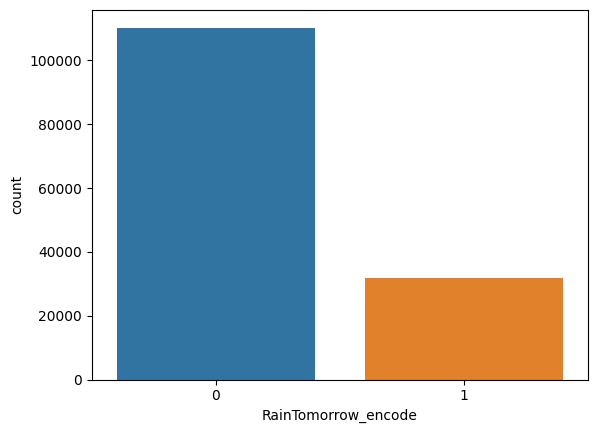

In [ ]:
#vérifier l'encodage
sns.countplot(data = df, x = 'RainTomorrow_encode')

In [ ]:
#Les filtres par la p-value de pearson ainsi que par le pourcentage de corrélation sont 
#faits à ce stade soit avant toute normalisation, car cette normalisation dilue les corrélations et n'apporte de toute façon pas 
#d'amélioration aux performances (nous le verrons plus loin).

#Filtre des variables non significativement corrélées (p-value pearson)  >5%.
#Calcul de la p-value de Pearson pour étudier
# la significativité de la relation de chacune des explicatives 
#à la variable cible au seuil de rejet de 5% avec hypothèse de test 
#H0 : "les variables sont significativement corréllées":
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues
p_values_df = calculate_pvalues(df)
p_values_df['RainTomorrow_encode'].sort_values(ascending=False)

#Résultats : les variables "day", "month", "Location' et  "year" ne sont par significativement corréllées à
#RainTomorrow (variable cible) donc elles sont supprimées.

day                    0.7464
month                  0.7109
Location               0.1987
year                   0.1311
Temp9am                0.0053
Humidity3pm               0.0
RainToday_encode          0.0
Temp3pm                   0.0
Cloud3pm                  0.0
Cloud9am                  0.0
Pressure3pm               0.0
Pressure9am               0.0
Humidity9am               0.0
MinTemp                   0.0
WindSpeed3pm              0.0
WindSpeed9am              0.0
WindDir3pm                0.0
WindDir9am                0.0
WindGustSpeed             0.0
WindGustDir               0.0
Sunshine                  0.0
Evaporation               0.0
Rainfall                  0.0
MaxTemp                   0.0
RainTomorrow_encode       0.0
Name: RainTomorrow_encode, dtype: object

In [ ]:
#suppression des variables non significativement corrélées à RainTomorrow d'après la p-value de Pearson :
df = df.drop(['day','month','Location', 'year'], axis = 1)


RainTomorrow_encode    100.000000
Sunshine                45.076806
Humidity3pm             44.616038
Cloud3pm                38.187041
Cloud9am                31.737983
RainToday_encode        30.965171
Humidity9am             25.716116
Pressure9am             24.637115
Rainfall                23.903180
WindGustSpeed           23.400973
Pressure3pm             22.603115
Temp3pm                 19.242409
MaxTemp                 15.923666
Evaporation             11.928470
WindSpeed9am             9.099465
WindSpeed3pm             8.781740
MinTemp                  8.393581
WindGustDir              5.448788
WindDir3pm               3.443519
Temp9am                  2.569082
WindDir9am               1.843647
Name: RainTomorrow_encode, dtype: float64


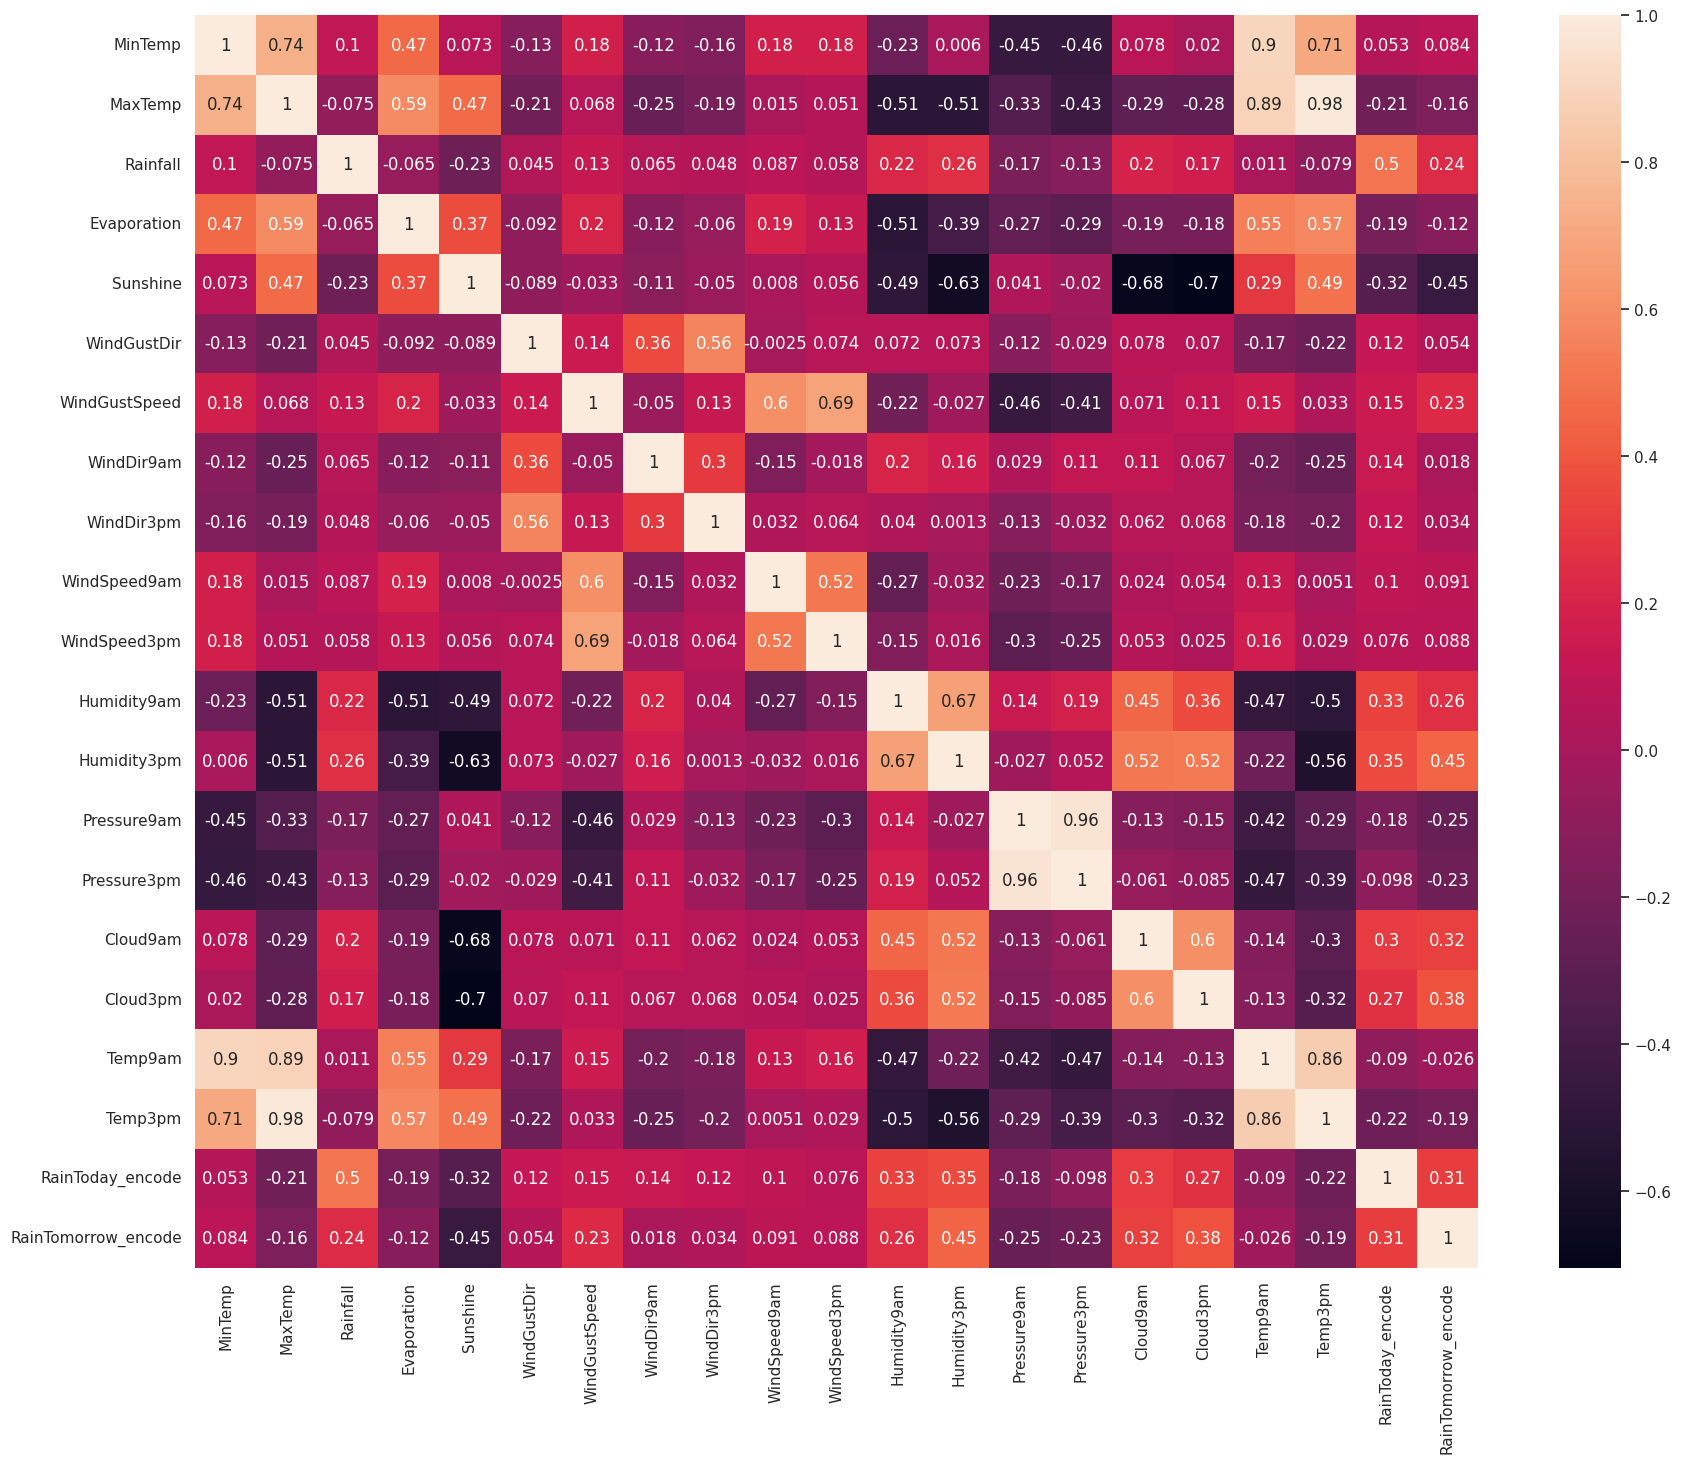

In [ ]:
#Tri des variables corrélées à moins de 5% à la cible selon le test de Pearson : 

#Toutes les variables sont encodées donc nous pouvons analyser les corrélations de toutes les variables pour confirmer
#les tests précédents et pour conclure ensuite sur le choix des variables conservées.

#matrice de corrélation en "heatmap" :
Var_Corr = df.corr()
sns.set(rc={'figure.figsize':(20.7,16.27)})
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

#Affichage en valeur absolue pour filtrer les variables < 5% par ordre d'importance de
#corrélation (positive ou négative) à la variable cible.
print(100*abs(Var_Corr['RainTomorrow_encode']).sort_values(ascending = False))

In [ ]:
l =100*abs(Var_Corr['RainTomorrow_encode']).sort_values(ascending = False)
l.index[1]

'Sunshine'

In [ ]:
##Suppression des variables explicatives corréllées à moins de 5% à la cible selon le test de Pearson qui sont 'WindDir3pm','Temp9am','WindDir9am' : 
df = df.drop(['WindDir3pm','Temp9am','WindDir9am'], axis = 1)

#Hypothèse à ce stade le tri a été fait suffisamment pour avoir des performances suffisantes :
# le nombre de variabeles n'est pazs trop élevé et elles sont toutes significativement corréllées 
#à plus de 5%.


In [ ]:
#vérification de l'état correct des données du dataframe  : c'est bon, 18 variables.
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday_encode,RainTomorrow_encode
0,13.4,22.9,0.6,NaN,NaN,13,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,21.8,0,0
1,7.4,25.1,0.0,NaN,NaN,14,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,24.3,0,0
2,12.9,25.7,0.0,NaN,NaN,15,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,23.2,0,0
3,9.2,28.0,0.0,NaN,NaN,4,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,26.5,0,0
4,17.5,32.3,1.0,NaN,NaN,13,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,29.7,0,0


In [ ]:
#Bilan I-2 et choix pour la suite : 
#à ce stade, le jeu de données est prêt pour modélisation  sauf à cause des manquantes : 
#il n' y a pas de choix évident, voir le tableau et les choix suivants: 
print((100*df.isna().sum()/df.shape[0]).sort_values(ascending = False))

#1/soit nous supprimons toutes les lignes contenant au moins une valeur manquante dans une colonne (scénario "bourrin")

#2/soit nous remplaçons les valeurs manquantes par imputation statistique (moyenne) (scénario subtil2)

#Ne sachant pas quel scénario est le meilleur, nous testons en premier le scénario df_bourrin
#en posant l'hyposthèse que ce jeu de données est suffisant pour avoir une performance satisfaisante de prédiction,
#et ensuite nous comparerons les résultats finaux avec l'autre dataset pour vérifier 
#le choix de dataset de variables explicatives.

Sunshine               47.692924
Evaporation            42.789026
Cloud3pm               40.152469
Cloud9am               37.735332
Pressure9am             9.855619
Pressure3pm             9.832411
WindGustSpeed           6.519308
Humidity3pm             2.538803
Temp3pm                 1.917113
WindSpeed3pm            1.849599
Humidity9am             1.247600
Rainfall                0.988797
WindSpeed9am            0.948007
MinTemp                 0.447983
MaxTemp                 0.226453
WindGustDir             0.000000
RainToday_encode        0.000000
RainTomorrow_encode     0.000000
dtype: float64


In [ ]:
###II- Test des modèles de prédiction de Raintomorrow  sur le jeu de données traité
#par dropna:

##Création du jeu de données: 
#on supprime toutes les lignes ou il y a une manquante :
df_bourrin = df.dropna()
df_bourrin.shape

##Evaluation de la perte : perte de 58 090/142 193 = 60% des données à 1% près.

(58090, 18)

In [ ]:
##verification : il n'y a plus de manquantes.
df_bourrin.isna().sum()

MinTemp                0
MaxTemp                0
Rainfall               0
Evaporation            0
Sunshine               0
WindGustDir            0
WindGustSpeed          0
WindSpeed9am           0
WindSpeed3pm           0
Humidity9am            0
Humidity3pm            0
Pressure9am            0
Pressure3pm            0
Cloud9am               0
Cloud3pm               0
Temp3pm                0
RainToday_encode       0
RainTomorrow_encode    0
dtype: int64

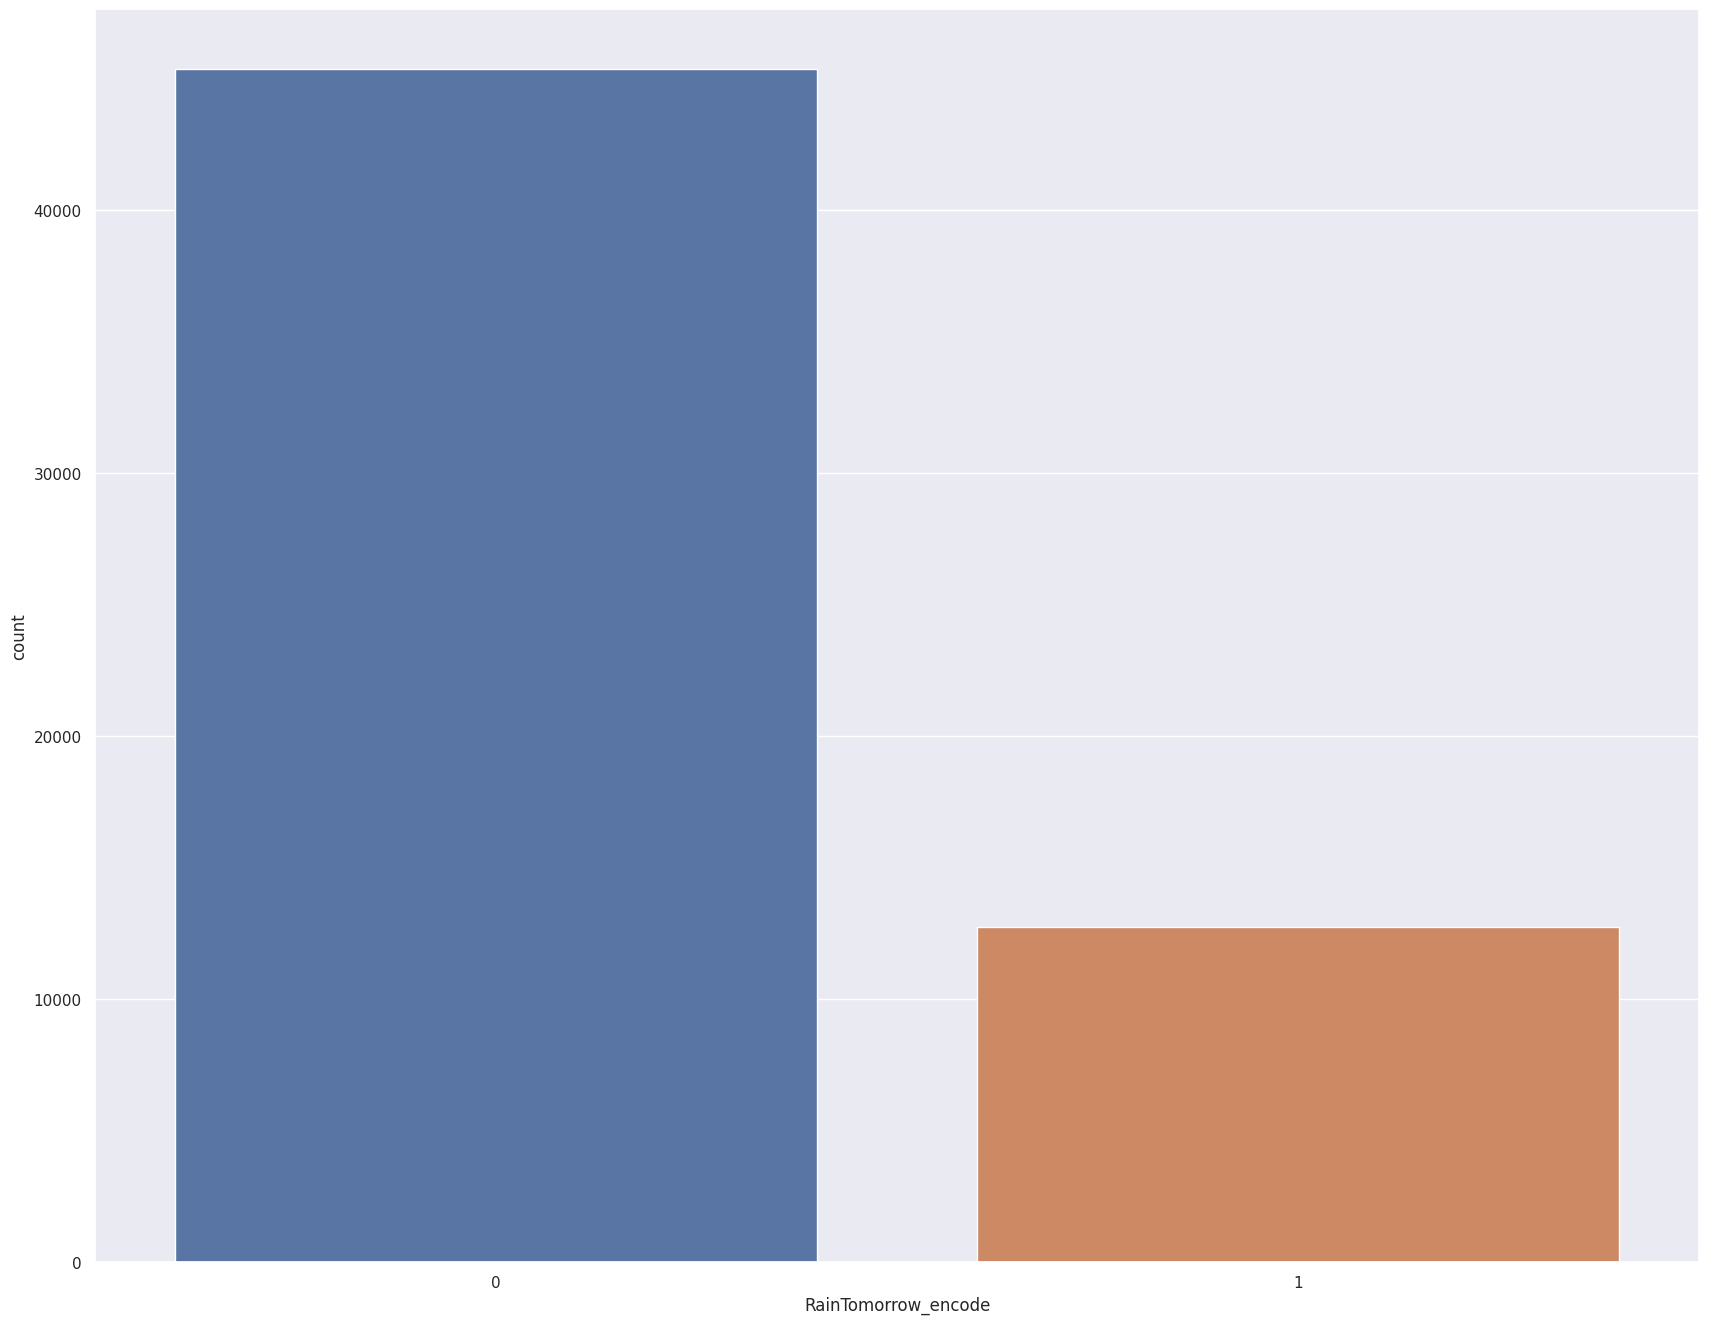

In [ ]:
#vérification de la répartition des valeurs dans les 2 modalités de la variable cible , 
#via un count plot.
#Analyse : la répartition est toujours déséquilibrée.
sns.countplot(data = df_bourrin, x = 'RainTomorrow_encode');

In [ ]:
df_bourrin.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday_encode,RainTomorrow_encode
6049,17.9,35.2,0.0,12.0,12.3,11,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,33.4,0,0
6050,18.4,28.9,0.0,14.8,13.0,8,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,27.0,0,0
6052,19.4,37.6,0.0,10.8,10.6,5,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,34.9,0,0
6053,21.9,38.4,0.0,11.4,12.2,14,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,35.6,0,0
6054,24.2,41.0,0.0,11.2,8.4,14,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,37.6,0,0


In [ ]:
##Découpage des données en jeu d'entrainement et jeu test pour
#permettre d'évaluer la performance globale des modèles sur un jeu nouveau,
#à hauteur de 20 % des données en test, avec en paramètre randomstate=42 rempli pour la reproductibilité 
#des résultats :
#(méthode courante d'évaluation):
y = df_bourrin['RainTomorrow_encode']
x = df_bourrin.drop('RainTomorrow_encode', axis = 1)
print(x)

        MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
6049       17.9     35.2       0.0         12.0      12.3           11   
6050       18.4     28.9       0.0         14.8      13.0            8   
6052       19.4     37.6       0.0         10.8      10.6            5   
6053       21.9     38.4       0.0         11.4      12.2           14   
6054       24.2     41.0       0.0         11.2       8.4           14   
...         ...      ...       ...          ...       ...          ...   
142298     19.3     33.4       0.0          6.0      11.0            1   
142299     21.2     32.6       0.0          7.6       8.6            0   
142300     20.7     32.8       0.0          5.6      11.0            0   
142301     19.5     31.8       0.0          6.2      10.6            2   
142302     20.2     31.7       0.0          5.6      10.7            1   

        WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
6049             48.0           

In [ ]:
#reformatage des dimensions de y pour permettre de rentrer les données dans traintestsplit :
y = np.array(y)
y.reshape(-1, 1)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
y = y.astype(float)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
#vérifions la séparation : la séparation a été correctement effectuée (20%).
x_train.shape

(46472, 17)

In [ ]:
#vérifions si y_test contient bien les deux valeurs de RainTomorrow_encodeet son type : c'est bon
y_test_verif = pd.Series(y_test)
y_test_verif.value_counts()

0.0    9059
1.0    2559
dtype: int64

In [ ]:
y_test

array([1., 1., 0., ..., 1., 1., 0.])

![Picture title](image-20220714-195101.png)

In [ ]:
#Méthode d'évaluation de modèles :

##Choix des modèles : après concertation, nous avons décidé de tester les modèles suivants selon
#en se basant sur la méthode de scikit-learn et aussi en choisissant
# aussi des modèles supposés simples donc rapides :

# -1) SVM linéaire  :  Nous avons moins de 100 000 données, notre target est de type booléenne (0 et 1).
# il est possible de commencer par un classifieur SVM linéaire
#commme indiqué par la méthode de choix de modèles de scikitlearn (voir figure ci dessus).

# -2) KNN qui vient ensuite selon la méthode scikit-learn et car nos données ne sont pas textuelles

# -3) arbre de décision : car la plus simple des méthodes ensemblistes

# -4) régression logistique : adaptée car notre target est catégorielle et comme modèle potentiellement 
#rapide.


##Indicateurs pour choisir le meilleur modèle de prédiction parmi ceux testés : 

#-score de précision et f1-score : le score de précision de prédiction utilisé  
#indique la proportion de bonnes prédictions, c'est donc un indicateur de la performance globale capable de comparer les modèles.
#Il sera calculé sur les jeux d'entrainement et de test pour évaluer l'overfitting principalement et la 
#précision globale des prédictions..

#Mais la précision ne permet pas de comparer le classement correct des données positives (il pleut ici)
#et négatives spécifiquement, en effet certains modèles prédisent bien une modalité de la variable cible mais âs
#une autre. En particulier le jeu étant déséquilibré (moins de données dans la modalité positive de valeur 1 pour RainTomorrow)
# cela est donc fort probable dans notre étude. Le f1-score répond à cette question importante et est issu de la matrice de confusoin.
#Le f1-score intègre les informations de précision et de rappel ( taux de  données positives manquées parmi les données positives)
#Le f1-score est la moyenne harmonique de ces deux paramètres (précision et rappel).
#et augmente avec la qualité de cs derniers. #Par exemple un f1-score de 1 indique une précisio et un rappel parfaits.
#Le f1-score est  donc un bon indicateur pour comparer la performance globale des modèles entre eux en intégrant 
#l'évaluation de la précision de la prédiction de la classe positive. Le meilleur modèle aura également la f1-score
#la plus haute et donc une précision de prédiction la plus correcte en globalité et la plus équilibrée pour chacune des modélités de RainTomorrow.

#-AUC : C'est l'aire sous la courbe ROC. PLus l'AUC est grand, mieux le modèle prédit.
#Le meilleur modèle aura l'AUC la plus basse possible.
#interprétation du score AUC : entre 0.9 et 1 : très bons, entre 0.8 et 0.9 : bon
#entre 0.7 et 0.8 : acceptable, en-dessous de 0.6 : trop juste. (source article à doi 10.1002/jmri.21947)

#-MAE : cet indicateur évalue la moyenne des distances absolues entre les donnéees réélles et les prédictions.
#Il permet donc de comparer les modèles sur le taux d'erreurs de prédiction, et doit donc être le plus bas possible.
#Le meilleur modèle aura la MAE la plus basse possible.

#-Temps de calcul : il doit être le plus court possible et dans 
#tous les cas inférieur à 1h pour pouvoir prédire assez rapidement RainTomorrow.


##Plan d'évaluation de chaque modèle : 
#Pour chaque modèle, nous chercherons d'abord les meilleurs paramètres pour enlever 
#ce facteur qui peut parfois être déterminant, ensuite nous évaluerons les performances globales 
#sur le jeu de données df_bourrin grâce aux indicateurs d'évaluation cités.

#Puis nous testerons différentes pistes de préparation des données pour améliorer les résultats des modèles que nous intégrerons (si elles améliorent
#les performances) au protocole de traitement de données final : 

#Test de l'intéret des méthodes de rééchantillonnage sur les performances globales du meilleur modèle: 
#Nous calculerons ensuite les indicateurs d'évaluation précision et f1-score (indicateurs de performance globale) 
#des modèles après réechantillonnage pour connaitre l'intérêt de ces méthodes
#qui peuvent par hypothèse amener des améliorations vu que le jeu est déséquilibré (plus de données pour la classe négative de la cible).
#Nous ne ferons ce travail que sur le meilleur modèle sélectionné précedemment pour simplifier le travail et en supposant que 
#les autres modèles ne donneront pas de meilleurs résultats par ses modifications..
#Si le temps le permet, nous vérifierons cette hypothèse en testant sur les autres modèles également l'intérêt de ces modifications.

#Test de l'intérêt des méthodes de réduction du nombre de variables explicatives sur le meilleur modèle : 
#Evaluation via les indicateurs précision et f1-score (indicateurs de performance globale), 
#nous choisissons l'ACP pour la méthode de réduction car c'est 
#une méthode sure et courante. De même, nous ne ferons ce travail que sur le modèle knn en posant la même hypothèse, 
#à vérifier si nous avons le temps.
#Nous ne ferons ce travail que sur le meilleur modèle sélectionné précedemment pour simplifier le travail et en supposant que 
#les autres modèles ne donneront pas de meilleurs résultats par ses modifications.
#Si le temps le permet, nous vérifierons cette hypothèse en testant sur les autres modèles également l'intérêt de ces modifications.

#Conclusion : elle sera de  Choisir le modèle présentant les meilleurs résultats de performance globale 
#sur le jeu de données dont la qualité aura été améliorée de la façon qui optimise le plus les performances.

In [ ]:
#II 1) Test du premier modèle : SVM linéaire

#Avec ses meilleurs paramètres, nous n'avons pas un temps satisfaisant (supérieur à 1h30) de calcul du 
#résultat, ce modèle est donc écarté malgré son score correct. De plus car nous avons d'autres modèles utilisables plus rapides.

##########################Mis ensuite en annexe (recherche ne suivant pas l'architecture globale car modèle 
#supprimé il n'était pas nécessaire de retravailler la démarche d'évaluation) : 

#Nous avons laissé la trace du code pour montrer le travail fourni et pour réutilisation éventuelle ultérieure.
#Le calcul de la gridsearch BEAUCOUP de temps soit plus de 24 H, nous avons néanmoins obtenu les 
#meilleurs paramètres. : 
#- C = 1000,gamma = 0.001.


In [ ]:
#II- 2) Test du modèle numéro 2 : KNN classifieur

In [ ]:
'''
#Optimisation des hyperparamètres par GridSearchCV et évaluation du modèle sur le jeu de données df_bourrin : 

#nous obtenons : model = KNeighborsClassifier(metric='manhattan', n_neighbors=26, weights='distance') #mettre ici le meilleur nbr_voisins trouvé plus haut

from sklearn.model_selection import GridSearchCV
params = {'n_neighbors': range(1, 30), 'weights' : ['uniform', 'distance'], 
'metric' : ['euclidian', 'manhattan', "Minkowski"]}
gs = GridSearchCV(KNeighborsClassifier(), params, verbose = 1, cv = 5)
gs.fit(x_train, y_train)
display(print(gs.best_score_))
display(print(gs.best_estimator_))
display(print(gs.best_params_))

##Résultat : a computation prend du temps, résultat de la gridsearchCV pour KNN :  
#Autre possibilité : utiliser un script simplifié pour déterminer le meilleur nombre de voisins.
#Nous obtenons '\nparams = (metric='manhattan', n_neighbors=26, weights='distance')
##la computation prend du temps... résultat de la gridsearchCV pour KNN :  \n# Autre possibilité : utiliser un script simplifié pour déterminer le meilleur nombre de voisins.\n'

'''

'\n#Optimisation des hyperparamètres par GridSearchCV et évaluation du modèle sur le jeu de données df_bourrin : \n\n#nous obtenons : model = KNeighborsClassifier(metric=\'manhattan\', n_neighbors=26, weights=\'distance\') #mettre ici le meilleur nbr_voisins trouvé plus haut\n\nfrom sklearn.model_selection import GridSearchCV\nparams = {\'n_neighbors\': range(1, 30), \'weights\' : [\'uniform\', \'distance\'], \n\'metric\' : [\'euclidian\', \'manhattan\', "Minkowski"]}\ngs = GridSearchCV(KNeighborsClassifier(), params, verbose = 1, cv = 5)\ngs.fit(x_train, y_train)\ndisplay(print(gs.best_score_))\ndisplay(print(gs.best_estimator_))\ndisplay(print(gs.best_params_))\n\n##Résultat : a computation prend du temps, résultat de la gridsearchCV pour KNN :  \n#Autre possibilité : utiliser un script simplifié pour déterminer le meilleur nombre de voisins.\n#Nous obtenons \'\nparams = (metric=\'manhattan\', n_neighbors=26, weights=\'distance\')\n##la computation prend du temps... résultat de la gr

In [ ]:
#Maintenant que nous connaissons les meilleurs hyperparamètres, 
#évaluons le modèle sur ces derniers : 

##Précision et f1-score : 
model = KNeighborsClassifier(metric='manhattan', n_neighbors=26, weights='distance') #mettre ici le meilleur nbr_voisins trouvé plus haut
model.fit(x_train,y_train)
y_pred_train_KNN1 = model.predict(x_train)
y_pred_test_KNN1 = model.predict(x_test)

#accuracy : 
acc_train_KNN1 = accuracy_score(y_train, y_pred_train_KNN1)
acc_test_KNN1 = accuracy_score(y_test, y_pred_test_KNN1)
print("acc_train : ", acc_train_KNN1, "acc_test :", acc_test_KNN1)

#Résultats : 
#-le score de prédiction est bon : 0.85 à 0.01 près. 
#le modèle est bien plus performant sur le train que sur le test.*

##F1 score :
f1score_train_KNN1 = f1_score(y_train, y_pred_train_KNN1, average='macro')
f1score_test_KNN1 = f1_score(y_test, y_pred_test_KNN1, average='macro')
print("F1score_train : ", f1score_train_KNN1, "F1score_test : ", f1score_test_KNN1)

#matrice de confusion
print(pd.crosstab(y_test, y_pred_test_KNN1, rownames=['Classe réelle'], colnames=['Classe prédite']))

#Résultat : 
#-La modalité "Il pleut" de la variable cible est moins bien prédite, ce qui s'explique par le nombre de valeurs moins important pour 
#cette modalité dans le dataset des valeurs (déséquilibrage relevé plus haut).

acc_train :  1.0 acc_test : 0.8519538646927182
F1score_train :  1.0 F1score_test :  0.7486585157553178
Classe prédite   0.0   1.0
Classe réelle             
0.0             8673   386
1.0             1334  1225


[0.         0.04260956 1.        ] [0.         0.47870262 1.        ]
0.7180465293281018


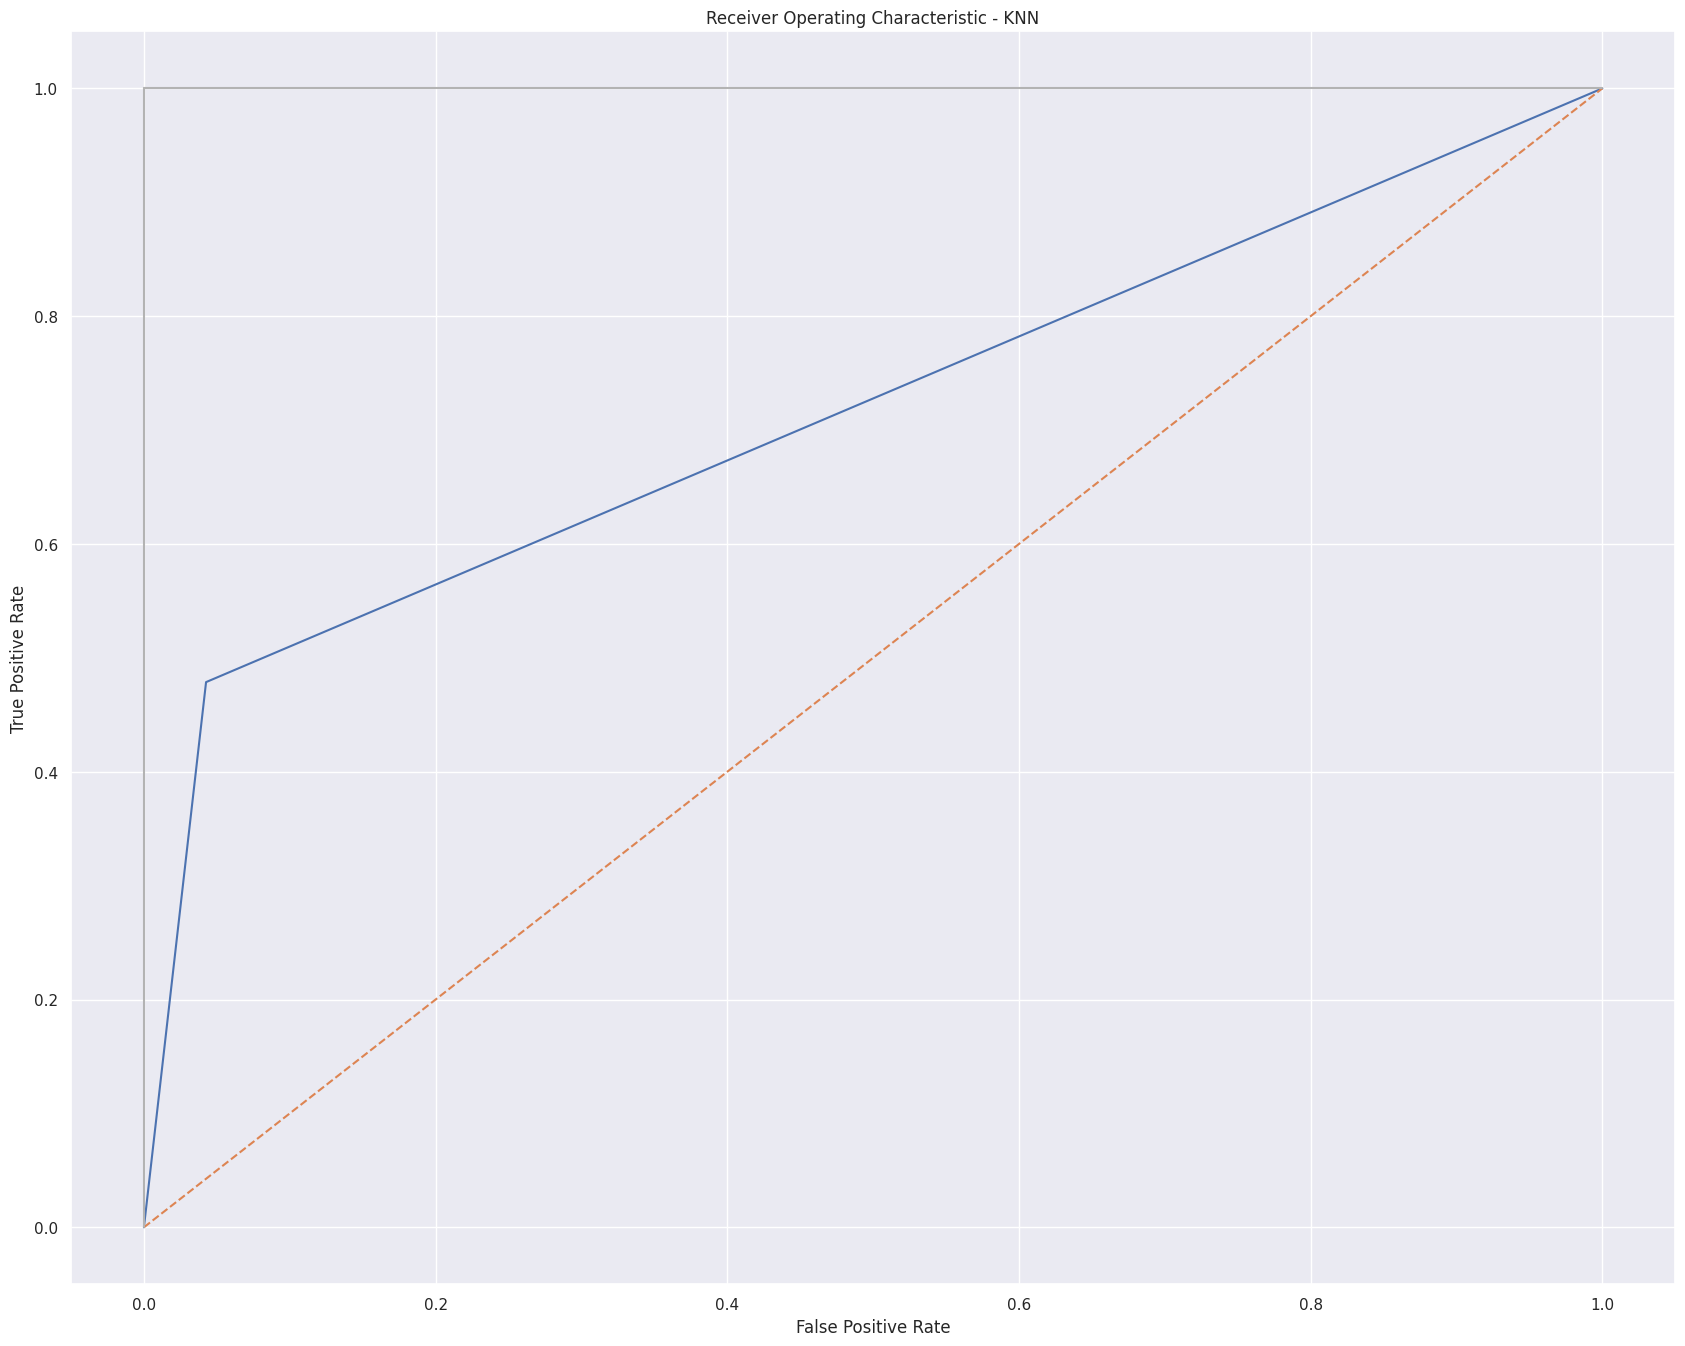

In [ ]:
#AUC :
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, model.predict(x_test), pos_label = 1)
print(false_positive_rate, true_positive_rate)

#le score AUC
roc_auc_score_KNN1 = roc_auc_score(y_test, model.predict(x_test))
print(roc_auc_score_KNN1)


#la courbe ROC
plt.title('Receiver Operating Characteristic - KNN')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Résultat :
#Le score AUC est tout juste acceptable.
#confirmation de la matrice de confusion : 
#le classement des vrais positifs est moins bon que le classement des vrais négatifs.

In [ ]:
# MAE :
MAE_KNN1 = mae(y_test, y_pred_test_KNN1)
print("Mean Absolute Error' ou 'MAE' : " + str(MAE_KNN1))

#Synthèse des résultats de l'évaluation du modèle KNN1:
#acc_train et F1score sont de 1, alors que les mêmes score en prédiction du test sont de 0.851 et 0.75 respectivement.
#cela indique du surapprentissage
#la matrice de confusion indique que, si notre modèle classe bien sur raintomorrow = 0, il n'arrive pas à classer sur raintomorrow = 1.
#Cela est confirmé par la courbe ROC et le score AUC acdeptable (0.71)
#La MAE est faible, ce qui corrobore les bonnes performances globales du modèle.

Mean Absolute Error' ou 'MAE' : 0.1480461353072818


In [ ]:
#Nous constatons que l'accuracy et le F1score après itération du KNN avec hyperparamètres obtenus par la gridsearchCV sont proches de 1
#alors que les mêmes scores sur le test sont inférieurs de au moins 0.1
#cela indique un problème de surapprentissage
#Pour éviter cela, nous devons estimer le role des hyperparamètres weight et nbr de voisins.
#hypothèse : en sacrifiant le weight = distance et en déterminant le nbr minimal de voisins optimal
# commun entre train et test, nous pourrons réduire le sur aprentissahge sans impacter outre mesure les performances sur le test.

n_voisins = range(1, 50)

score_train = []
score_pred = []
voisin = []

for i in n_voisins:
    model = KNeighborsClassifier(n_neighbors=i)

    model.fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_pred = model.predict(x_test)

    acc_train = accuracy_score(y_train, y_pred_train)
    score_train.append(acc_train)

    acc_pred = accuracy_score(y_test, y_pred_pred)
    score_pred.append(acc_pred)
    voisin.append(i)


#visualisation de l'accuracy en fonction du nbr de voisins : recherche du meilleur nbr_voisins
plt.plot(voisin, score_train, c = 'blue')
plt.plot(voisin, score_pred, c = 'red')
plt.xlabel('nbr voisins')
plt.ylabel('accuracy')
plt.show()



KeyboardInterrupt: 

In [ ]:
#on constate que le nombre de voisins atteint un plateau dès 12 voisins environ. 
# Nous allons donc tester avec 13 voisins de façon à eviter le surapprentissage.

In [72]:
#maintenant que l'on connait le nbr de voisins idéal, on prédit.

model = KNeighborsClassifier(metric='manhattan', n_neighbors=13) #mettre ici le meilleur nbr_voisins trouvé plus haut
model.fit(x_train,y_train)

#sauver le modele
import joblib
import pickle
from joblib import dump, load

filename = "KNN2.joblib"
joblib.dump(model, filename)

y_pred_train_KNN2 = model.predict(x_train)
y_pred_test_KNN2 = model.predict(x_test)

#obtenir l'accuracy
acc_train_KNN2 = accuracy_score(y_train, y_pred_train_KNN2)
acc_test_KNN2 = accuracy_score(y_test, y_pred_test_KNN2)

#obtenir le F1 score
f1score_train_KNN2 = f1_score(y_train, y_pred_train_KNN2, average='macro')
f1score_test_KNN2 = f1_score(y_test, y_pred_test_KNN2, average='macro')

#afficher l'accuracy et F1 score
print("acc_train : ", acc_train_KNN2, "acc_test :", acc_test_KNN2)
print("F1score_train : ", f1score_train_KNN2, "F1score_test : ", f1score_test_KNN2)

#Afficher une matrice de confusion pour comparer les classes réelles et prédites.
#pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

#matrice de confusion
print(pd.crosstab(y_test, y_pred_test_KNN2, rownames=['Classe réelle'], colnames=['Classe prédite']))


acc_train :  0.8708469616112928 acc_test : 0.8492855913238079
F1score_train :  0.7856524081116261 F1score_test :  0.7487577238829192
Classe prédite   0.0   1.0
Classe réelle             
0.0             8608   451
1.0             1300  1259


In [ ]:
loaded_model = joblib.load(filename)
result = loaded_model.score(x_test, y_test)
print(result)

0.8492855913238079


In [ ]:
test_pred_unitaire = model.predict(x_train[1,:])
test_pred_unitaire

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
[0.         0.04978474 1.        ] [0.         0.49198906 1.        ]
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statis

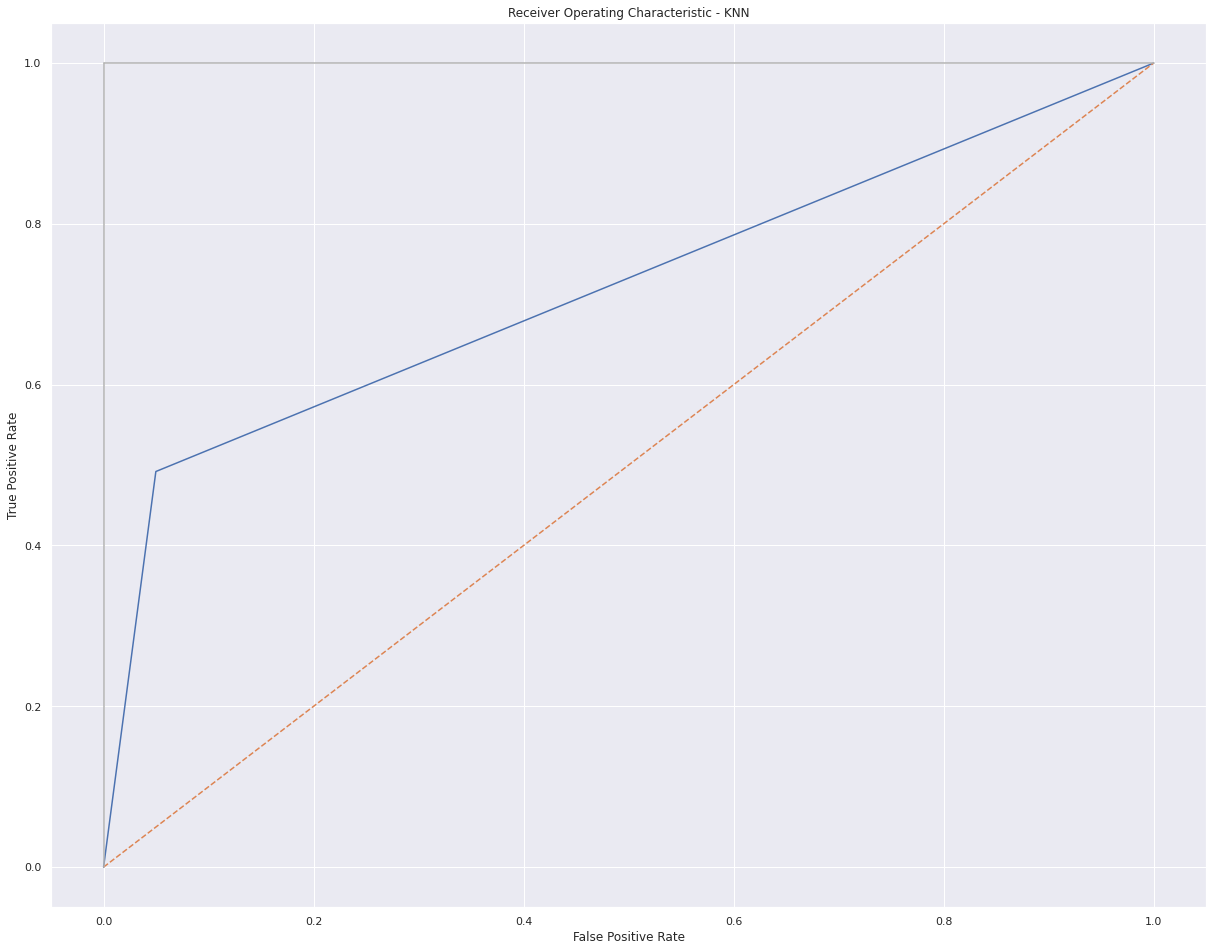

In [ ]:
#AUC :
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, model.predict(x_test), pos_label = 1)
print(false_positive_rate, true_positive_rate)

#le score AUC
roc_auc_score_KNN2 = roc_auc_score(y_test, model.predict(x_test))
print(roc_auc_score_KNN2)

#la courbe ROC
plt.title('Receiver Operating Characteristic - KNN')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Résultat :
#Le score AUC est tout juste acceptable.
#confirmation de la matrice de confusion : 
#le classement des vrais positifs est moins bon que le classement des vrais négatifs.

In [ ]:
# MAE :
MAE_KNN2 = mae(y_test, y_pred_test_KNN1)
print("Mean Absolute Error' ou 'MAE' : " + str(MAE_KNN2))


#Choix du modèle KNN optimal : 
#acc_train et F1score_train diminuent et se raprochent des scores de prédiction.
#le surapprentissage a été diminué. Le deuxième KNN testé surapprend moins que le premier KNN1
#et avec un score comparable à l'autre donc il est optimal.

#Evaluation du modèle KNN optimal : 
#La matrice de confusion indique que, si notre modèle classe bien sur raintomorrow = 0, il n'arrive pas à classer sur raintomorrow = 1.
#Cela est confirmé par la courbe ROC et le score AUC est acceptable (0.71)
#la MAE est faible, ce qui corrobore les bonnes performances globales du modèle.
#conclusion sur le KNN : 
#Le KNN optimisé est satisfaisant au regard du score de prédiction accuracy mais un peu moins sur 
#le classement de la modalité positive de la variable cible (selon les indicateurs f1-score et AUC).

Mean Absolute Error' ou 'MAE' : 0.1480461353072818


In [ ]:
# II- 3) Test du modèle de type arbre de décision :

'''
# Déterminer les meilleurs paramètres : Mis en commentaire car long à tourner

# Création d'un modèle d'arbre de décision
from sklearn.tree import DecisionTreeClassifier 

##Hyperparamétrage (optimisation) :
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(1,30), 
'min_samples_leaf' : [1,2,4,5,10,20,30,40,80,100]}
gs = GridSearchCV(DecisionTreeClassifier(), param_grid, verbose = 1, cv = 5)
gs.fit(x_train, y_train)
display(print(gs.best_score_))
display(print(gs.best_estimator_))
display(print(gs.best_params_))

#Le résultat est : dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7, min_samples_leaf = 40, random_state = 123) #mettre ici hyperparamètres détemrinés ci dessus
'''

##la computation prend du temps... résultat de la gridsearchCV pour random forest :  
# Autre possibilité : utiliser un script simplifié pour déterminer le meilleur nombre de voisins.

'''j
for mdepth, crt in zip ([2,3,4,5,6,7,8,9], ["gini", "entropy"]):
    dtc = DecisionTreeClassifier(criterion = crt, max_depth = mdepth, 
    random_state = 123)
    dtc.fit(x_train, y_train)
    y_pred_train_arbre = dtc.predict(x_train)
    y_pred_test_arbre = dtc.predict(x_test)
'''



'j\nfor mdepth, crt in zip ([2,3,4,5,6,7,8,9], ["gini", "entropy"]):\n    dtc = DecisionTreeClassifier(criterion = crt, max_depth = mdepth, \n    random_state = 123)\n    dtc.fit(x_train, y_train)\n    y_pred_train_arbre = dtc.predict(x_train)\n    y_pred_test_arbre = dtc.predict(x_test)\n'

In [ ]:
##Test du modèle DTC optimisé : 

#création du modèle optimisé et entrainement sur le jeu d'entrainement :
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7, min_samples_leaf = 40, random_state = 123) #mettre ici hyperparamètres détemrinés ci dessus
model.fit(x_train, y_train)
y_pred_train_arbre = model.predict(x_train)
y_pred_test_arbre = model.predict(x_test)

#obtenir l'accuracy :
acc_train_arbre = accuracy_score(y_train, y_pred_train_arbre)
acc_test_arbre = accuracy_score(y_test, y_pred_test_arbre)

#obtenir le F1 score :
f1score_train_arbre = f1_score(y_train, y_pred_train_arbre, average='macro')
f1score_test_arbre = f1_score(y_test, y_pred_test_arbre, average='macro')

#afficher l'accuracy et F1 score :
print("acc_train : ", acc_train_arbre, "acc_test :", acc_test_arbre)
print("F1score_train : ", f1score_train_arbre, "F1score_test :", f1score_test_arbre)

#matrice de correlation
print(pd.crosstab(y_test, y_pred_test_arbre, rownames = ["Classe_réelle"], colnames = ["Classe_prédite"]))

acc_train :  0.8561929764159063 acc_test : 0.8419693578929248
F1score_train :  0.764941337857463 F1score_test : 0.7392489865491771
Classe_prédite   0.0   1.0
Classe_réelle             
0.0             8537   522
1.0             1314  1245


In [ ]:
##print des ytest et ypred

df_result = pd.DataFrame()
df_result['y_test'] = y_test
df_result['y_pred'] = y_pred_test_arbre
df_result.head(20)

,y_test,y_pred
0,1.0,1.0
1,1.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,1.0,1.0
6,0.0,0.0
7,0.0,0.0
8,1.0,0.0
9,1.0,1.0


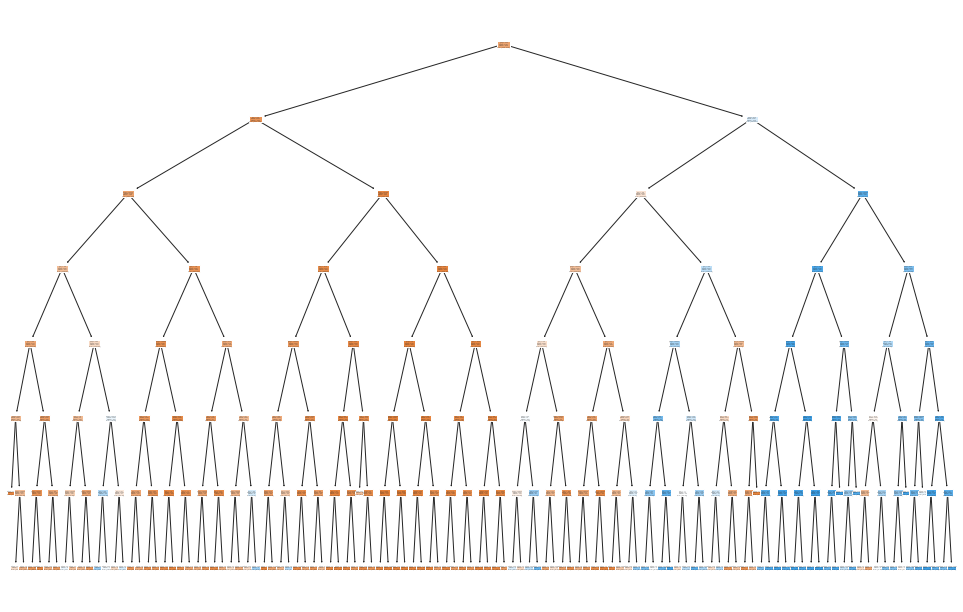

In [ ]:
# Affichons notre abre de décision pour vérifier les scores gini
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize = (17,11))
plot_tree(model, filled = True)
plt.show();

[0.         0.05762225 1.        ] [0.         0.48651817 1.        ]
0.7144479585243384


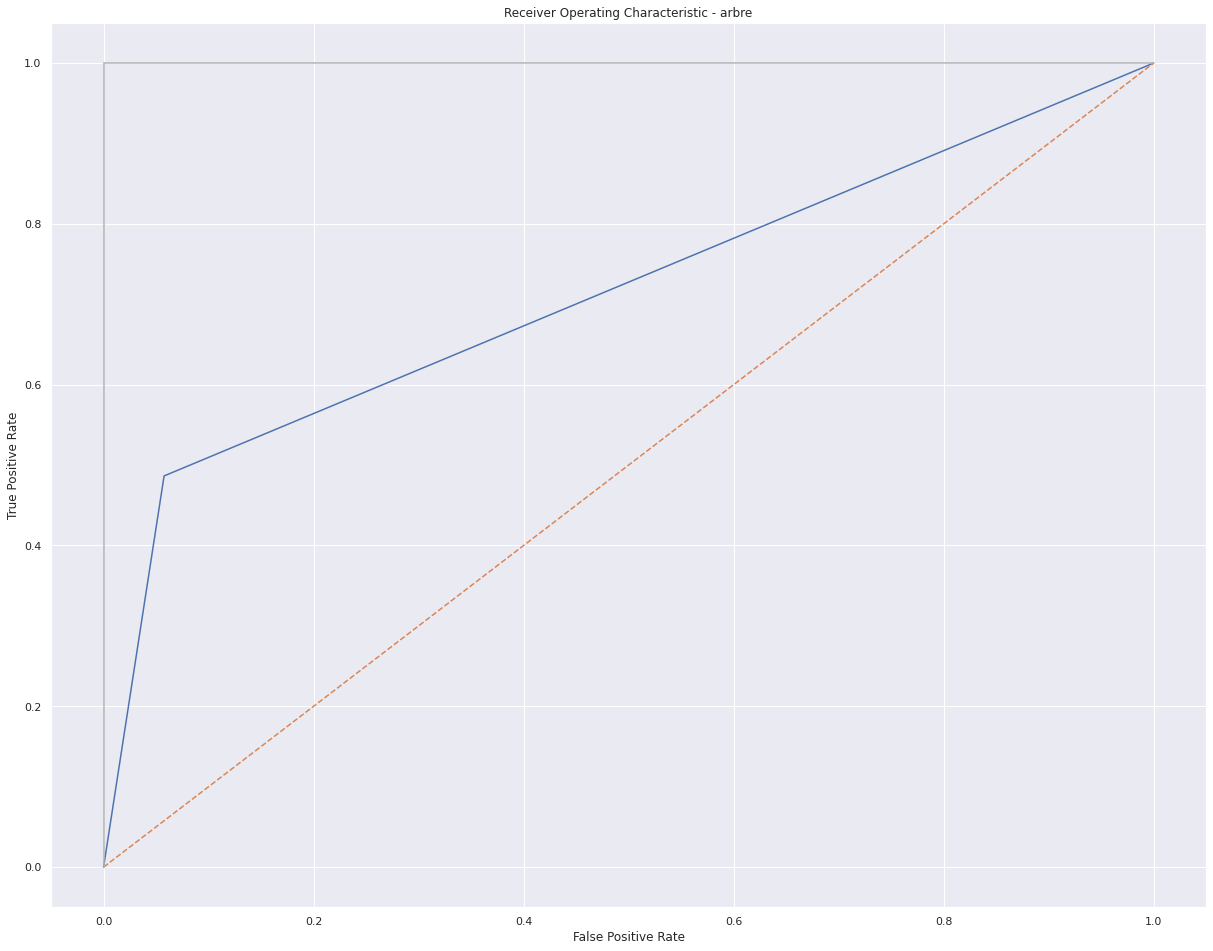

In [ ]:
#AUC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, model.predict(x_test), pos_label = 1)
print(false_positive_rate, true_positive_rate)
roc_auc_score_arbre = roc_auc_score(y_test, model.predict(x_test))
print(roc_auc_score_arbre)

#la courbe ROC
plt.title('Receiver Operating Characteristic - arbre')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Résultat :
#Le score est tout juste acceptable.
#confirmation l'interprétation de la matrice de confusion : 
#le classement des vrais positifs est moins bon que le classement des vrais négatifs.

In [ ]:
# MAE :
MAE_arbre = mae(y_test, y_pred_test_arbre)
print("Mean Absolute Error' ou 'MAE' : " + str(MAE_arbre))

#La MAE est faible, ce qui corrobore avec la bonne performance du modèle.

Mean Absolute Error' ou 'MAE' : 0.15803064210707524


In [ ]:
variable_importance = {}
for feature, importance, in zip(df_bourrin.columns, model.feature_importances_):
    variable_importance[feature] = importance

ClassementImportant = pd.DataFrame.from_dict(variable_importance, orient = "index").rename(columns = {0 : "importance"})

print(ClassementImportant.sort_values(by = "importance", ascending = False).head(7))


               importance
Humidity3pm      0.575641
Sunshine         0.186205
Pressure3pm      0.122309
WindGustSpeed    0.068049
Rainfall         0.017803
MinTemp          0.006798
Cloud3pm         0.003679


In [ ]:
#Synthèse des résultats de l'évaluation du modèle arbre de décision :
#acc_train et F1score_train sont similaires à ceux du KNN2, et proches des scores de prédiction.
#La matrice de confusion indique que, si l'arbre de décision classe bien la modalité 0 de RainTomorrow,
# il n'arrive pas à classer sur la modalité 1 de RainTomorrow .
#Cela est confirmé par la courbe ROC et le score AUC relativement faible (0.71)
#La MAE est faible, ce qui corrobore les bonnes performances globales de l'arbre de décision.

In [ ]:
###II-4) Régression logistique

##a)test de la regression logistique sans oversampling : 

#Nous testons la regression logistique puisque ce modèle est plus simple
#et certains modèles testés comme le SVC linéaire prennent beaucoup de temps, 
#nous voulons comparer les résultats de performances avec des modèles plus courts en temps

In [ ]:
#Nous lançons une GridSearch pour optimiser les hyperparamètres du modèle avant de l'évaluer sur ses paramètres optimisés: 
#plus le C est grand plus la régularisation est faible.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] , "penalty":["l1","l2"]}# l1 lasso l2 ridge}
gs = GridSearchCV(LogisticRegression(), params, verbose = 1, cv = 10)
gs.fit(x_train, y_train)
display(print(gs.best_score_))
display(print(gs.best_estimator_))
display(print(gs.best_params_))

#finir interprétation : les intercept etc et graphe des scores par C.
#et comme les autres.
#Finir les inteprétations spécifiques pour ce modèle logreg (les intercep, pes probs
#etc voir le cours) et les mêmes inteprrétations que preparées pour SVC pour lundi.

#Analyse des résultats : le temps est très court et le score est comparable à la SVC sans oversampling. 
#Nous n'avons pas comparé avec tous les modèles pour le moment mais c'est
#pour le moment un modèle qui semble parmi les meilleurs sur l'ensemble des critères de choix
#(temps, score, interprétabilité).

Fitting 10 folds for each of 14 candidates, totalling 140 fits
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    ht

None

LogisticRegression(C=0.1)


None

{'C': 0.1, 'penalty': 'l2'}


None

In [ ]:
#Puis on lance le meilleur modèle : 

#Tout d'abord nous lançons un modèle simple avec un C intermédiaire , 1, afin d'avoir des 
#premiers résultats rapidement et voir le temps mis avant de passer à une gridsearch :

model = LogisticRegression(C=0.01, penalty= 'l2')
model.fit(x_train, y_train)

#évaluation du  modèle : 
print('coef :', model.coef_)
print('intercept :', model.intercept_)

y_pred_train_logreg = model.predict(x_train)
y_pred_test_logreg = model.predict(x_test)

#obtenir l'accuracy
acc_train_logreg = accuracy_score(y_train, y_pred_train_logreg)
acc_test_logreg = accuracy_score(y_test, y_pred_test_logreg)

#obtenir le F1 score
f1score_train_logreg = f1_score(y_train, y_pred_train_logreg, average='macro')
f1score_test_logreg = f1_score(y_test, y_pred_test_logreg, average='macro')

#afficher l'accuracy et F1 score
print("acc_train : ", acc_train_logreg, "acc_test :", acc_test_logreg)
print("F1score_train : ", f1score_train_logreg, "F1score_test : ", f1score_test_logreg)

#Afficher une matrice de confusion pour comparer les classes réelles et prédites.
#pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

#matrice de confusion
print(pd.crosstab(y_test, y_pred_test_logreg, rownames=['Classe réelle'], colnames=['Classe prédite']))


'''
probs = log_regb.predict_proba(x_test)   # Calcul des probabilité d'appartenir à une classe donnée
y_probs_pred = np.where(probs[:,1]>0.4,1,0)   # vecteur composé que de 1 (si probs[i] > 40 %) et ou de 0 (si probs <40 %)
'''



coef : [[-0.02662503  0.04105151  0.03120189 -0.02429968 -0.1504014   0.01660251
   0.0683579  -0.02046842 -0.02041314 -0.00671391  0.06236434  0.06169152
  -0.06923006  0.02716167  0.11262133  0.0306697   0.01593732]]
intercept : [0.00049106]
acc_train :  0.8542778447237046 acc_test : 0.8428300912377346
F1score_train :  0.7622171550564454 F1score_test :  0.7437610811164417
Classe prédite   0.0   1.0
Classe réelle             
0.0             8508   551
1.0             1275  1284
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimiz

"\nprobs = log_regb.predict_proba(x_test)   # Calcul des probabilité d'appartenir à une classe donnée\ny_probs_pred = np.where(probs[:,1]>0.4,1,0)   # vecteur composé que de 1 (si probs[i] > 40 %) et ou de 0 (si probs <40 %)\n"

[0.         0.06082349 1.        ] [0.        0.5017585 1.       ]
0.7204675044811744


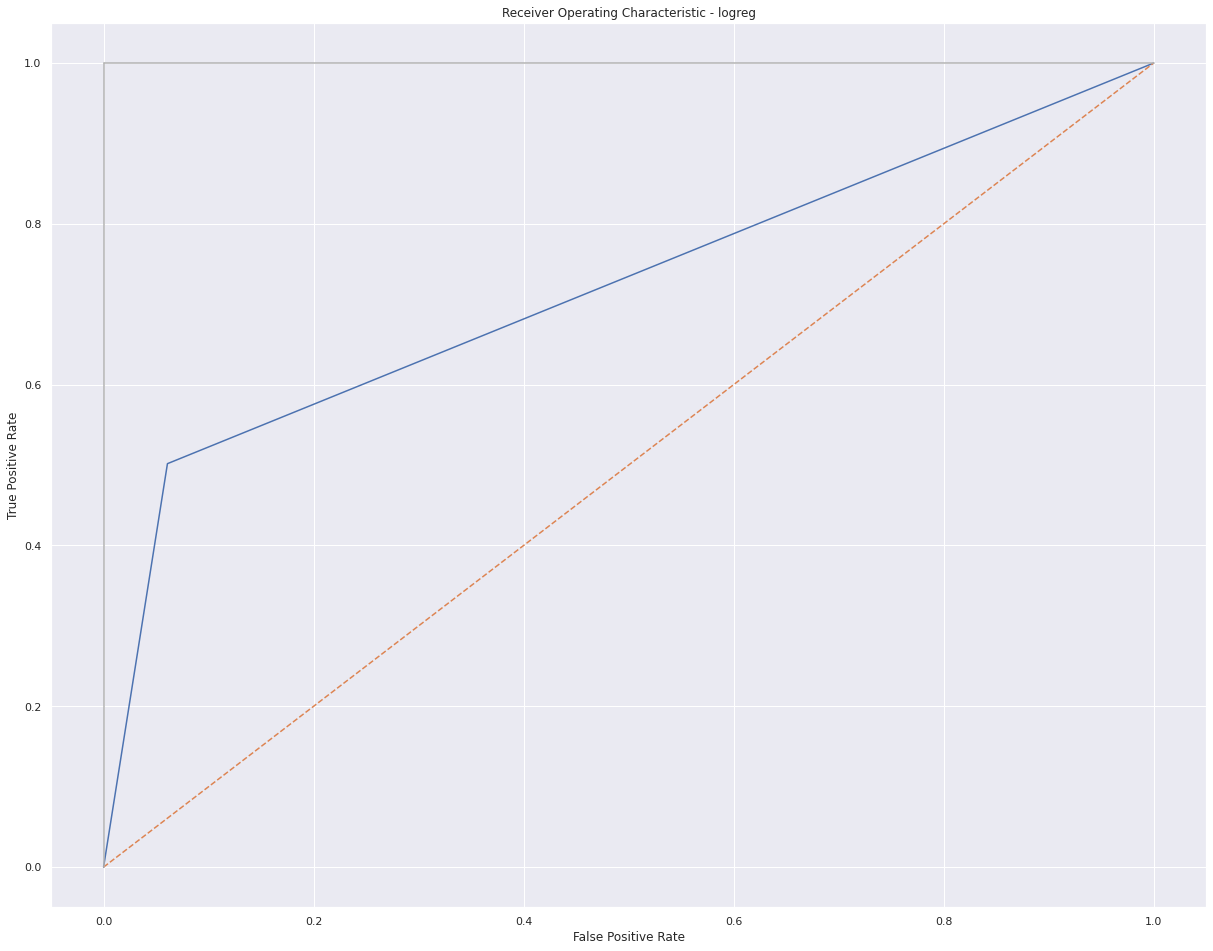

In [ ]:
#AUC et la courbe ROC:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, model.predict(x_test), pos_label = 1)
print(false_positive_rate, true_positive_rate)
roc_auc_score_logreg = roc_auc_score(y_test, model.predict(x_test))
print(roc_auc_score_logreg)

plt.title('Receiver Operating Characteristic - logreg')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Résultat :
#Le score est tout juste acceptable.
#confirmation de la matrice de confusion : 
#le classement des vrais positifs est moins bon que le classement des vrais négatifs.

In [ ]:
# MAE :
MAE_logreg = mae(y_test, y_pred_test_logreg)
print("Mean Absolute Error' ou 'MAE' : " + str(MAE_logreg))

#la MAE est faible, ce qui corrobore la bonne performance du modèle.

Mean Absolute Error' ou 'MAE' : 0.15716990876226544


In [ ]:
#Synthèse des résultats de l'évaluation du modèle régression logistique : 
#acc_train et F1score_train sont similaires à ceux du KNN2, et proches des scores de prédiction.
#la matrice de confusion indique que, si notre modèle classe bien sur RainTomorrow = 0, il n'arrive pas à classer aussi bien
# sur raintomorrow = 1.
#Cela est confirmé par la courbe ROC et le score AUC relativement faible (0.71)
#La MAE est faible, ce qui corrobore les bonnes performances globales du modèle.

In [ ]:
#conclusion sur la régression logistique : 
#les performances tant en terme d'accuracy que de f1score sont similaires aux modèles précédents.
#les performances en terme de classement ne diffèrent pas des KNN.

In [ ]:
## II-5) Test du modèle random forest classifier
from sklearn.ensemble import RandomForestClassifier
'''
#recherche des meilleurs hyperparamètres via gridsearchCV

params = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

gs = GridSearchCV(RandomForestClassifier(), params, verbose = 1, cv = 5)

gs.fit(x_train, y_train)

display(print(gs.best_score_))
display(print(gs.best_estimator_))
display(print(gs.best_params_))

##Le temps de calcul de la GridSearch prend 2h30... résultat de la gridsearchCV pour random forest :  
# Autre possibilité : utiliser un script simplifié pour déterminer le meilleur nombre de voisins.
'''


"\n#recherche des meilleurs hyperparamètres via gridsearchCV\n\nparams = { \n    'n_estimators': [200, 500],\n    'max_features': ['auto', 'sqrt', 'log2'],\n    'max_depth' : [4,5,6,7,8],\n    'criterion' :['gini', 'entropy']\n}\n\ngs = GridSearchCV(RandomForestClassifier(), params, verbose = 1, cv = 5)\n\ngs.fit(x_train, y_train)\n\ndisplay(print(gs.best_score_))\ndisplay(print(gs.best_estimator_))\ndisplay(print(gs.best_params_))\n\n##Le temps de calcul de la GridSearch prend 2h30... résultat de la gridsearchCV pour random forest :  \n# Autre possibilité : utiliser un script simplifié pour déterminer le meilleur nombre de voisins.\n"

In [ ]:
#temps d'execution de la gridsearchCV : environ 2H - 2H30
#meilleurs paramètres : max_depth = 8, n_estimators = 200, criterion = gini, max_features = sqrt

In [ ]:
#maintenant que l'on connait les meilleurs hyperparamètres

model = RandomForestClassifier(max_depth = 8, n_estimators = 200, criterion = 'gini', max_features = 'sqrt') 
# ici a été mis le meilleur nbr_voisins trouvé plus haut
model.fit(x_train,y_train)

y_pred_train_Rforest1 = model.predict(x_train)
y_pred_test_Rforest1 = model.predict(x_test)

#obtenir l'accuracy
acc_train_Rforest1 = accuracy_score(y_train, y_pred_train_Rforest1)
acc_test_Rforest1 = accuracy_score(y_test, y_pred_test_Rforest1)

#obtenir le F1 score
f1score_train_Rforest1 = f1_score(y_train, y_pred_train_Rforest1, average='macro')
f1score_test_Rforest1 = f1_score(y_test, y_pred_test_Rforest1, average='macro')

#afficher l'accuracy et F1 score
print("acc_train : ", acc_train_Rforest1, "acc_test :", acc_test_Rforest1)
print("F1score_train : ", f1score_train_Rforest1, "F1score_test : ", f1score_test_Rforest1)

#Afficher une matrice de confusion pour comparer les classes réelles et prédites.
#pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

#matrice de confusion
print(pd.crosstab(y_test, y_pred_test_Rforest1, rownames=['Classe réelle'], colnames=['Classe prédite']))

acc_train :  0.8693191599242555 acc_test : 0.8466173179548976
F1score_train :  0.7772308735519564 F1score_test :  0.7362225617405274
Classe prédite   0.0   1.0
Classe réelle             
0.0             8676   383
1.0             1399  1160


[0.        0.0422784 1.       ] [0.         0.45330207 1.        ]
0.7055118369737254


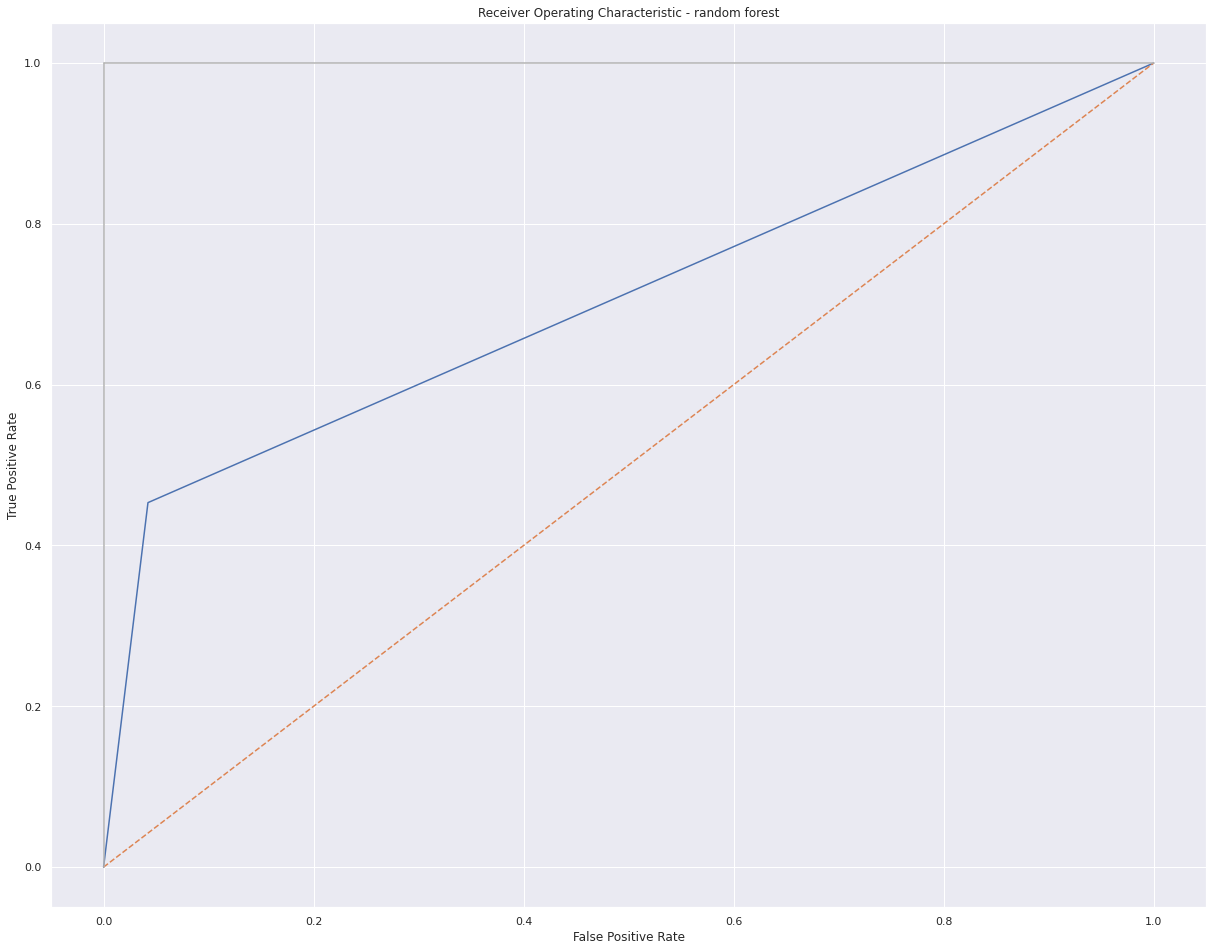

In [ ]:
#AUC :
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, model.predict(x_test), pos_label = 1)
print(false_positive_rate, true_positive_rate)

#le score AUC
roc_auc_score_RForest1 = roc_auc_score(y_test, model.predict(x_test))
print(roc_auc_score_RForest1)

#la courbe ROC
plt.title('Receiver Operating Characteristic - random forest')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Résultat :
#Le score est tout juste acceptable.
#confirmation de la matrice de confusion : 
#le classement des vrais positifs est moins bon que le classement des vrais négatifs.

In [ ]:
# MAE :
MAE_Rforest1 = mae(y_test, y_pred_test_Rforest1)
print("Mean Absolute Error' ou 'MAE' : " + str(MAE_Rforest1))

#la MAE est faible, ce qui corrobore la bonne performance du modèle.

Mean Absolute Error' ou 'MAE' : 0.15338268204510241


In [ ]:
#Synthèse des résultats de l'évaluation du modèle foret aléatoire : 
#acc_train et F1score_train sont similaires à ceux du KNN2, et proches des scores de prédiction.
#la matrice de confusion indique que, si notre modèle classe bien sur raintomorrow = 0, il n'arrive pas à classer sur raintomorrow = 1.
#Cela est confirmé par la courbe ROC et le score AUC relativement faible (0.71)
#rappel sur score AUC : 1 = parfait, 0.5 = à chier)
#la MAE est faible, ce qui corrobore les bonnes performances globales du modèle.

In [ ]:
#conclusion sur la random forest : 
#les performances tant en terme d'accuracy que de f1score sont similaires à la logreg.
#les performances en terme de classement ne diffèrent pas des KNN...

In [ ]:
#conclusion du test sur df_bourrin

#rappel des performandes des différents modèles et hypothèses testées

#conclusion du test sur df_bourrin :

#rappel des performandes des différents modèles et hypothèses testées

#SVM
print("abandonné à cause du trop important temps de compilation")

#KNN 1 : (metric='manhattan', n_neighbors=26, weights='distance') 
#afficher l'accuracy et F1 score
print("scores du KNN gridsearch")
print("acc_train : ", acc_train_KNN1, "acc_test :", acc_test_KNN1)
print("F1score_train : ", f1score_train_KNN1, "F1score_test : ", f1score_test_KNN1)
print("Mean Absolute Error' ou 'MAE' : " + str(MAE_KNN1))
print("l'AUC est de :", roc_auc_score_KNN1)
print(pd.crosstab(y_test, y_pred_test_KNN1, rownames = ["Classe_réelle"], colnames = ["Classe_prédite"]))

#KNN 2 : (metric='manhattan', n_neighbors=13)
print("\n")
print("scores du KNN à 11 voisins")
print("acc_train : ", acc_train_KNN2, "acc_test :", acc_test_KNN2)
print("F1score_train : ", f1score_train_KNN2, "F1score_test : ", f1score_test_KNN2)
print("Mean Absolute Error' ou 'MAE' : " + str(MAE_KNN2))
print("l'AUC est de :", roc_auc_score_KNN2)
print(pd.crosstab(y_test, y_pred_test_KNN2, rownames = ["Classe_réelle"], colnames = ["Classe_prédite"]))

#arbre de décision
print("\n")
print("scores de l'arbre de décision")
print("acc_train : ", acc_train_arbre, "acc_test :", acc_test_arbre)
print("F1score_train : ", f1score_train_arbre, "F1score_test : ", f1score_test_arbre)
print("Mean Absolute Error' ou 'MAE' : " + str(MAE_arbre))
print("l'AUC est de :", roc_auc_score_arbre)
print(pd.crosstab(y_test, y_pred_test_arbre, rownames = ["Classe_réelle"], colnames = ["Classe_prédite"]))

#logreg
print("\n")
print("scores de la régression logistique")
print("acc_train : ", acc_train_logreg, "acc_test :", acc_test_logreg)
print("F1score_train : ", f1score_train_logreg, "F1score_test : ", f1score_test_logreg)
print("Mean Absolute Error' ou 'MAE' : " + str(MAE_logreg))
print("l'AUC est de :", roc_auc_score_logreg)
print(pd.crosstab(y_test, y_pred_test_logreg, rownames = ["Classe_réelle"], colnames = ["Classe_prédite"]))

#random forest
print("\n")
print("scores de la foret aléatoire")
print("acc_train : ", acc_train_Rforest1, "acc_test :", acc_test_Rforest1)
print("F1score_train : ", f1score_train_Rforest1, "F1score_test : ", f1score_test_Rforest1)
print("Mean Absolute Error' ou 'MAE' : " + str(MAE_Rforest1))
print("l'AUC est de :", roc_auc_score_RForest1)
print(pd.crosstab(y_test, y_pred_test_Rforest1, rownames=['Classe réelle'], colnames=['Classe prédite']))


#Choix du meilleur modèle :
#quel est le meilleur modèle ?
#Les deux meilleurs modèles sur le performances globales sont le KNN et la  log reg.
#Nous choisisons aléatoirement KNN pour tester les alternatives avec l'hypothèse 
#que le test sur ce modèle suffira à tester les hypothèses.

abandonné à cause du trop important temps de compilation
scores du KNN gridsearch
acc_train :  1.0 acc_test : 0.8519538646927182
F1score_train :  1.0 F1score_test :  0.7486585157553178
Mean Absolute Error' ou 'MAE' : 0.1480461353072818
l'AUC est de : 0.7180465293281018
Classe_prédite   0.0   1.0
Classe_réelle             
0.0             8673   386
1.0             1334  1225


scores du KNN à 11 voisins
acc_train :  0.8708469616112928 acc_test : 0.8492855913238079
F1score_train :  0.7856524081116261 F1score_test :  0.7487577238829192
Mean Absolute Error' ou 'MAE' : 0.1480461353072818
l'AUC est de : 0.7211021568864197
Classe_prédite   0.0   1.0
Classe_réelle             
0.0             8608   451
1.0             1300  1259


scores de l'arbre de décision
acc_train :  0.8561929764159063 acc_test : 0.8419693578929248
F1score_train :  0.764941337857463 F1score_test :  0.7392489865491771
Mean Absolute Error' ou 'MAE' : 0.15803064210707524
l'AUC est de : 0.7144479585243384
Classe_prédite   

In [ ]:
#Rééchantillonngage : 
#- III-a) et b) undersampling et oversampling SMOTE avec l'hypothèse qu'il faut tester les deux méthodes 

#- III-c) réduction de dimensions par ACP
#- IIId-) threshold selection pour réduire le nbr de variables
#- III-e) effet de la normalisation
#- III-f) essai sur un jeu alternatif : fillna génralisé au lieu de dropna généralisé
#- III-g) essai d'elimination des outliers par selection des quartiles

In [ ]:
#III-a) Evaluation de l'intérêt du rééquilibrage du jeu de données par undersampling:

#Undersampling d'abord : 
#création et entrainement des modèles : 
rUs = RandomUnderSampler()
x_ru, y_ru = rUs.fit_resample(x, y)
print('Classes échantillon undersampled :', dict(pd.Series(y_ru).value_counts()))

#Centroids
#cc = ClusterCentroids()
#X_cc, y_cc = cc.fit_resample(x, y)
#print('Classes échantillon CC :', dict(pd.Series(y_cc).value_counts()))

Classes échantillon undersampled : {0.0: 12729, 1.0: 12729}


In [ ]:
# réduction du jeu de données rééchantilonné, répartition en jeux train et test
x_ru_train, x_ru_test, y_ru_train, y_ru_test = train_test_split(x_ru, y_ru, test_size=0.20, random_state=42)

In [ ]:
#Entrainement du modèle : KNN, avec les données réduites.
model = KNeighborsClassifier(metric='manhattan', n_neighbors=26, weights='distance') #mettre ici le meilleur nbr_voisins trouvé plus haut
model.fit(x_ru_train,y_ru_train)

##Précision et f1-score :
y_pred_train_KNNru = model.predict(x_ru_train)
y_pred_test_KNNru = model.predict(x_ru_test)

#accuracy : 
acc_train_KNNru = accuracy_score(y_ru_train, y_pred_train_KNNru)
acc_test_KNNru = accuracy_score(y_ru_test, y_pred_test_KNNru)
print("accuracy_train : ", acc_train_KNNru, "accuracy_test : ", acc_test_KNNru)

##F1-score :
f1score_train_KNNru = f1_score(y_ru_train, y_pred_train_KNNru, average='macro')
f1score_test_KNNru = f1_score(y_ru_test, y_pred_test_KNNru, average='macro')
print("F1score_train : ", f1score_train_KNNru, "F1score_test : ", f1score_test_KNNru)

#matrice de confusion
print(pd.crosstab(y_ru_test, y_pred_test_KNNru, rownames=['Classe réelle'], colnames=['Classe prédite']))

#résultats :
#baisse significative de l'accuracy (0.79 contre 0.84 dans le KNN sans undersampling)
#par contre, légère augmentation du F1score (0.80 contre 0.74)
#meilleur classement des positifs, dégradation du classement des négatifs

accuracy_train :  1.0 accuracy_test :  0.7926158680282797
F1score_train :  1.0 F1score_test :  0.7925081867618948
Classe prédite   0.0   1.0
Classe réelle             
0.0             2076   479
1.0              577  1960


[0.         0.18747554 1.        ] [0.         0.77256602 1.        ]
0.7925452423505889


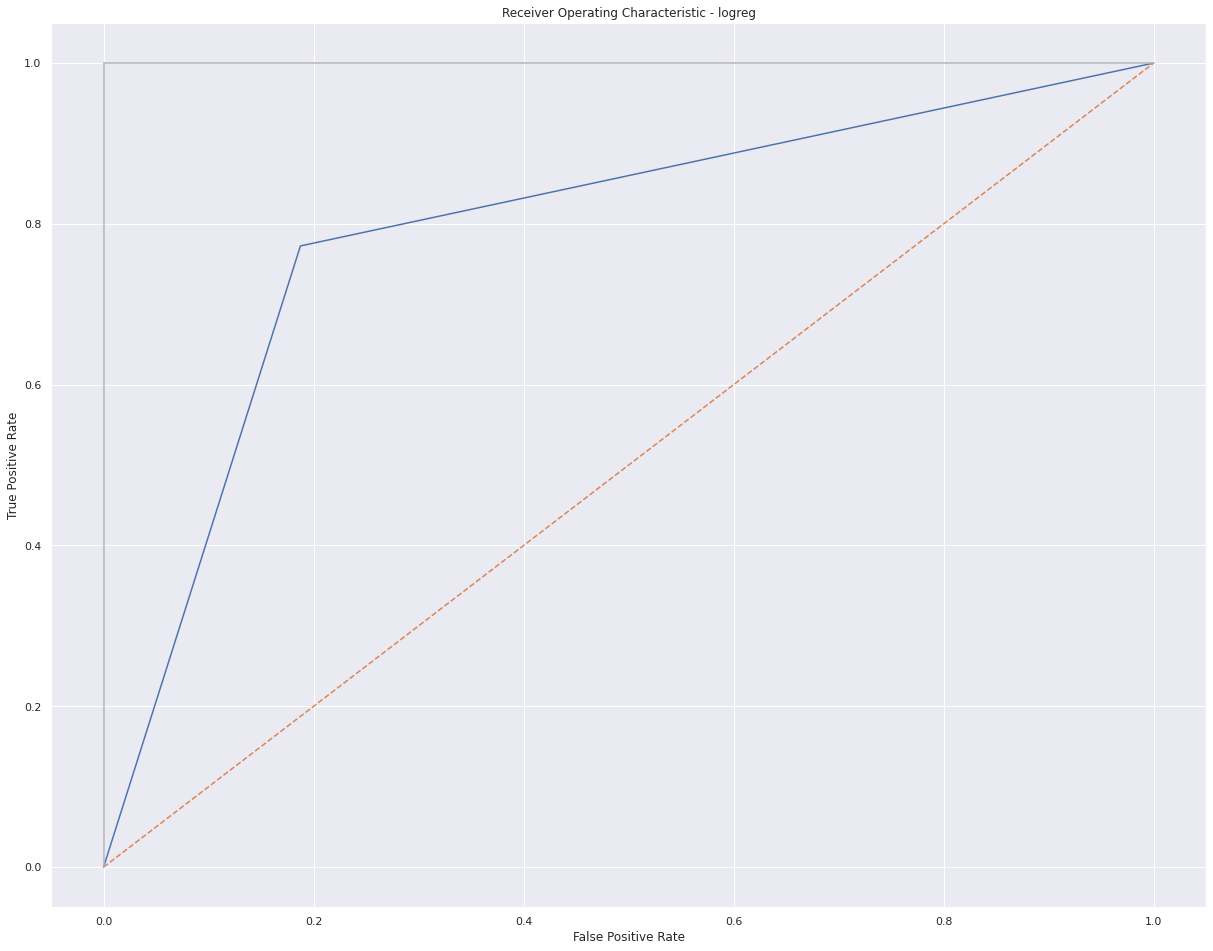

In [ ]:
#AUC :
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_ru_test, model.predict(x_ru_test), pos_label = 1)
print(false_positive_rate, true_positive_rate)

#le score AUC
roc_auc_score_KNNru = roc_auc_score(y_ru_test, model.predict(x_ru_test))
print(roc_auc_score_KNNru)

#la courbe ROC
plt.title('Receiver Operating Characteristic - logreg')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#résultats
#légère amélioration de l'AUC (0.80 contre 0.72 sans undersampling), meilleur classement des positifs

In [ ]:
# MAE :
MAE_KNNru = mae(y_ru_test, y_pred_test_KNNru)
print("Mean Absolute Error' ou 'MAE' : " + str(MAE_KNNru))

#résultats :
# amélioration de la MAE (0.20 contre 0.15), ce qui montre une dégradation des performances globales du modèle

Mean Absolute Error' ou 'MAE' : 0.20738413197172034


In [ ]:
#Conclusion du test de l'intérêt de  l'udersampling sur la perfomance globale des mdu modèle KNN choisi:
#On voit une baisse de l'accuracy et une légère hausse du F1 score.
#Le score AUC est tout juste acceptable, comme pour la version sans undersampling avec le même modèle
#La MAE est moins bonne que si l'on ne fait pas de Random Undersampling. 
#Les performances globales sont réduites (erreur, accuracy...) donc la  méthode 
#ne sera pas conservée pour notre modèle optimal.

In [ ]:
#III-b) Evaluation de l'intérêt du rééquilibrage du jeu de données par oversampling:
# Evaluation de l'oversampling SMOTE ensuite, au cas ou l'undersmampling n'est pas la méthode de rééechantillonage adaptée:
smo = SMOTE()
x_sm, y_sm = smo.fit_resample(x, y)
print('Classes échantillon SMOTE :', dict(pd.Series(y_sm).value_counts()))

Classes échantillon SMOTE : {0.0: 45361, 1.0: 45361}


In [ ]:
# réduction du jeu de données, répartition en jeux train et test
x_sm_train, x_sm_test, y_sm_train, y_sm_test = train_test_split(x_sm, y_sm, test_size=0.20, random_state=42)

In [ ]:
#itération du modèle : KNN, avec les données réduites.
model = KNeighborsClassifier(metric='manhattan', n_neighbors=26, weights='distance') #mettre ici le meilleur nbr_voisins trouvé plus haut
model.fit(x_sm_train,y_sm_train)

##Précision et f1-score :
y_pred_train_KNNsm = model.predict(x_sm_train)
y_pred_test_KNNsm = model.predict(x_sm_test)

#accuracy : 
acc_train_KNNsm  = accuracy_score(y_sm_train, y_pred_train_KNNsm)
acc_test_KNNsm  = accuracy_score(y_sm_test, y_pred_test_KNNsm)
print("acc_train : ", acc_train_KNNsm, "acc_test :", acc_test_KNNsm)

##F1-score :
f1score_train_KNNsm = f1_score(y_sm_train, y_pred_train_KNNsm, average='macro')
f1score_test_KNNsm = f1_score(y_sm_test, y_pred_test_KNNsm, average='macro')
print("F1score_train : ", f1score_train_KNNsm, "F1score_test : ", f1score_test_KNNsm)

#matrice de confusion : 
print(pd.crosstab(y_sm_test, y_pred_test_KNNsm, rownames=['Classe réelle'], colnames=['Classe prédite']))

#résultats :
#hausse à la fois de l'accuracy et du f1 score (0.87 et 0.87 contre 0.85 et 0.74 respectivement pour le KNN sans oversampling)
#meilleur classement des positifs, dégradation du classement des négatifs

acc_train :  1.0 acc_test : 0.8668503720033067
F1score_train :  1.0 F1score_test :  0.8660586932278219
Classe prédite   0.0   1.0
Classe réelle             
0.0             7167  1933
1.0              483  8562


false_positive_rate : [0.         0.21241758 1.        ] true_positive_rate : [0.         0.94660033 1.        ]
score AUC sur données aprèes smote 0.8670913746286879


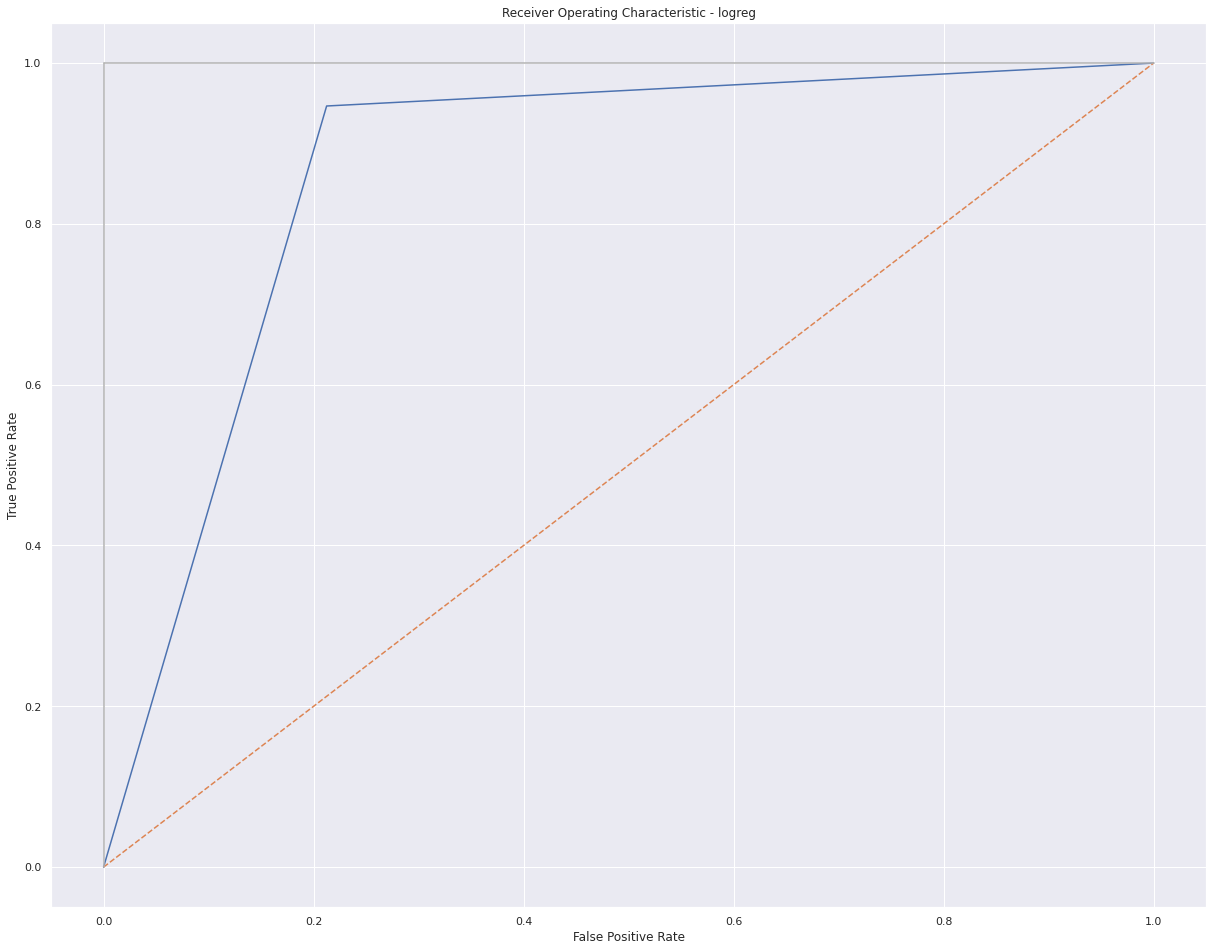

In [ ]:
#AUC :
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_sm_test, model.predict(x_sm_test), pos_label = 1)
print('false_positive_rate :', false_positive_rate, 'true_positive_rate :', true_positive_rate)

#le score AUC
roc_auc_score_KNNsm = roc_auc_score(y_sm_test, model.predict(x_sm_test))
print('score AUC sur données aprèes smote', roc_auc_score_KNNsm)

#la courbe ROC
plt.title('Receiver Operating Characteristic - logreg')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Résultat :
##confirmation de la matrice de confusion : 
#le classement des vrais positifs est moins bon que le classement des vrais négatifs.

In [ ]:
# MAE :
MAE_KNNsm = mae(y_sm_test, y_pred_test_KNNsm)
print("Mean Absolute Error' ou 'MAE' : " + str(MAE_KNNsm))

#la MAE est faible, ce qui corrobore avec la bonne performance du modèle.

Mean Absolute Error' ou 'MAE' : 0.1331496279966933


In [ ]:
#conclusion sur l'oversampling SMOTE :
#Cette méthode d'oversampling SMOTE permet d'améliorer les performances globales du modèle KNN car tous 
#les indicateurs d'évaluation sont améliorés. Nous conservons donc cette méthode pour notre modèle final
#en l'incluant dans la phase de préparation des données.
#nous montrons l'intérêt potentiel de tester un oversampling et un undersampling et non uniquement l'une des deux méthodes 
#lors du test de l'intérêt des méthodes de réchantillonnage sur les performances des modèles. En effet l'une peut améliorer 
#les perfomances globales l'autre non.

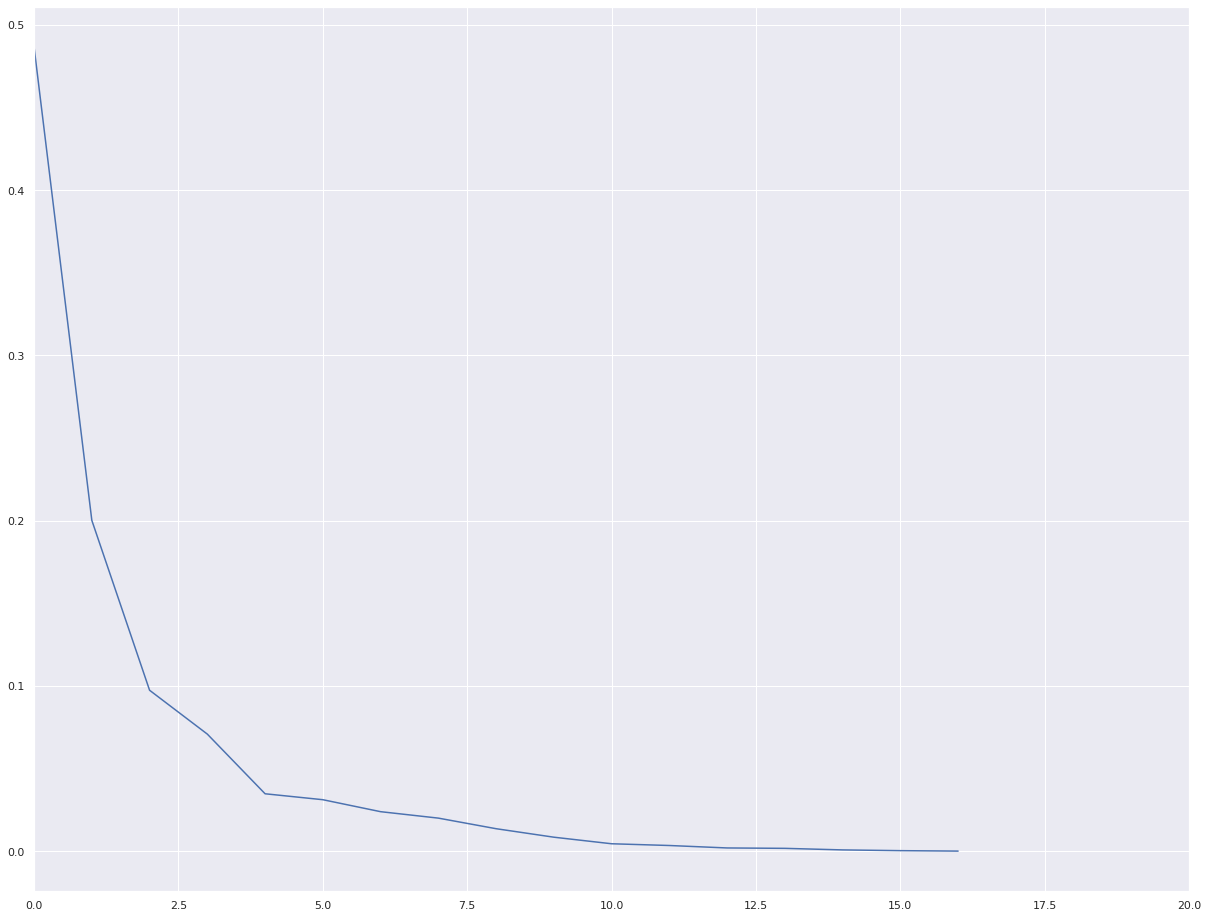

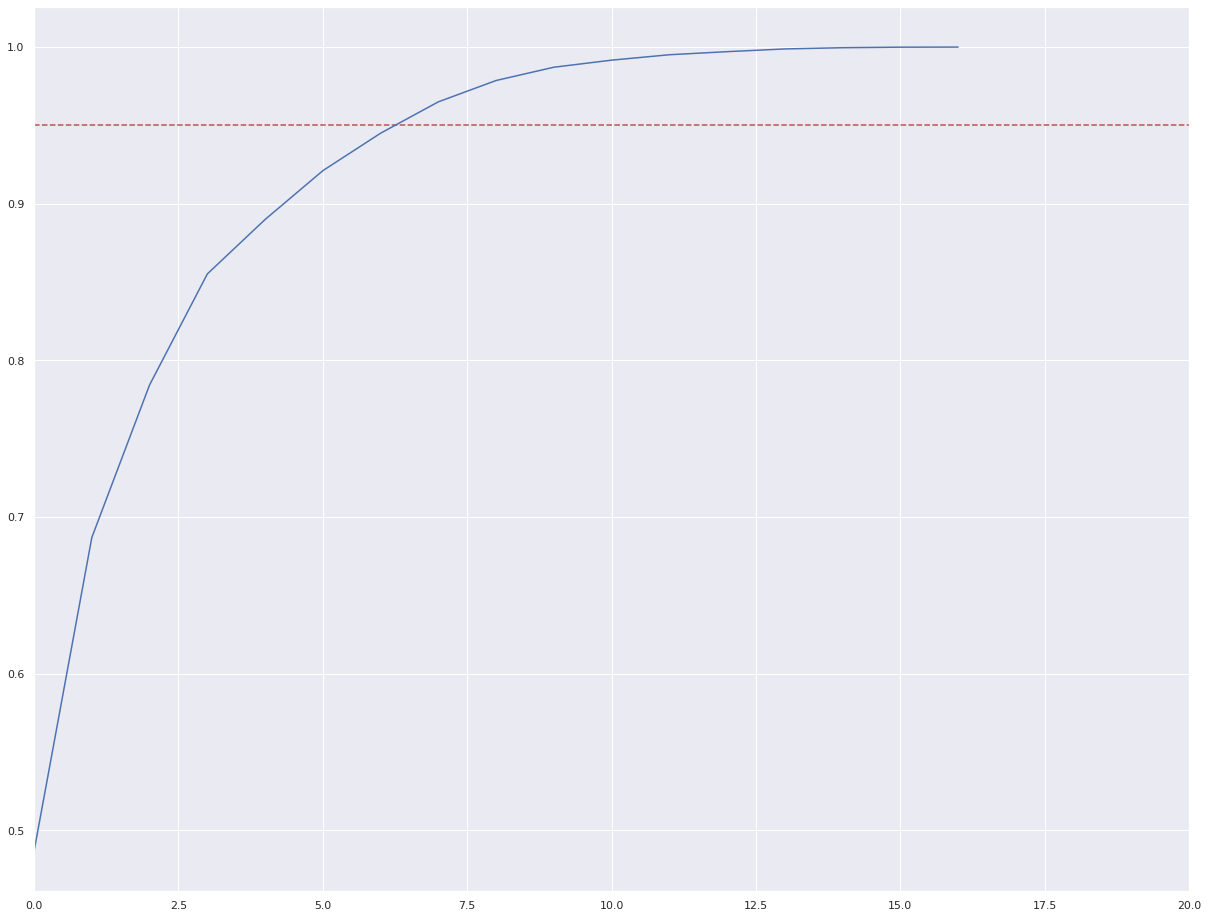

In [ ]:
#III-c) Evaluation de l'intérêt de la réduction de dimensions par acp :

#d) Evaluation de l'intérêt de l'ACP :
pca = PCA()
pca.fit(x_train)

plt.figure()
plt.xlim(0,20)
plt.plot(pca.explained_variance_ratio_);

plt.figure()
plt.xlim(0,20)
plt.axhline(y = 0.95, color ='r', linestyle = '--')
plt.plot(pca.explained_variance_ratio_.cumsum());

In [ ]:
#réduction de x_train et x_test via ACP
pca = PCA(n_components = 0.90)    #à déterminer selon résultat ci dessus
#(n_components = 0.90) = nbr de composantes pour conserver 90% de la variance expliquée cumulée

x_train_pca = pca.fit_transform(x_train)
print("Nombre de composantes retenues :", pca.n_components_)

x_test_pca = pca.transform(x_test)

Nombre de composantes retenues : 6


In [ ]:
#relance du KNN avec hyperparamètres identiques, et x remplacés par x_pca

model = KNeighborsClassifier(metric='manhattan', n_neighbors=26, weights='distance') #mettre ici le meilleur nbr_voisins trouvé plus haut
model.fit(x_train_pca, y_train)

y_pred_train_pca = model.predict(x_train_pca)
y_pred_test_pca = model.predict(x_test_pca)

#accuracy
acc_train_KNNpca = accuracy_score(y_train, y_pred_train_pca)
acc_test_KNNpca = accuracy_score(y_test, y_pred_test_pca)
print("acc_train : ", acc_train_KNNpca, "acc_test :", acc_test_KNNpca)

#F1 score
f1score_train_KNNpca = f1_score(y_train, y_pred_train_pca, average='macro')
f1score_test_KNNpca = f1_score(y_test, y_pred_test_pca, average='macro')
print("F1score_train : ", f1score_train_KNNpca, "F1score_test :", f1score_test_KNNpca)

#matrice de confusion
print(pd.crosstab(y_test, y_pred_test_pca, rownames=['Classe réelle'], colnames=['Classe prédite']))

#Résultats : en terme d'accuracy et de F1score, 
#maintien des performances sur le test.
#le surapprentissage n'est plus présent.
#Nous n'avons pas de gain en termes de pertinence du classement, donc globalement la méthode n'est pas retenue
#puisqu'elle naméliore pas la performance globale du modèle.


acc_train :  1.0 acc_test : 0.8450679979342399
F1score_train :  1.0 F1score_test : 0.736869601349972
Classe prédite   0.0   1.0
Classe réelle             
0.0             8634   425
1.0             1375  1184


[0.         0.04691467 1.        ] [0.         0.46268073 1.        ]
0.7078830320842726


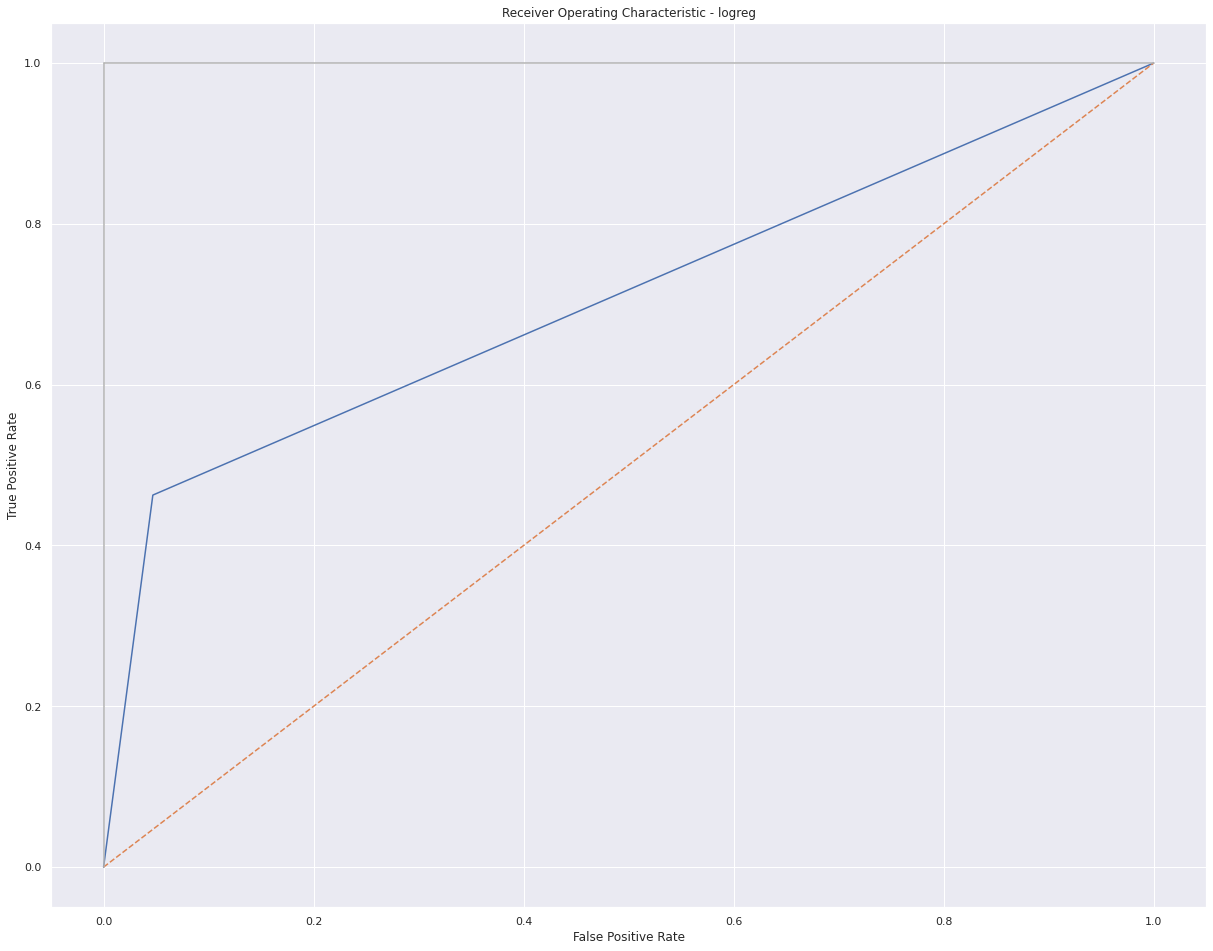

In [ ]:
#AUC :
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, model.predict(x_test_pca), pos_label = 1)
print(false_positive_rate, true_positive_rate)

#le score AUC
roc_auc_score_KNNpca = roc_auc_score(y_test, model.predict(x_test_pca))
print(roc_auc_score_KNNpca)

#la courbe ROC
plt.title('Receiver Operating Characteristic - logreg')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Résultat :
#Le score est tout juste acceptable.
#confirmation de la matrice de confusion : 
#le classement des vrais positifs est moins bon que le classement des vrais négatifs.

In [ ]:
# MAE :
MAE_KNNpca = mae(y_test, y_pred_test_pca)
print("Mean Absolute Error' ou 'MAE' : " + str(MAE_KNNpca))

#la MAE est faible, ce qui corrobore la bonne performance du modèle.

Mean Absolute Error' ou 'MAE' : 0.15493200206576002


In [ ]:
#conclusion sur la réduction de dimensions via ACP :
#l'ACP n'offre aucun avantage en terme de gain de performances. Cette méthode sera donc abandonnée.

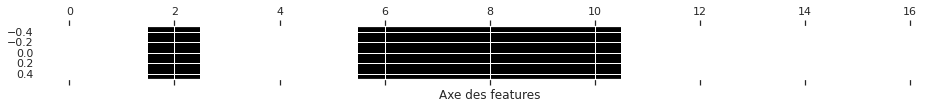

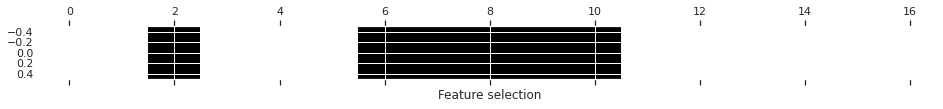

In [ ]:
#III-d) Evaluation de l'intérêt du threshold via un VarianceThreshold

#Créer un sélecteur VarianceThreshold appelé sel avec un threshold de 1e-6.
sel = VarianceThreshold(threshold = 50)

# Ajuster ce sélecteur sur le jeu d'entrainement.
sel.fit(x_train);

#Récupérer le masque du sélecteur dans une variable mask.
mask = sel.get_support()

#Exécuter le code de la cellule pour afficher une représentation des features conservées.
plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
#matshow permet d'afficher un array numpy sous la forme d'une matrice
plt.xlabel('Axe des features');

#Décommentez les lignes ci dessous avant d'exécuter votre code
plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
plt.xlabel('Feature selection');

In [ ]:
#Sauvegarder le jeu d'entrainement et le jeu de test dans des variables X_train_save et X_test_save. Nous y reviendrons plus tard
X_train_save = x_train
X_test_save = x_test

# Supprimer les features de variance nulle des jeux d'entrainement et de test à l'aide de la méthode transform du sélecteur.
x_train_sel = sel.transform(x_train)
x_test_sel = sel.transform(x_test)

In [ ]:
x_train_sel.shape

(46472, 6)

In [ ]:
x_train.shape

(46472, 17)

In [ ]:
#relance du KNN avec hyperparamètres identiques, et x remplacés par x_sel

model = KNeighborsClassifier(metric='manhattan', n_neighbors=26, weights='distance') #mettre ici le meilleur nbr_voisins trouvé plus haut
model.fit(x_train_sel, y_train)

y_pred_train_sel = model.predict(x_train_sel)
y_pred_test_sel = model.predict(x_test_sel)

#obtenir l'accuracy
acc_train_KNNsel = accuracy_score(y_train, y_pred_train_sel)
acc_test_KNNsel = accuracy_score(y_test, y_pred_test_sel)
print("acc_train : ", acc_train_KNNsel, "acc_test :", acc_test_KNNsel)

#obtenir le F1 score
f1score_train_KNNsel = f1_score(y_train, y_pred_train_sel, average='macro')
f1score_test_KNNsel = f1_score(y_test, y_pred_test_sel, average='macro')
print("F1score_train : ", f1score_train_KNNsel, "F1score_test :", f1score_test_KNNsel)

#matrice de confusion

print(pd.crosstab(y_test, y_pred_test_sel, rownames=['Classe réelle'], colnames=['Classe prédite']))

#résultats :
# maintien de l'accuracy, légère baisse du F1score (0.82 contre 0.84 sans threshold selection)
#légère dégradation du classement des positifs

acc_train :  0.9997417799965571 acc_test : 0.8411946978825959
F1score_train :  0.9996222141955113 F1score_test : 0.7263201063249056
Classe prédite   0.0   1.0
Classe réelle             
0.0             8650   409
1.0             1436  1123


[0.         0.04514847 1.        ] [0.        0.4388433 1.       ]
0.6968474135148328


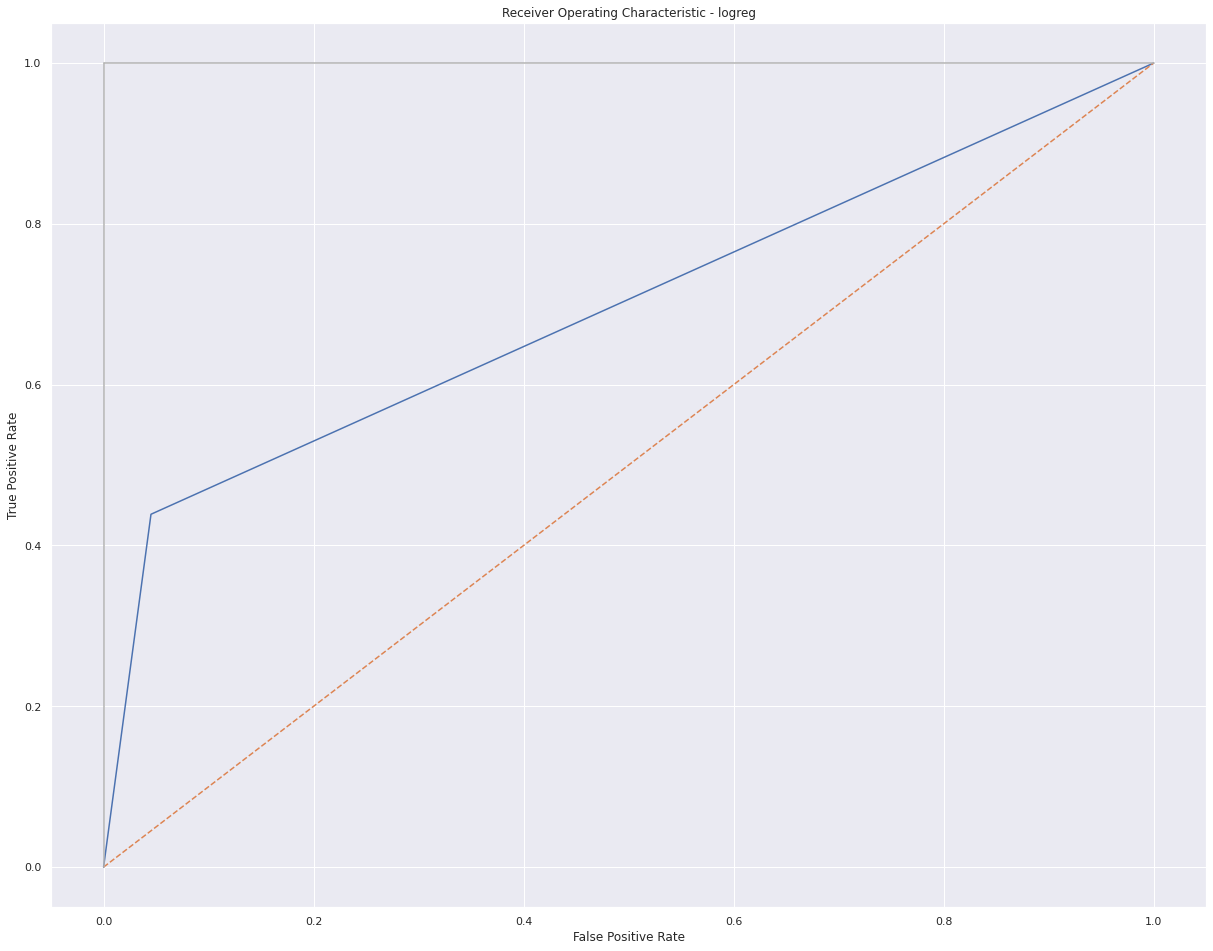

In [ ]:
#AUC :
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, model.predict(x_test_sel), pos_label = 1)
print(false_positive_rate, true_positive_rate)

#le score AUC
roc_auc_score_KNNsel = roc_auc_score(y_test, model.predict(x_test_sel))
print(roc_auc_score_KNNsel)

#la courbe ROC
plt.title('Receiver Operating Characteristic - logreg')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Résultat :
#Le score est tout juste acceptable et infénieur au score du KNN sans threshold selection (0.74)
#confirmation de la matrice de confusion : 
#le classement des vrais positifs est moins bon que le classement des vrais négatifs.

In [ ]:
# MAE :
MAE_KNNsel = mae(y_test, y_pred_test_sel)
print("Mean Absolute Error' ou 'MAE' : " + str(MAE_KNNsel))

#la MAE est faible, ce qui corrobore la bonne performance du modèle.

Mean Absolute Error' ou 'MAE' : 0.15880530211740404


In [ ]:
#conclusion du resampling 4 : threshold via un VarianceThreshold
#il est nécéssaire d'ajuster le threshold afin de conserver de bonnes performances.
#néanmoins, nous constations une baisse des performances (accuracy et f1score)
#ainsi qu'une déterioration du classement des faux positifs.
#  Par contre, il y a une légère amélioration du classement des faux négatifs.
# abaisser le seuil en dessous de 1 (augmentation du nbr de features retenues) 
# rapproche les performances de celles du modèle de base

In [ ]:
#III-e) Evaluation de l'intérêt de la normalisation

In [ ]:
##normalisation:
#Nous le faisons ici, juste avant l'encodage, pour ne pas normaliser l'encodage des valeurs catégorielles.
from sklearn.preprocessing import StandardScaler

df_bourrin_norm = df_bourrin

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
name_columns_numerics = df_bourrin_norm.select_dtypes(include=numerics).columns

#créer, Entrainer et transformer directement les colonnes numériques de df_bourrin_norm
scaler =  StandardScaler()
df_bourrin_norm[name_columns_numerics] = scaler.fit_transform(df_bourrin_norm[name_columns_numerics])

/tmp/ipykernel_70/4199624834.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bourrin_norm[name_columns_numerics] = scaler.fit_transform(df_bourrin_norm[name_columns_numerics])
/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [ ]:
##Découpage des données en jeu d'entrainement et jeu test pour
#permettre d'évaluer la performance globale des modèles sur un jeu nouveau,
#à hauteur de 20 % des données en test, avec en paramètre randomstate=42 rempli pour la reproductibilité 
#des résultats :
#(méthode courante d'évaluation):
y_norm = df_bourrin_norm['RainTomorrow_encode']
x_norm = df_bourrin_norm.drop('RainTomorrow_encode', axis = 1)
print(x_norm)

         MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
6049    0.705196  1.587251 -0.302864     1.775739  1.222001     0.733205   
6050    0.782493  0.683845 -0.302864     2.534270  1.407911     0.107434   
6052    0.937086  1.931405 -0.302864     1.450654  0.770505    -0.518338   
6053    1.323569  2.046124 -0.302864     1.613197  1.195442     1.358976   
6054    1.679133  2.418958 -0.302864     1.559016  0.186216     1.358976   
...          ...       ...       ...          ...       ...          ...   
142298  0.921626  1.329135 -0.302864     0.150315  0.876739    -1.352699   
142299  1.215353  1.214417 -0.302864     0.583762  0.239333    -1.561289   
142300  1.138057  1.243096 -0.302864     0.041954  0.876739    -1.561289   
142301  0.952545  1.099698 -0.302864     0.204496  0.770505    -1.144109   
142302  1.060760  1.085359 -0.302864     0.041954  0.797063    -1.352699   

        WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
6049    

In [ ]:
#reformatage des dimensions de y pour permettre de rentrer les données dans traintestsplit :

y_norm = np.array(y_norm)
y_norm.reshape(-1, 1)

array([[-0.52973154],
       [-0.52973154],
       [-0.52973154],
       ...,
       [-0.52973154],
       [-0.52973154],
       [-0.52973154]])

In [ ]:
#y_norm = y_norm.astype(float)
y_norm = y
x_norm_train, x_norm_test, y_norm_train, y_norm_test = train_test_split(x_norm, y, test_size=0.20, random_state=42)

In [ ]:
#Maintenant que nous connaissons les meilleurs hyperparamètres, 
#évaluons le modèle sur ces derniers : 

##Précision et f1-score : 
model = KNeighborsClassifier(metric='manhattan', n_neighbors=26, weights='distance') #mettre ici le meilleur nbr_voisins trouvé plus haut
model.fit(x_norm_train,y_norm_train)
y_pred_train_KNNnorm = model.predict(x_norm_train)
y_pred_test_KNNnorm = model.predict(x_norm_test)

#accuracy : 
acc_train_KNNnorm = accuracy_score(y_norm_train, y_pred_train_KNNnorm)
acc_test_KNNnorm = accuracy_score(y_norm_test, y_pred_test_KNNnorm)
print("acc_train : ", acc_train_KNNnorm, "acc_test :", acc_test_KNNnorm)

#Résultats : 
#-le score de prédiction est bon : 0.85 à 0.01 près. 
#le modèle est bien plus performant sur le train que sur le test.*

##F1 score :
f1score_train_KNNnorm = f1_score(y_norm_train, y_pred_train_KNNnorm, average='macro')
f1score_test_KNNnorm = f1_score(y_norm_test, y_pred_test_KNNnorm, average='macro')
print("F1score_train : ", f1score_train_KNNnorm, "F1score_test : ", f1score_test_KNNnorm)

#matrice de confusion
print(pd.crosstab(y_test, y_pred_test_KNNnorm, rownames=['Classe réelle'], colnames=['Classe prédite']))

#Résultat : 
# performances similaire au modèle sans normalisation (0.85 et 0.74 pour accuracy et f1score respectivement)
#-La modalité "Il pleut" de la variable cible est moins bien prédite, ce qui s'explique par le nombre de valeurs moins important pour 
#cette modalité dans le dataset des valeurs (déséquilibrage relevé plus haut).

acc_train :  1.0 acc_test : 0.8479084179721122
F1score_train :  1.0 F1score_test :  0.7432784306487124
Classe prédite   0.0   1.0
Classe réelle             
0.0             8634   425
1.0             1342  1217


[0.         0.04691467 1.        ] [0.        0.4755764 1.       ]
0.714330863268329


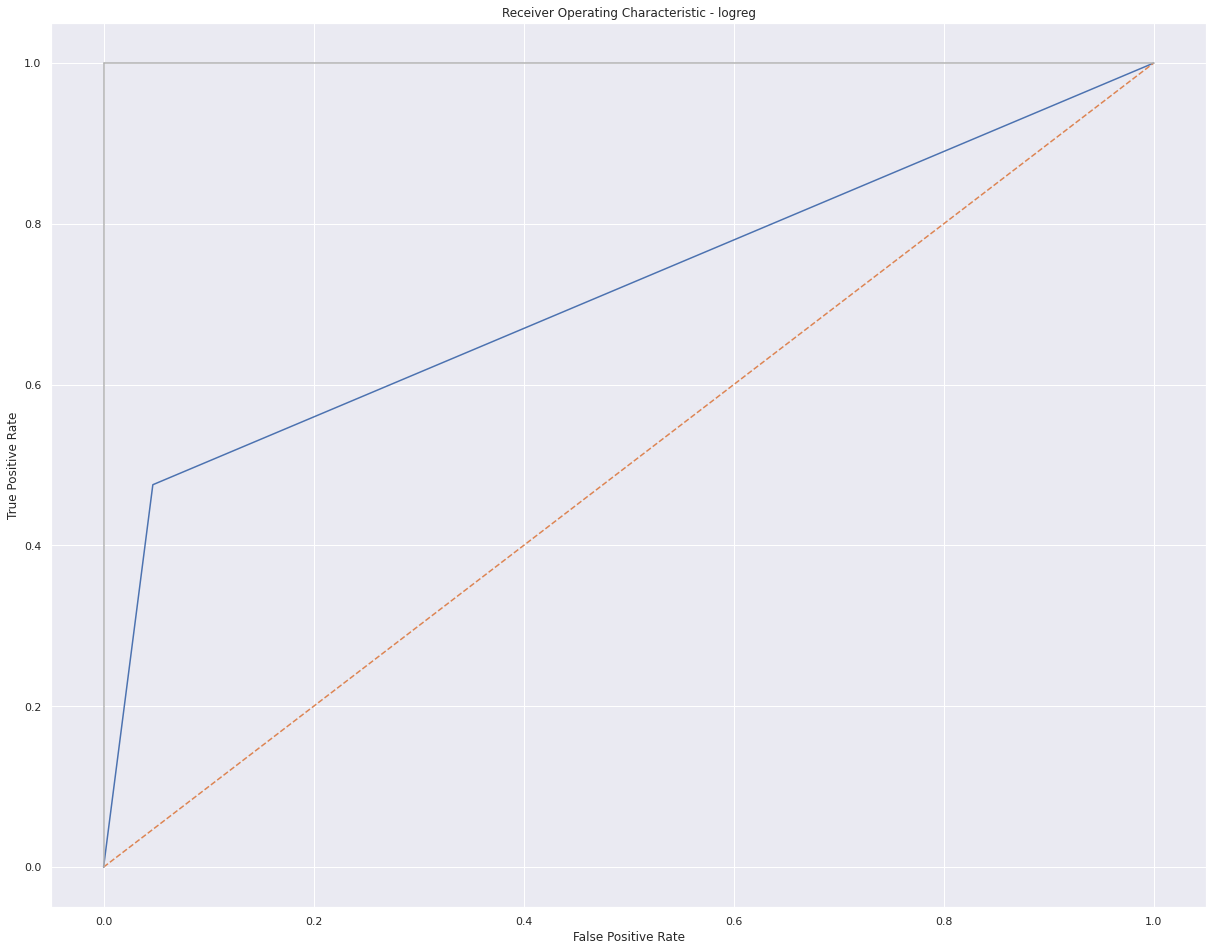

In [ ]:
#AUC :
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_norm_test, model.predict(x_norm_test), pos_label = 1)
print(false_positive_rate, true_positive_rate)

#le score AUC
roc_auc_score_KNNnorm = roc_auc_score(y_norm_test, model.predict(x_norm_test))
print(roc_auc_score_KNNnorm)

#la courbe ROC
plt.title('Receiver Operating Characteristic - logreg')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Résultat :
#Le score est tout juste acceptable. Aucune amélioration gràce à la normalisation.
#confirmation de la matrice de confusion : 
#le classement des vrais positifs est moins bon que le classement des vrais négatifs.

In [ ]:
# MAE :
MAE_KNNnorm = mae(y_norm_test, y_pred_test_KNNnorm)
print("Mean Absolute Error' ou 'MAE' : " + str(MAE_KNNnorm))

#la MAE est faible, ce qui corrobore la bonne performance du modèle.

Mean Absolute Error' ou 'MAE' : 0.15209158202788775


In [ ]:
#synthèse des résulats : interet de la normalisation
#les performance sosnt quasi identiques sans ou avec normaliation : la normalisation ne présente donc aucun interet.
#voire provoque une dégradation des performances.

In [ ]:
#III-f) Evaluation de l'intérêt du jeu de données subtil2 soit traité par fillna généralisé au lieu de dropna généralisé :

In [ ]:
#fillna de df avec la moyenne de chaque variable
df_subtil2 = df.fillna(df.mean())

df_subtil2 = pd.DataFrame(df_subtil2)
#for column_name in df_subtil2.columns:
#    df_subtil2[column_name].fillna(df_subtil2[column_name].mode(), inplace=True)


#verification : recherche des nans
df_subtil2.isna().sum()


MinTemp                0
MaxTemp                0
Rainfall               0
Evaporation            0
Sunshine               0
WindGustDir            0
WindGustSpeed          0
WindSpeed9am           0
WindSpeed3pm           0
Humidity9am            0
Humidity3pm            0
Pressure9am            0
Pressure3pm            0
Cloud9am               0
Cloud3pm               0
Temp3pm                0
RainToday_encode       0
RainTomorrow_encode    0
dtype: int64

In [ ]:
##Découpage des données en jeu d'entrainement et jeu test pour
#permettre d'évaluer la performance globale des modèles sur un jeu nouveau,
#à hauteur de 20 % des données en test, avec en paramètre randomstate=42 rempli pour la reproductibilité 
#des résultats :
#(méthode courante d'évaluation):
y_subtil2 = df_subtil2['RainTomorrow_encode']
x_subtil2 = df_subtil2.drop('RainTomorrow_encode', axis = 1)
print(x_subtil2)

        MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0          13.4     22.9       0.6     5.469824  7.624853           13   
1           7.4     25.1       0.0     5.469824  7.624853           14   
2          12.9     25.7       0.0     5.469824  7.624853           15   
3           9.2     28.0       0.0     5.469824  7.624853            4   
4          17.5     32.3       1.0     5.469824  7.624853           13   
...         ...      ...       ...          ...       ...          ...   
145454      3.5     21.8       0.0     5.469824  7.624853            0   
145455      2.8     23.4       0.0     5.469824  7.624853            0   
145456      3.6     25.3       0.0     5.469824  7.624853            6   
145457      5.4     26.9       0.0     5.469824  7.624853            3   
145458      7.8     27.0       0.0     5.469824  7.624853            9   

        WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0                44.0          2

In [ ]:
#reformatage des dimensions de y pour permettre de rentrer les données dans traintestsplit :
y_subtil2 = np.array(y_subtil2)
y_subtil2.reshape(-1, 1)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
y_subtil2 = y_subtil2.astype(float)
x_subtil2_train, x_subtil2_test, y_subtil2_train, y_subtil2_test = train_test_split(x_subtil2, y_subtil2, test_size=0.20, random_state=42)

In [ ]:
#Maintenant que nous connaissons les meilleurs hyperparamètres, 
#évaluons le modèle sur ces derniers : 

##Précision et f1-score : 
model = KNeighborsClassifier(metric='manhattan', n_neighbors=26, weights='distance') #mettre ici le meilleur nbr_voisins trouvé plus haut
model.fit(x_subtil2_train,y_subtil2_train)
y_pred_train_KNNsubtil2 = model.predict(x_subtil2_train)
y_pred_test_KNNsubtil2 = model.predict(x_subtil2_test)

#accuracy : 
acc_train_KNNsubtil2 = accuracy_score(y_subtil2_train, y_pred_train_KNNsubtil2)
acc_test_KNNsubtil2 = accuracy_score(y_subtil2_test, y_pred_test_KNNsubtil2)
print("acc_train : ", acc_train_KNNsubtil2, "acc_test :", acc_test_KNNsubtil2)

#Résultats : 
#-le score de prédiction est bon : 0.85 à 0.01 près. 
#le modèle est bien plus performant sur le train que sur le test.*

##F1 score :
f1score_train_KNNsubtil2 = f1_score(y_subtil2_train, y_pred_train_KNNsubtil2, average='macro')
f1score_test_KNNsubtil2 = f1_score(y_subtil2_test, y_pred_test_KNNsubtil2, average='macro')
print("F1score_train : ", f1score_train_KNNsubtil2, "F1score_test : ", f1score_test_KNNsubtil2)

#matrice de confusion
print(pd.crosstab(y_subtil2_test, y_pred_test_KNNsubtil2, rownames=['Classe réelle'], colnames=['Classe prédite']))

#Résultat : 
#les performances en terme d'accuracy et de f1score sont similaires à celle du KNN avec df_bourrin.
#par contre, le temps de compilation est beaucoup augmenté (environ 15 minutes contre 1)

acc_train :  0.9999648364013574 acc_test : 0.8475684799043567
F1score_train :  0.9999495026387917 F1score_test :  0.7438986454646275
Classe prédite    0.0   1.0
Classe réelle              
0.0             21099   999
1.0              3336  3005


[0.         0.04520771 1.        ] [0.         0.47390002 1.        ]
0.714346152332653


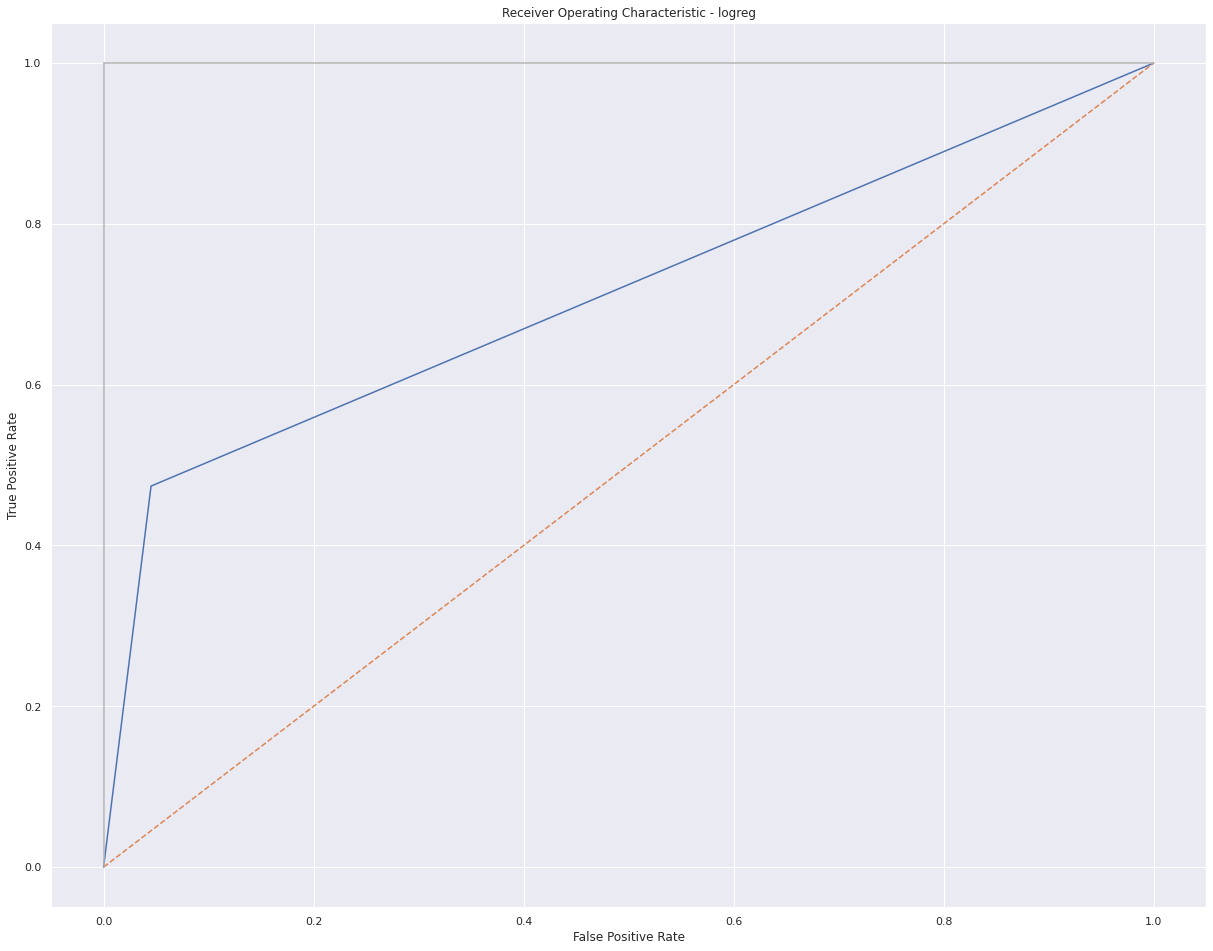

In [ ]:
#AUC :
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_subtil2_test, model.predict(x_subtil2_test), pos_label = 1)
print(false_positive_rate, true_positive_rate)

#le score AUC
roc_auc_score_KNNsubtil2 = roc_auc_score(y_subtil2_test, model.predict(x_subtil2_test))
print(roc_auc_score_KNNsubtil2)

#la courbe ROC
plt.title('Receiver Operating Characteristic - logreg')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Résultat :
#Le score est tout juste acceptable. Aucune amélioration constatée.
#confirmation de la matrice de confusion : 
#le classement des vrais positifs est moins bon que le classement des vrais négatifs.

In [ ]:
# MAE :
MAE_KNNsubtil2 = mae(y_subtil2_test, y_pred_test_KNNsubtil2)
print("Mean Absolute Error' ou 'MAE' : " + str(MAE_KNNsubtil2))

#la MAE est faible, ce qui corrobore la bonne performance du modèle.

Mean Absolute Error' ou 'MAE' : 0.1524315200956433


In [ ]:
#synthèse des résultats : interet d'utliser le jeu de données complet avec fillna.
#non seulement nous ne constatons aucune amélioration des performances, mais de plus nous payons un temps de compilation beaucoup plus important.
#le jeu de données subtil2 doit etre abandonné

In [ ]:
#III-g) Evaluation de l'intérêt d'écarter les outliers par réduction du df_bourrin aux 2 et 3 quantiles

#vu la distribution des données dont les données sont plausibles, éliminer les valeurs extremes semble innaproprié 
# De plus, le modèle devant s'intégrer aux exteêmes du changement à venir, il ne nous semble pas adapté de supprimer les extreêms 
#durant la phase de préparation des données (I-). En effet, au vu de la nature de nos données,où les phénomènes extremes sont normaux et par conséquent doivent etre intégrés.

#vous trouverez le code relatif à cette étude en annexes

In [ ]:
#recueil de tous les résultats des tests d'hypothèses.


#III-a) : KNN avec undersampling : 
print("scores du KNN avec undersampling")
print("acc_train : ", acc_train_KNNru, "acc_test :", acc_test_KNNru)
print("F1score_train : ", f1score_train_KNNru, "F1score_test :", f1score_test_KNNru)
print("Mean Absolute Error' ou 'MAE' : " + str(MAE_KNNru))
print("l'AUC est de :", roc_auc_score_KNNru)
print(pd.crosstab(y_ru_test, y_pred_test_KNNru, rownames = ["Classe_réelle"], colnames = ["Classe_prédite"]))

print("\n")

#III-b) : KNN avec oversampling SMOTE : 
print("scores du KNN avec oversampling SMOTE")
print("acc_train : ", acc_train_KNNsm, "acc_test :", acc_test_KNNsm)
print("F1score_train : ", f1score_train_KNNsm, "F1score_test :", f1score_test_KNNsm)
print("Mean Absolute Error' ou 'MAE' : " + str(MAE_KNNsm))
print("l'AUC est de :", roc_auc_score_KNNsm)
print(pd.crosstab(y_sm_test, y_pred_test_KNNsm, rownames=['Classe réelle'], colnames=['Classe prédite']))

print("\n")

#III-c) : KNN avec acp :
print("scores du KNN avec réduction de dimensions par acp")
print("acc_train : ", acc_train_KNNpca, "acc_test :", acc_test_KNNpca)
print("F1score_train : ", f1score_train_KNNpca, "F1score_test :", f1score_test_KNNpca)
print("Mean Absolute Error' ou 'MAE' : " + str(MAE_KNNpca))
print("l'AUC est de :", roc_auc_score_KNNpca)
print(pd.crosstab(y_test, y_pred_test_pca, rownames = ["Classe_réelle"], colnames = ["Classe_prédite"]))

print("\n")

#III-d) KNN avec selection de variables via threshold :
print("scores du KNN avec selection de variables via threshold (seuil = 50)")
print("acc_train : ", acc_train_KNNsel, "acc_test :", acc_test_KNNsel)
print("F1score_train : ", f1score_train_KNNsel, "F1score_test :", f1score_test_KNNsel)
print("Mean Absolute Error' ou 'MAE' : " + str(MAE_KNNsel))
print("l'AUC est de :", roc_auc_score_KNNsel)
print(pd.crosstab(y_test, y_pred_test_sel, rownames = ["Classe_réelle"], colnames = ["Classe_prédite"]))

print("\n")

#III-e) KNN avec normalisation vectorielle avant analyse :
print("scores du KNN avec normalisation vectorielle avant analyse")
print("acc_train : ", acc_train_KNNnorm, "acc_test :", acc_test_KNNnorm)
print("F1score_train : ", f1score_train_KNNnorm, "F1score_test :", f1score_test_KNNnorm)
print("Mean Absolute Error' ou 'MAE' : " + str(MAE_KNNnorm))
print("l'AUC est de :", roc_auc_score_KNNnorm)
print(pd.crosstab(y_test, y_pred_test_KNNnorm, rownames = ["Classe_réelle"], colnames = ["Classe_prédite"]))

print("\n")

#III-f)KNN avec df_subtil2 :
print("scores du KNN avec df_subtil2")
print("acc_train : ", acc_train_KNNsubtil2, "acc_test :", acc_test_KNNsubtil2)
print("F1score_train : ", f1score_train_KNNsubtil2, "F1score_test :", f1score_test_KNNsubtil2)
print("Mean Absolute Error' ou 'MAE' : " + str(MAE_KNNsubtil2))
print("l'AUC est de :", roc_auc_score_KNNsubtil2)
print(pd.crosstab(y_subtil2_test, y_pred_test_KNNsubtil2, rownames = ["Classe_réelle"], colnames = ["Classe_prédite"]))

print("\n")





scores du KNN avec undersampling
acc_train :  1.0 acc_test : 0.7926158680282797
F1score_train :  1.0 F1score_test : 0.7925081867618948
Mean Absolute Error' ou 'MAE' : 0.20738413197172034
l'AUC est de : 0.7925452423505889
Classe_prédite   0.0   1.0
Classe_réelle             
0.0             2076   479
1.0              577  1960


scores du KNN avec oversampling SMOTE
acc_train :  1.0 acc_test : 0.8668503720033067
F1score_train :  1.0 F1score_test : 0.8660586932278219
Mean Absolute Error' ou 'MAE' : 0.1331496279966933
l'AUC est de : 0.8670913746286879
Classe prédite   0.0   1.0
Classe réelle             
0.0             7167  1933
1.0              483  8562


scores du KNN avec réduction de dimensions par acp
acc_train :  1.0 acc_test : 0.8450679979342399
F1score_train :  1.0 F1score_test : 0.736869601349972
Mean Absolute Error' ou 'MAE' : 0.15493200206576002
l'AUC est de : 0.7078830320842726
Classe_prédite   0.0   1.0
Classe_réelle             
0.0             8634   425
1.0            

In [ ]:
#conclusion de la partie III :

#la seule hypothèse permettant une amélioration significative des performances est l'oversampling SMOTE.

#le traitement des onnées et le modèle optimal sont :
#I- préparation des données : 
#-dropna, 
#-filtre des variables constantes, 
#-séparer date en jour mois année,
#-encodage des catégorielles et filtre des variables à p-value de pearson  > 5% et à corrélation de pearson <5%
#séparation en jeu de données test et train,
#-oversampling SMOTE,
#-II- modélisation : KNN optimisé par grid-search.

In [ ]:
#partie IV : test de prédiction de RainPlus3days

#dans l'optique d'enrichir les capacités de notre modèle, n ous avons tenter de créer la variable RainIn3Dyas,
# en nous servant des dates et de Rain_Today.

#malheuresement, nous n'avons pas pu mener cette étude à son terme.
#par manque de temps (nous devions passer au rapport et seulement deux au final au lieu de 3)

#nous reportons néanmoins le code utilisé, qui pourra eventuellement servir à la poursuite de ce travail.



In [ ]:
#chargement des données

df_V2 = pd.read_csv("svgd_données_brutes_projet.zip")
!pip install statsmodels==0.13.2
pd.set_option("display.max_rows", 200)#pour afficher toutes les colonnes (nombreuses au début)
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_colwidth", 200)

#renrenrehistrement de df_v2 sous le nom df
df = df_V2

##Première visualisation des contenus des variables et des types des variables:
display(df.head())

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
###drop na généralisé :
#l'idée est de coller à df_bourrin... et alleger le temps de compilation des fonctions qui suivent.

##(code : )Création du jeu de données: 
#on supprime toutes les lignes ou il y a une manquante :
df = df.dropna()
df.shape

##Evaluation de la perte : perte de 58 090/142 193 = 60% des données à 1% près.

(56420, 23)

In [ ]:
#il y a plusieurs stations météorologiques dans le dataset (location).
#et il y a des doublons dans la colonne Date.
#Hypothèse : plusieurs relevés ont été faits le même jour, par différentes stations.

#Définir si les dates sont successives pour chaque station
df_city = df[df['Location'] == 'Albury']#extraire les valeurs de df sur la localité 'city' uniquement
df_city = df_city.drop(df_city[df_city['Rainfall'].isna()].index, axis = 0)
df_city["Date"] = pd.to_datetime(df_city["Date"])
df_city_sorted_noNa = df_city.sort_values(by='Date')
print(df_city_sorted_noNa)
for city in  df['Location'].unique():#pour chaque ville
    df_city = df[df['Location'] == city]#extraire les valeurs de df sur la localité 'city' uniquement
    df_city = df_city.drop(df_city[df_city['Rainfall'].isna()].index, axis = 0)
    df_city["Date"] = pd.to_datetime(df_city["Date"])
    df_city = df_city.sort_values(by='Date')
    print(df_city['Date'].nunique() == len(df_city))
    delta = df_city.iloc[-1,0] - df_city.iloc[0,0]
    print(delta)
    print(len(df_city))
    print(delta == len(df_city))
#Conclusion pour chaque station une fois les données manquantes sur Rainfall enlevées, il n'y a que des dates différentes (heureusement) 
#et il existe des "sauts" de dates, cad que les dates ne sont pas toujours successives. donc l'index n'est pas le rang de la date (pour chaque ville).
#Il faudra donc bien spécifier la ligne par la date lors de la spécification de la présence de pluie ou non 3 jours après.

Empty DataFrame
Columns: [Date, Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RainTomorrow]
Index: []
True
569 days 00:00:00
534
False
True
1945 days 00:00:00
1380
False
True
2672 days 00:00:00
1913
False
True
2672 days 00:00:00
2464
False
True
2440 days 00:00:00
1690
False
True
3097 days 00:00:00
2870
False
True
2672 days 00:00:00
2416
False
True
2672 days 00:00:00
1198
False
True
1854 days 00:00:00
1078
False
True
1945 days 00:00:00
1678
False
True
3097 days 00:00:00
2929
False
True
3281 days 00:00:00
1898
False
True
3095 days 00:00:00
2594
False
True
2672 days 00:00:00
1863
False
True
3097 days 00:00:00
2730
False
True
3281 days 00:00:00
2953
False
True
2705 days 00:00:00
2444
False
True
2706 days 00:00:00
2419
False
True
2704 days 00:00:00
2465
False
True
2705 days 00:00:00
2008
False
True

In [ ]:
#encoder RainTodaypour le if: 

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['RainToday_encode'] = le.fit_transform(df['RainToday'])

#Supprimer les lignes ayant des valeurs manquantes dans RainToday car elles crééront juste des NaN dans la cible : 
df = df.drop(df[df['RainToday'].isna()].index, axis = 0)

df['RainIn3Days'] = df['RainTomorrow']#Créer une colonne supplémentaire dont le contenu est à remplacer ensuite par des NaN:
df['RainIn3Days'] = pd.np.nan#création de la colonne de la variable cible rmeplie de manquantes, en dernière colonne.

df['Date'] = pd.to_datetime(df["Date"])#conversion pour les calculs ultérieurs de date J+3.


#vérifier les créations des colonnes correcte : c'est bon RainToday_encode montre bien 0 pour No et 1 pour Yes chez RainToday

print(df.head(5))
df_city = df[df['Location'] == 'Cobar']
range_dates = df_city['Date']
print('range_dates' , range_dates)  

for date in range_dates:#Rédoure Pb ici le test n'est pas correct
    #Remplacer pour chaque date la vleur de la colonne de la cible
    date_plus_3 = date + datetime.timedelta(days=3)#créer la date J+3 pour la date date
    if pd.Timestamp(date_plus_3) in range_dates.tolist():#si la date_pls-3 est présente pour la location car il le faut pour créer RainIn3Days de cette date.
        rainfall_d3_1or0 = bool(df[(df['Date'] == date_plus_3) & (df['Location'] == city)]['RainToday_encode'].to_numpy())
        if rainfall_d3_1or0 == 1:
            df[(df['Date'] == date) & (df['Location'] == 'Cobar')]['RainIn3Days'] = 1
        elif rainfall_d3_1or0 == 0:
            df[(df['Date'] == date) & (df['Location'] == 'Cobar')]['RainIn3Days'] = 0
        else:
            df[(df['Date'] == date) & (df['Location'] == 'Cobar')]['RainIn3Days'] = 0

print('df après création de RainIn3Days en dernière colonne')
#vérifier la création de RainIn3Days correcte en comprarant à RainToday (la pluie doit être cohérente entre les dates J et J+3) : *vérifié
print(df[df['Location'] == 'Cobar'].head(3))#vérifier la forme du df

           Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
6049 2009-01-01    Cobar     17.9     35.2       0.0         12.0      12.3   
6050 2009-01-02    Cobar     18.4     28.9       0.0         14.8      13.0   
6052 2009-01-04    Cobar     19.4     37.6       0.0         10.8      10.6   
6053 2009-01-05    Cobar     21.9     38.4       0.0         11.4      12.2   
6054 2009-01-06    Cobar     24.2     41.0       0.0         11.2       8.4   

     WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
6049         SSW           48.0        ENE         SW           6.0   
6050           S           37.0        SSE        SSE          19.0   
6052         NNE           46.0        NNE        NNW          30.0   
6053         WNW           31.0        WNW        WSW           6.0   
6054         WNW           35.0         NW        WNW          17.0   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
6049          20.0      

NameError: name 'datetime' is not defined

In [ ]:
print(range_dates)
print(pd.Timestamp(df.iloc[0,0]))
pd.Timestamp(df.iloc[0,0]) in range_dates.tolist()#vérifié : le bout de code fonctionne

In [ ]:
#malheureusement, le script ne permet pas de completer RainIn3days... ce que prouve ce isna.
df.isna().sum()

In [ ]:
### CONCLUSION GENERALE

'''
- nous avons pu sélectionner les variables les plus pertinentes grâce aux tests statistiques.
- des modèles de classification simples offrent des performances similaires à celles offertes par des modèles emsemblistes.
- au vu de la répartition de la population cible, un resampling par oversampling SMOTE est nécéssaire.
- les performances sont très acceptables :
-- accuracy test de 0.87 et MAE de 0.13, ce qui montre la bonne performance globale du modèle
-- F1score test et AUC de 0.87 tous les deux, ce qui montre une bonne performance en terme de classification.
-- bonne performance en terme de classification corrélé également par la matrice de confusion

- ainsi, nous confirmons notre capacité à prédire Rain-Tomorrow avec une marge d'erreur acceptable 
'''


#pour rappel, voici les performances offertes par le KNN précédé d'un oversampling SMOTE.
#III-b) : KNN avec oversampling SMOTE : 
print("scores du KNN avec oversampling SMOTE")
print("acc_train : ", acc_train_KNNsm, "acc_test :", acc_test_KNNsm)
print("F1score_train : ", f1score_train_KNNsm, "F1score_test :", f1score_test_KNNsm)
print("Mean Absolute Error' ou 'MAE' : " + str(MAE_KNNsm))
print("l'AUC est de :", roc_auc_score_KNNsm)
print(pd.crosstab(y_sm_test, y_pred_test_KNNsm, rownames=['Classe réelle'], colnames=['Classe prédite']))




scores du KNN avec oversampling SMOTE


NameError: name 'acc_train_KNNsm' is not defined

In [ ]:
### ANNEXES
#ne pas executer le code au delà de cette cellule

In [ ]:
#scripts de normalisation pré entrainement des modèles


##Normalisation de toutes les explicatives car les données ont des échelles différentes et
#pour limiter l'impact négatif des outliers sur la performance globale des modèles:#séparation des explicatives et de la cible : 
var_non_enco = df[['RainToday_encode', 'RainTomorrow_encode']]
feats_to_norm = df.drop(['RainToday_encode','RainTomorrow_encode'], 
                        axis = 1)#stocker les variables à normaliser : 
colnames_of_feats_to_norm = feats_to_norm.columns
#on enlève RainToday_encode car elle est déjà normalisée et la cible qui n'est pas à normaliser. on stocke les noms des 
#colonnes pour les récupérer après normalisation.
#vérification de la séparation proprement effectuée, c'est bon. On peut encoder.
print(feats_to_norm.head())

#Créer, entrainer et transformer directement les variables explicatives à transformer: 
scaler =  StandardScaler()
feats_to_norm = scaler.fit_transform(feats_to_norm)
feats_to_norm = pd.DataFrame(feats_to_norm)
feats_to_norm.columns = colnames_of_feats_to_norm

#reconvertir en dataframes et concaténer pour retrouver notre jeu de données complet (explicatives et cible)
df = pd.concat([feats_to_norm, var_non_enco], axis = 1)
"""

SyntaxError: EOF while scanning triple-quoted string literal (2970377755.py, line 23)

In [ ]:
##Encodage des données catégorielles avant les derniers tris sur les variables par les tests statistiques,
#car Pearson demande un encodage, de même que les algoritmhes de ML:
#Deux méthodes principales existent à ce stade : séparer les variables en autant de modalités qu'elles conttiennet et encoder en 0 ou 1
#ou encoder chaque classe par un numéro. Or le découpage en plusieurs variables nous donne un nombre de variables proche 
#de 70 soit beaucoup plus que précédemment et seulement si l'on supprime location (sinon c'est beaucoup plus), de plus
#et la piste nous a mené à des conclusions similaires sur les suppressions de variables, donc
#cette méthode ne présente pas plus d'intérêt que la méthode par encodage direct des modalités.
#Nous choisissons donc la deuxième option, la plus simple en terme de code
# et avec le moins grand nombre de variables pour un tri similaire au final.


#après avoir débattu suite aux problèmes de classement des différents modèles, nous décidons de ne pas normaliser.
#nous débattrons de l'interet de la normalisation plus tard, en se basant que le meilleur modèle


'''
#  Centrer et réduire les variables numériques du Dataframe, à l'aide d'une instance de la classe preprocessing.StandardScaler.

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
name_columns_numerics = df.select_dtypes(include=numerics).columns
#créer, Entrainer et transformer directement les colonnes numériques de df
scaler =  preprocessing.StandardScaler()
df[name_columns_numerics] = scaler.fit_transform(df[name_columns_numerics])
'''

# Transformer chaque variable catégorielle en variables indicatrices.

##Encodage de RainTomorrow et RainToday:
df['RainToday_encode'] = df['RainToday']
df['RainTomorrow_encode'] = df['RainTomorrow']
df = df.drop(labels = ['RainTomorrow', 'RainToday'], axis = 1)

#import: 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

#encodage : 
for var in df.select_dtypes(include='object').columns:
    df[var] = le.fit_transform(df[var])

#vérifier si toutes les colonnes sont bien numérisées :
print(df.head())



'''
#Encodage de RainTomorrow et RainToday, soit les booléennes, par replace, en conservant ensuite 0 et 1 pour ces deux variables
#pour faciliter la lecture tout en conservant la normalisation de RainToday (même échelle que les autres apès normalisation):
df['RainToday_encode'] = df['RainToday'].replace({'No': 0, 'Yes': 1})
df['RainTomorrow_encode'] = df['RainTomorrow'].replace({'No': 0, 'Yes': 1})

#suppression des anciennes variables encodées qui ne seront plus utiles (algorithmes et tests que sur des 
#variables numériques):
df = df.drop(labels = ['RainTomorrow', 'RainToday'], axis = 1)

##vérifier l'encodage : c'est bon.
print(df['RainTomorrow_encode'].head())
print(df['RainToday_encode'].head())

In [ ]:
## LogReg avec Oversampling pour correction du désequilibre de la répartition des données dans les modalités de RainTomorrow
##Test du modèle SVM avec les meilleurs hyperparamètres 
#avec rééquilibrage du jeu de données par undersampling:

#import des librairies


#Random Undersampling
rUs = RandomUnderSampler()
X_ru, y_ru = rUs.fit_resample(x, y)
print('Classes échantillon undersampled :', dict(pd.Series(y_ru).value_counts()))

#Centroids
#cc = ClusterCentroids()
#X_cc, y_cc = cc.fit_resample(x, y)
#print('Classes échantillon CC :', dict(pd.Series(y_cc).value_counts()))
#après réduction du jeu de données, répartition en jeux train et test
x_ru_train, x_ru_test, y_ru_train, y_ru_test = train_test_split(X_ru, y_ru, test_size=0.20, random_state=42)

#(date :  15/07/2022)
log_regb = LogisticRegression(C=100, penalty= 'l2')
log_regb.fit(x_ru_train, y_ru_train)

#évaluation du  modèle : 
print('coef', log_regb.coef_)
print('intercept', log_regb.intercept_)

#matrice de confusion
#...
print(log_regb.score(x_ru_test, y_ru_test))
y_pred = log_regb.predict(x_ru_test)
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_ru_test,y_pred)
print(cm)

#conclusion la méthode d'oversampling baisse le score mais permet de mieux
#prédire la deuxième classe.
#Nous testons à présent d'autres méthodes de rééchantillonnage.

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
Classes échantillon undersampled : {'1.8602894874537257': 12739, '-0.5375507450556802': 12739}
coef [[-0.4603241   0.1128727  -0.16165512 -0.69085738  0.00285785  0.79788192
  -0.08405524 -0.18004261 -0.05530223  1.3216436  -0.42228481 -0.10479566
   0.32710237  0.78399706  0.15090046]]
intercept [-0.6157493]
0.7951334379905809
[[2071  503]
 [ 541 1981]]


In [ ]:
#III-c) Evaluation de l'intérêt de la feature selection :
#Test de l'hypothèse de feature selection plus drastique (eventuellement combiné à l'oversampling)
from sklearn import linear_model
from sklearn.feature_selection import SelectFromModel

### COMMENTAIRE : nous avions lancé ce script de resampling avant refonte de la normalisation.
# Les résultats ne montraient aucune amélioration des performances.
#c'est pourquoi ce script figure en annexes

'''
#Instancier un modèle de régression linéaire lr.
clf = KNeighborsClassifier(metric='manhattan', n_neighbors=26, weights='distance') #mettre ici le meilleur nbr_voisins trouvé plus haut
clf.fit(x_train,y_train)

#Créer un sélecteur sfm instance de la classe SelectFromModel, à partir du modèle lr créé.
sfm = SelectFromModel(clf)
sfm_train = sfm.fit_transform(x_train, y_train)

sfm_test = sfm.transform(x_test)


# Afficher les noms des colonnes sélectionnés par sfm grâce à la méthode get_support.x_train.columns[sfm.get_support()]
'''

"\n#Instancier un modèle de régression linéaire lr.\nclf = KNeighborsClassifier(metric='manhattan', n_neighbors=26, weights='distance') #mettre ici le meilleur nbr_voisins trouvé plus haut\nclf.fit(x_train,y_train)\n\n#Créer un sélecteur sfm instance de la classe SelectFromModel, à partir du modèle lr créé.\nsfm = SelectFromModel(clf)\nsfm_train = sfm.fit_transform(x_train, y_train)\n\nsfm_test = sfm.transform(x_test)\n\n\n# Afficher les noms des colonnes sélectionnés par sfm grâce à la méthode get_support.x_train.columns[sfm.get_support()]\n"

In [ ]:
# Afficher les noms des colonnes sélectionnés par sfm grâce à la méthode get_support.
'''
cols = sfm.get_support(indices=True)
features_reduced = x.iloc[:,cols]

features_reduced.head()
'''

'\ncols = sfm.get_support(indices=True)\nfeatures_reduced = x.iloc[:,cols]\n\nfeatures_reduced.head()\n'

In [ ]:
#relance du KNN avec hyperparamètres identiques, et x remplacés par features_reduced
'''
model = KNeighborsClassifier(metric='manhattan', n_neighbors=26, weights='distance') #mettre ici le meilleur nbr_voisins trouvé plus haut
model.fit(sfm_train,y_train)

y_pred_train = model.predict(sfm_train)
y_pred_test = model.predict(sfm_test)

#obtenir l'accuracc
acc_train_KNNsfm = accuracy_score(y_train, y_pred_train)
acc_test_KNNsfm = accuracy_score(y_test, y_pred_test)

#obtenir le F1 score
f1score_train_KNNsfm = f1_score(y_train, y_pred_train, average='macro')
f1score_test_KNNsfm = f1_score(y_test, y_pred_test, average='macro')

#afficher l'accuracy et F1 score
print("acc_train : ", acc_train_KNNsfm, "acc_test :", acc_test_KNNsfm)
print("F1score_train : ", f1score_train_KNNsfm, "F1score_test :", f1score_test_KNNsfm)

#matrice de confusion

pd.crosstab(y_test, y_pred_test, rownames=['Classe réelle'], colnames=['Classe prédite'])
crosstab_KNNsfm = pd.crosstab(y_test, y_pred_test, rownames=['Classe réelle'], colnames=['Classe prédite'])
'''

'\nmodel = KNeighborsClassifier(metric=\'manhattan\', n_neighbors=26, weights=\'distance\') #mettre ici le meilleur nbr_voisins trouvé plus haut\nmodel.fit(sfm_train,y_train)\n\ny_pred_train = model.predict(sfm_train)\ny_pred_test = model.predict(sfm_test)\n\n#obtenir l\'accuracy\nacc_train_KNNsfm = accuracy_score(y_train, y_pred_train)\nacc_test_KNNsfm = accuracy_score(y_test, y_pred_test)\n\n#obtenir le F1 score\nf1score_train_KNNsfm = f1_score(y_train, y_pred_train, average=\'macro\')\nf1score_test_KNNsfm = f1_score(y_test, y_pred_test, average=\'macro\')\n\n#afficher l\'accuracy et F1 score\nprint("acc_train : ", acc_train_KNNsfm, "acc_test :", acc_test_KNNsfm)\nprint("F1score_train : ", f1score_train_KNNsfm, "F1score_test :", f1score_test_KNNsfm)\n\n#matrice de confusion\n\npd.crosstab(y_test, y_pred_test, rownames=[\'Classe réelle\'], colnames=[\'Classe prédite\'])\ncrosstab_KNNsfm = pd.crosstab(y_test, y_pred_test, rownames=[\'Classe réelle\'], colnames=[\'Classe prédite\'])\n'

In [ ]:
'''
#AUC :
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, model.predict(sfm_test), pos_label = 1)
print(false_positive_rate, true_positive_rate)

#le score AUC
roc_auc_score_KNNsfm = roc_auc_score(y_test, model.predict(sfm_test))
print(roc_auc_score_KNNsfm)

#la courbe ROC
plt.title('Receiver Operating Characteristic - logreg')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Résultat :
#Le score est tout juste acceptable.
#confirmation de la matrice de confusion : 
#le classement des vrais positifs est moins bon que le classement des vrais négatifs.
'''

NameError: name 'sfm_test' is not defined

In [ ]:
'''
# MAE :
MAE_KNNsfm = mae(y_test, y_pred_test_KNNsfm)
print("Mean Absolute Error' ou 'MAE' : " + str(MAE_KNNsfm))

#la MAE est faible, ce qui corrobore la bonne performance du modèle.
'''

In [ ]:
#III-g) Evaluation de l'intérêt d'écarter les outliers par réduction du df_bourrin aux 2 et 3 quantiles

#vu la distribution des données, éliminer les valeurs extremes semble innopportun 
# au vu de la nature de nos données,où les phénomènes extremes sont normaux et par conséquent doivent etre intégrés.

In [ ]:
#Suppression des outliers :
for col in df_bourrin:
    q_low = df_bourrin[col].quantile(0.00)
    q_hi  = df_bourrin[col].quantile(1.00)
    df_bourrin_quart = df_bourrin[(df_bourrin[col] < q_hi) & (df_bourrin[col] > q_low)]


##Découpage des données en jeu d'entrainement et jeu test pour
#permettre d'évaluer la performance globale des modèles sur un jeu nouveau,
#à hauteur de 20 % des données en test, avec en paramètre randomstate=42 rempli pour la reproductibilité 
#des résultats :
#(méthode courante d'évaluation):
y_quart = df_bourrin_quart['RainTomorrow_encode']
x_quart = df_bourrin_quart.drop('RainTomorrow_encode', axis = 1)

df_bourrin_quart.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday_encode,RainTomorrow_encode


In [ ]:
#reformatage des dimensions de y pour permettre de rentrer les données dans traintestsplit :

y_quart = np.array(y_norm)
y_quart.reshape(-1, 1)

#y_norm = y_norm.astype(float)
#y_quart = y
x_quart_train, x_quart_test, y_quart_train, y_quart_test = train_test_split(x_quart, y_quart, test_size=0.20, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [0, 58090]

In [ ]:
#Résultats sur les modèles :
##Précision et f1-score : 
model = KNeighborsClassifier(metric='manhattan', n_neighbors=26, weights='distance') #mettre ici le meilleur nbr_voisins trouvé plus haut
model.fit(x_train,y_train)
y_pred_train_KNNquart = model.predict(x_quart_train)
y_pred_test_KNNquart = model.predict(x_quart_test)

#accuracy : 
acc_train_KNNquart = accuracy_score(y_quart_train, y_pred_train_KNNquart)
acc_test_KNNquart = accuracy_score(y_quart_test, y_pred_test_KNNquart)
print("acc_train : ", acc_train_KNNquart, "acc_test :", acc_test_KNNquart)

#Résultats : 
#-le score de prédiction est bon : 0.85 à 0.01 près. 
#le modèle est bien plus performant sur le train que sur le test.*

##F1 score :
f1score_train_KNNquart = f1_score(y_quart_train, y_pred_train_KNNquart, average='macro')
f1score_test_KNNquart = f1_score(y_quart_test, y_pred_test_KNNquart, average='macro')
print("F1score_train : ", f1score_train_KNNquart, "F1score_test : ", f1score_test_KNNquart)

#matrice de confusion
print(pd.crosstab(y_quart_test, y_pred_test_KNNquart, rownames=['Classe réelle'], colnames=['Classe prédite']))

#Résultat : 
#l'élimination de 25% du jeu de données par sélection des quartiles n'offre aucun gain de performance.
#

[0.         0.04260956 1.        ] [0.         0.47870262 1.        ]
0.7180465293281018


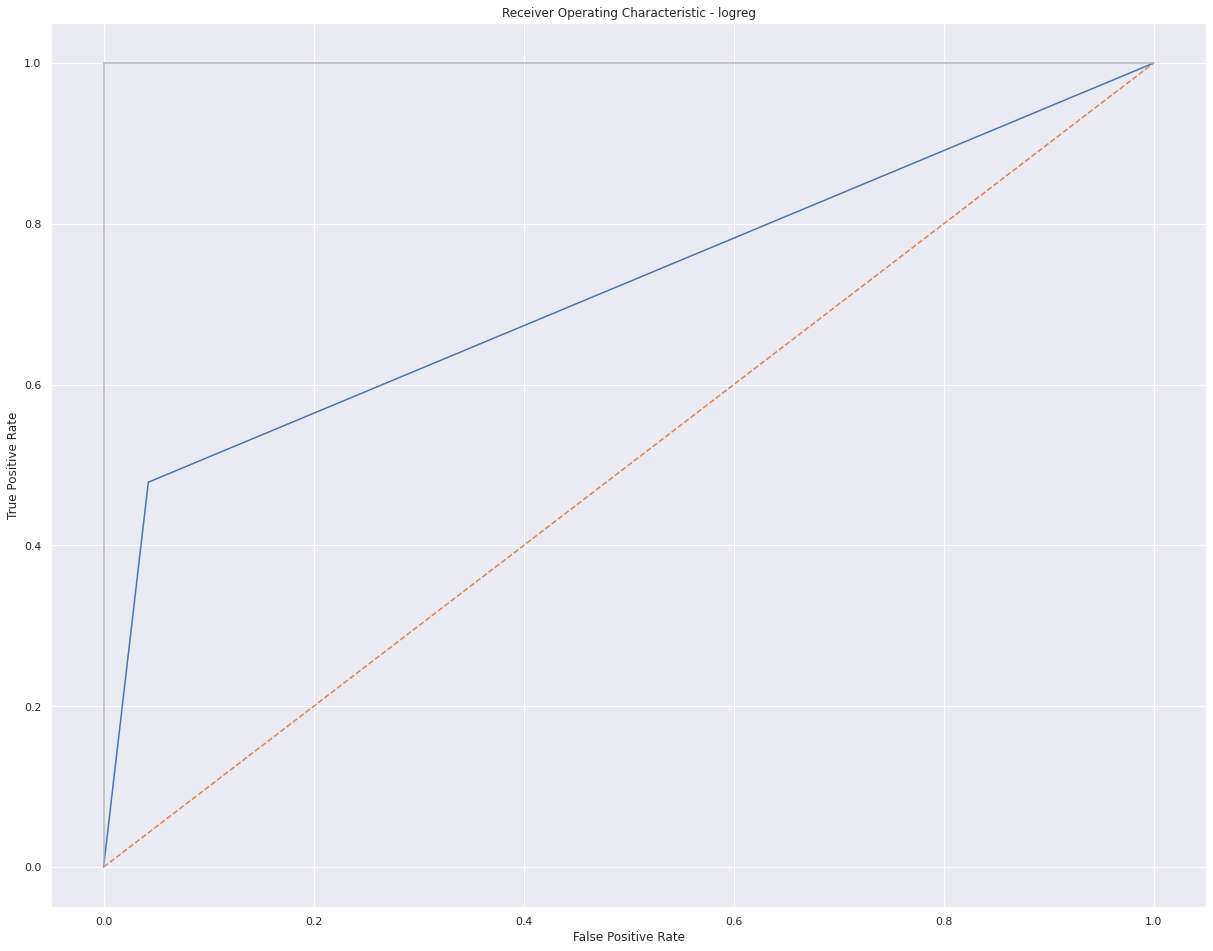

In [ ]:
#AUC :
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_quart_test, model.predict(x_test), pos_label = 1)
print(false_positive_rate, true_positive_rate)

#le score AUC
roc_auc_score_KNNquart = roc_auc_score(y_quart_test, model.predict(x_test))
print(roc_auc_score_KNNquart)

#la courbe ROC
plt.title('Receiver Operating Characteristic - logreg')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Résultat :
#Le score est tout juste acceptable.
#confirmation de la matrice de confusion : 
#le classement des vrais positifs est moins bon que le classement des vrais négatifs.

In [ ]:
# MAE :
MAE_KNNquart = mae(y_quart_test, y_pred_test_KNNquart)
print("Mean Absolute Error' ou 'MAE' : " + str(MAE_KNNquart))

#la MAE est faible, ce qui corrobore la bonne performance du modèle.

Mean Absolute Error' ou 'MAE' : 0.1480461353072818


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=434a662e-7efb-4fa9-b333-d41ab9a88069' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>